# Social Network Analysis - Amber Heard Case - Facebook
MAHMOUD NAGY - FEB 2022

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Facebook - Social Network Analysis on Amber Heard's Case Example.<br>
Threat Analysis on commments, reviews of her Facebook Page.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import pickle
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")
%matplotlib inline

import plotly.io as pio
pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550


import helpers

# To Apply helpers updates without resarting the kernel
import importlib
importlib.reload(helpers)

# # To keep track of any module updates
# %load_ext autoreload
# %autoreload2

%config InlineBackend.figure_format = 'retina'

In [2]:
cd ../data

/Users/mnagy99/jupyter/AH/Facebook/SNA-AH-Case-Facebook/data


<br>

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

> <ul>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#hate_speech">Hate-Speech Comments</a></li>
 <li><a href="#primarly">Primarly Text Investigations</a></li>
 </ul>

# Comments

In [3]:
df_comments = pd.read_csv("./cleaned_data/facebook_cleaned.csv")
print(df_comments.shape)
df_comments.head(1)

(5263, 11)


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
0,Raychel RayRay,skank,post0_comment,NaN,NaN,NaN,NaN,True,skank,English,skank


<br>

In [4]:
df_comments.type.value_counts()

post0_comment    2380
post4_comment     640
Not Recommend     612
post1_comment     451
post2_comment     440
post3_comment     380
post5_comment     360
Name: type, dtype: int64

# Languages Used in Comments 

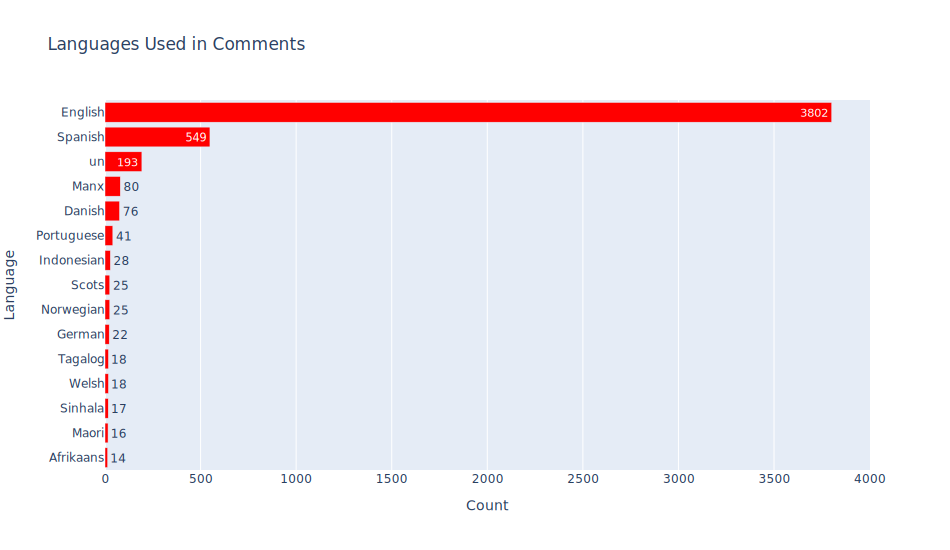

In [5]:
helpers.barh(df_comments.language.value_counts().to_frame().reset_index().rename(columns={'index': 'Language', 
                                                                                          'language': 'Count'}).head(15),
             'Languages Used in Comments', threshold=0, c=0)

# Threats

In [6]:
all_threat = {'burn', 'crime', 'criminal', 'dead', 'death', 'deserve', 'die', 'hell', 'inferno', 'infierno', 'jail',
              'karma', 'kill', 'kys', 'matar', 'morir', 'morire', 'muere', 'muerete', 'muerta', 'muerte', 'murder',
              'pagar', 'pay', 'prigione', 'prisión', 'prison', 'punish', 'ад', '死ね'}

In [7]:
df_threat1 = df_comments[df_comments.comment.str.contains('|'.join(all_threat))]
df_threat2 = df_comments[df_comments.translated.str.contains('|'.join(all_threat))]
df_threat = df_threat1.append(df_threat2)
df_threat.drop_duplicates(inplace=True)

In [8]:
print(f'{df_threat.shape[0]} contributions, made by {df_threat.username.nunique()} Users, In {df_threat.language.nunique()} Languages')
df_threat.head(2)


625 contributions, made by 582 Users, In 23 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
10,Michealie McDowell,my son's father beat me so badly while i was p...,post0_comment,NaN,NaN,NaN,NaN,True,my son's father beat me so badly while i was p...,English,my son's father beat me so badly while i was p...
15,Jacky Ortiz,i hope nothing but the worst for you johnny de...,post0_comment,NaN,NaN,NaN,NaN,True,i hope nothing but the worst for you johnny de...,English,i hope nothing but the worst for you johnny de...


In [9]:
df_threat.type.value_counts()

post0_comment    313
Not Recommend     97
post4_comment     57
post1_comment     51
post2_comment     42
post3_comment     37
post5_comment     28
Name: type, dtype: int64

# Threat Keywords

| Keyword | Language | Transelation |
| :--|:--|:--|
|muerte| Spanish | Death |
|死ね| Japanese | Die |
|muerete| Spanish | Die |
|morire| Italian | Die |
|morir| Spanish | To die |
|muere| Spanish | go dead |
|matar| Portuguese | to kill |
|prigione| Italian | prison |
|prisión| Spanish | Prison |
|inferno| Italian | Hell |
|infierno| Spanish | Hell |
|Ад| Russian | Hell |
|pagar| Spanish | to pay |

In [10]:
len(all_threat)

30

In [11]:
threat_dict = helpers.count_keywords(all_threat|{'jail','prison','deserve','burn'}, df_comments)
threat_counts = pd.DataFrame(threat_dict, index=['count'])
threat_counts = threat_counts.T.reset_index().rename(columns={'index':'keyword'})
threat_counts.sort_values('count', ascending=False, inplace=True)

In [12]:
# threat_counts.head(60).reset_index(drop=True)

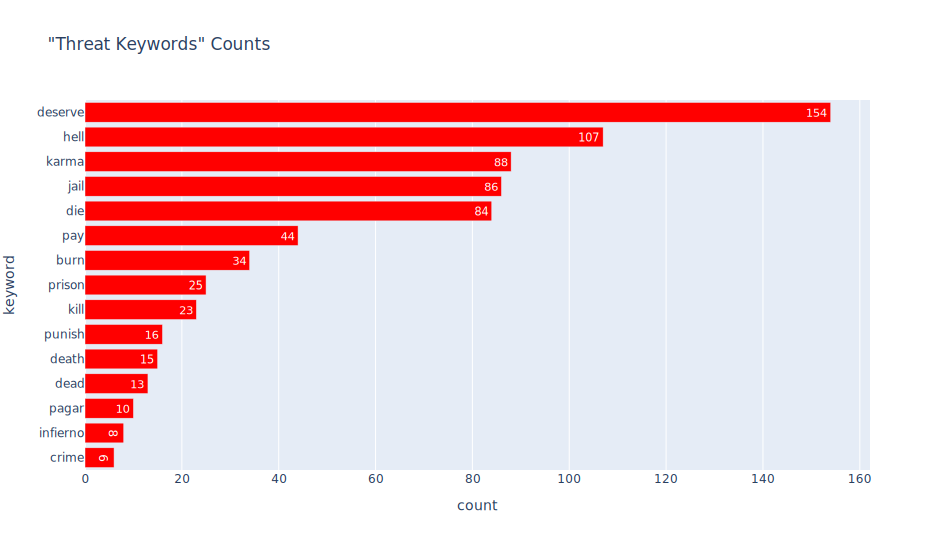

In [13]:
helpers.barh(threat_counts.head(15), '"Threat Keywords" Counts', threshold=0, c=0)

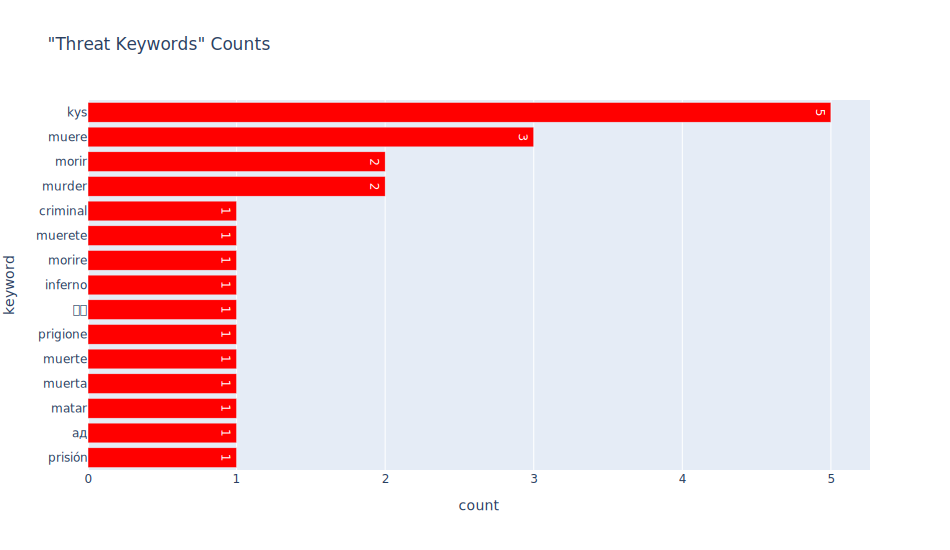

In [14]:
helpers.barh(threat_counts[15:].head(15), '"Threat Keywords" Counts', threshold=0, c=0)

In [15]:
for col in ['username', 'comment']:
    print('The value counts of ' + col)
    print(df_comments[col].value_counts().head(10))
    print('\n')

The value counts of username
Eunice Scamander Riddle      19
Ines Seni                    19
TiaAnna Ann                  15
Kyrianne Kathleen Blocher    10
Princess Cobain Hendrix       9
Akar Slemany                  9
Vittoria Tagliaferri          8
Amy Rossetti                  8
Bettina Knudsen               8
Martim Vasconcelos            8
Name: username, dtype: int64


The value counts of comment
#justiceforjohnnydepp    20
#justiceforjohnny        18
fuck you                 14
abuser                   12
#justiceforjohnnydeep    10
#justiceforjhonnydepp     9
bitch                     8
#fuckamberheard           8
fuck you amber            8
#cancelamberheard         6
Name: comment, dtype: int64




# UnKnown Language Detection

un --> unknown language

In [16]:
df_unknown = df_comments[df_comments.language == 'un']
print(df_unknown.shape)
df_unknown.head(60)

(193, 11)


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
763,တစ်ခွန်းမှပြန်ပြောမယ်မကြံနဲ့ ပါးကြီးပဲပိတ်ရိုက...,elon musk's babe! 😇😇😇🕹️📽️,post0_comment,NaN,NaN,NaN,NaN,True,elon musk's babe!,un,elon musk's babe!
780,Juliana Murayari Shavier,🐍🐍🐍🐍🐍🐍🐍🐍🐍🐍🐍🐍🐍🐍🐍🐍🐍🐍,post0_comment,NaN,NaN,NaN,NaN,False,isnan,un,isnan
889,Jaroslav Vobornik,fuck amber,post0_comment,False,False,True,False,True,fuck amber,un,fuck amber
935,J Harry Muñoz,😡🤬😡🤬😡🤬,post0_comment,NaN,NaN,NaN,NaN,False,isnan,un,isnan
943,Jeff Bolt,#fuckamberheard,post0_comment,NaN,NaN,NaN,NaN,True,#fuckamberheard,un,#fuckamberheard
946,Nhaniiz Mendez,😡😡😡😡😡😡😡😡😡😡,post0_comment,NaN,NaN,NaN,NaN,False,isnan,un,isnan
960,Amanda Powell Fleming,#istandwithjohnnydepp\r\n#fuckamberheard,post0_comment,NaN,NaN,NaN,NaN,True,#istandwithjohnnydepp #fuckamberheard,un,#istandwithjohnnydepp #fuckamberheard
967,Nhaniiz Mendez,😡😡😡😡😡😡😡😡😡😡😡😡,post0_comment,NaN,NaN,NaN,NaN,False,isnan,un,isnan
969,Ana Sthephania Correa,🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮,post0_comment,NaN,NaN,NaN,NaN,False,isnan,un,isnan
970,Jay Afanador,fuck off.,post0_comment,NaN,NaN,NaN,NaN,True,fuck off,un,fuck off


<br>

<br>

In [17]:
# Create an empty set of threat commenting users
threat_users = set()

<br>

<br>

<a id='threat_comments'></a>
> ## Exploring Threat Comments
> <ul>
    <li><a href="#threat_comments"><b>Threat Comments</b></a></li>
 <li><a href="#hate_speech">Hate-Speech Comments</a></li>
 <li><a href="#primarly">Primarly Text Investigations</a></li>
 </ul>

<a id='all_threat'></a>
>>## All Threat 
> <ul>
 <li><a href="#all_threat"><b>All Threat</b></a></li>
 <li><a href="#kill_death">Kill & Death</a></li>
 <li><a href="#hell_burn">Hell & Burn</a></li>
 <li><a href="#crime_jail">Crime & Jail</a></li>
 <li><a href="#threat_users">Threat Users Contributions</a></li>
 </ul>

In [18]:
print(f'{df_threat.shape[0]} contributions, made by {df_threat.username.nunique()} UsersIn {df_threat.language.nunique()} Languages')
df_threat.head(2)


625 contributions, made by 582 UsersIn 23 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
10,Michealie McDowell,my son's father beat me so badly while i was p...,post0_comment,NaN,NaN,NaN,NaN,True,my son's father beat me so badly while i was p...,English,my son's father beat me so badly while i was p...
15,Jacky Ortiz,i hope nothing but the worst for you johnny de...,post0_comment,NaN,NaN,NaN,NaN,True,i hope nothing but the worst for you johnny de...,English,i hope nothing but the worst for you johnny de...


In [19]:
df_threat.type.value_counts()

post0_comment    313
Not Recommend     97
post4_comment     57
post1_comment     51
post2_comment     42
post3_comment     37
post5_comment     28
Name: type, dtype: int64

<br>

# Languages Used in Threat Comments 

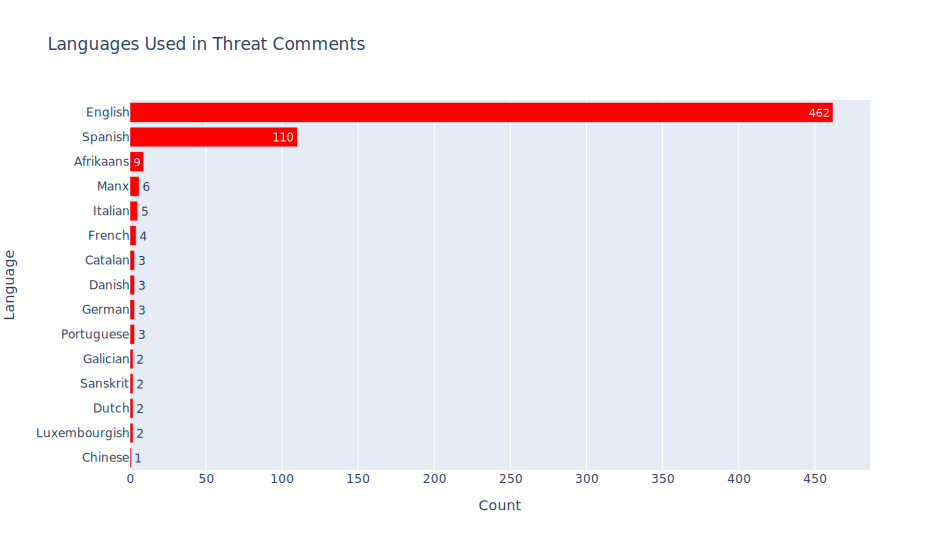

In [20]:
helpers.barh(df_threat.language.value_counts().to_frame().reset_index().rename(columns={'index': 'Language', 
                                                                                        'language': 'Count'}).head(15),
             'Languages Used in Threat Comments', threshold=0, c=0)

# Threat Comments In Languages Other Than English

In [21]:
df_threat_others = df_threat[df_threat.language != 'English']
print(f'{df_threat_others.shape[0]} contributions, made by {df_threat_others.username.nunique()} Users, In {df_threat_others.language.nunique()} Languages')
df_threat_others.head(2)

163 contributions, made by 155 Users, In 22 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
120,Mishel Judit Quisocala Condori,"aquí desde perú nadie te quiere volver a ver, ...",post0_comment,NaN,NaN,NaN,NaN,True,"aquí desde perú nadie te quiere volver a ver, ...",Spanish,"here from peru no one wants to see you again, ..."
156,Nayd Tania Blanco Quispe,tarde o temprano llegará la hora de pagar todo...,post0_comment,NaN,NaN,NaN,NaN,True,tarde o temprano llegará la hora de pagar todo...,Spanish,Sooner or later the time will come to pay for ...


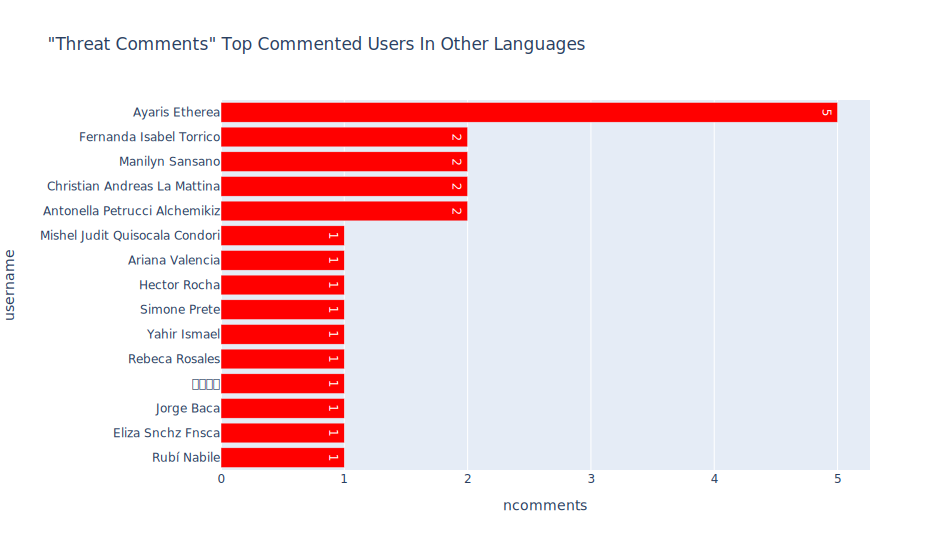

In [22]:
threat_others_users = df_threat_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(threat_others_users.head(15), '"Threat Comments" Top Commented Users In Other Languages', threshold=0, c=0)

In [23]:
df = df_threat_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,"aquí desde perú nadie te quiere volver a ver, te queremos ver destruida así como destruirse a nuestro gran capitán",Spanish,"here from peru no one wants to see you again, we want to see you destroyed as well as destroy our great captain",Mishel Judit Quisocala Condori
1,tarde o temprano llegará la hora de pagar todo el mal que uno hace..!!,Spanish,Sooner or later the time will come to pay for all the evil that one does!,Nayd Tania Blanco Quispe
2,"das angebliche beweisfoto ist einfach lächerlich !!!\r\njeder der einen harten tag hinter sich hat, könnte quasi so fotografiert werden,ich würde mich mit wahrhafter größe mit jonny d. einigen und zeigen das ich karakter im leib hab und nicht wie eine beleidigte im zickenstall aufführen,wie im kindergarten,oh sorry die haben mehr kribs",German,"the alleged proof photo is just ridiculous! anyone who has had a hard day could be photographed like that, i would agree with jonny d on true greatness and show that i have character in my body and not act like an offended girl in a bitch shed, like in kindergarten, oh sorry they have more crabs",Katharina Schäfer
3,"a mí nadie me ha pagado para firmar por su despido, yo lo hago gratis.",Spanish,"nobody has paid me to sign for their dismissal, I do it for free",Martinez Nana
4,tu y la panini deben de irse agarraditas dela mano al infierno son tal para cual hjsdp,Spanish,you and the panini must go hand in hand to hell they are such for which hjsdp,Abby's Burgers
5,"nadie mire sus películas, nadie mire aquaman",Spanish,"nobody watch his movies, nobody watch aquaman",Ar An Melgar
6,tú eres la razón por la cual un hombre puede ayudar a matar una mujer sin nunca haber matado a ninguna persona,Spanish,you are the reason a man can help kill a woman without ever having killed anyone,K̶e̶v̶i̶n̶ Tomas Martinez Barra
7,vas a pagar tarde o temprano el daño que estás causando. ni siquiera nunca te he conocido cómo actriz se de vos por el daño que estás causando al gran actor depp. bruja,Spanish,sooner or later you are going to pay for the damage you are causing i have never even met you as an actress i know of you for the damage you are causing to the great actor depp witch,Lupita Solis
8,"nadie te apoya, todos estamos a tu contra y apoyando a jonnhy quien nunca haría esas estupideces tuyas :)",Spanish,"nobody supports you, we are all against you and supporting jonnhy who would never do those stupid things of yours:",Danétt Morales
9,"tu crees que existirías si johnny no te hubiese echo su esposa ?...no seas tan tonta , sin el no eres nadie .no tienes vergüenza, el dinero se acaba. y no creas que tendrás una buena vida , sacando dinero a lo fácil. #justiceforjohnnydeep",Spanish,"do you think you would exist if johnny had not made you his wife? don't be so stupid, without him you are nobody you have no shame, the money runs out and don't think you will have a good life, getting money the easy way #justiceforjohnnydeep",Karinita Davila


In [24]:
df = df_threat_others[['comment', 'language','translated', 'username']][60:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,nadie quiere ver a una perra sacándose fotos cuando envejescas tus tetas estarán por piso y tú culo se estará pudriendo de la mierda de mentiras que salen de tu boca 💩💩perraaaaaaa2💩,Spanish,nobody wants to see a bitch taking pictures of herself when you get old your boobs will be on the floor and your ass will be rotting from the shit of lies that come out of your mouth bitch2,Yosoy L Quien Mas
1,"ahora viene aquí a decir que nos pagaron hacemos esto por qué es lo justo, no por que nos pagaron no siempre habrá dinero entre medio para hacer justicia!!!? ojala vivas lo que jhonny esta viviendo injustamente",Spanish,"now he comes here to say that they paid us we do this because it is fair, not because they paid us there will not always be money in between to do justice!!!? I hope you live what Johnny is living unfairly",Fabiola Ramírez
2,"en serio. me desepcione bastante de esta...\r\n\r\nponbre de depp. estar a la par de esta falsa... que indignación a de sentir... él siendo un gran actor, perdiendo tiempo con esa sarrapastroza. …see more",Spanish,"Seriously, I was quite disappointed in this poor depp being on par with this fake, how indignant he felt being a great actor, wasting time with that slob see more",Renata Vasquez
3,die,Afrikaans,the,Jose Sniper Galvez
4,kys,Manx,kiss,Alec Rinn
5,scamber turd lei non sa chi è jonny .. nessuno lo sà perché non è mai stato rivelato. ma la signora ha fatto il più grave errore della sua vita! prima andrà in prigione e poi all’inferno.\r\njonny e sacro!! cari signori!! questa è la rivelazione!! voleva…see more,Italian,scamber turd she doesn't know who jonny is nobody knows because it was never revealed but the lady made the biggest mistake of her life! first she will go to prison and then to hell jonny and sacred !! dear Sirs!! this is the revelation !! wanted more,Antonella Petrucci Alchemikiz
6,#amberheardshouldbeinprison!!,Luxembourgish,#amberheardshouldbeinprison!!,Manilyn Sansano
7,die,Afrikaans,the,Sid Faundez
8,die.,Afrikaans,the,Carlos St
9,karma llegará 😊,Catalan,karma will come,Zayuri Justiniano Flores


In [25]:
df = df_threat_others[['comment', 'language','translated', 'username']][120:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,perra asquerosa no mereces la fama que tienes ! desde colombia odiamos tu falsa imagen y amamos a jhonny das asco,Spanish,filthy bitch you don't deserve the fame you have! from colombia we hate your false image and we love jhonny das disgust,Valentina Lucy
1,vete a la verga,Albanian,go to hell,Santiago NC
2,cárcel para tiiiii,Indonesian,jail for you,Luna Mars
3,mucha 🐶 hpta\r\nmuera c,Spanish,a lot of hpta die c,Natalia Burbano Trujillo
4,vete ala mierda,Spanish,go to hell,Morales Santillan Rosa Ysela
5,andate a la mierda,Spanish,go to hell,Andi Serrano
6,"jamais je likerai pour vous, 😠😡je préférai mourir que de trahir mon johnny depp d’amour ❤️❤️❤️\r\nje l’adore je l’aime de tout mon cœur\r\n#justiceforjohnnydeep ❤️❤️❤️❤️❤️❤️❤️❤️❤️",French,"I will never like for you, I would rather die than betray my love johnny depp I adore him I love him with all my heart #justiceforjohnnydeep",Coco Depp
7,plutot creuver pauvre fille 🤮🤮🤮🤮,French,rather die poor girl,Florence Martin-duloz
8,"pucha ... que mal que existan mujeres que si han sufrido de maltratos .. en mi país ""chile "" han muerto miles y miles has sufrido. cortes .puñaladas. a una le sacaron los ojos y sigue viva .\r\ny a ti espécimen desagradable hipócrita mentirosa .que te aut…see more",Spanish,"Damn it's too bad that there are women who have suffered mistreatment in my country, Chile, thousands and thousands have died, you've suffered cuts, stabs, one of them had her eyes gouged out and she's still alive, and you, a nasty specimen, a hypocrite, a liar, I'll help you see more",Maria Fuentes
9,只想说 你妈死了，你纯粹是个妓女。,Chinese,Just want to say your mom is dead and you're a pure prostitute.,Parker Thomas


# Most Repeated Threat Comments

In [26]:
df_threat.comment.value_counts().head(20)

go to hell                                                                                                                                                                                                                                                                  5
la violenta era ella\r\n#bizarro le corto el dedo, le quemó la cara con un cigarrillo, echo a la basura sus medicamentos, le pegó con la puerta, le tiró de todo cuanto pudo a la cabeza, lo golpeó, lo pateó, le escupió, se burló e insultó hasta el cansanci…see more    5
die                                                                                                                                                                                                                                                                         4
#justiceforjohnnydepp #deathamberheard                                                                                                                                                        

In [27]:
df = df_threat[['comment', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,my son's father beat me so badly while i was pregnant he almost killed my child and myself. i'm listening to you berate him and tell at him and cuss at him on these tapes. he can't even get a word in. you should have been thankful he always walked away…see more,Michealie McDowell
1,i hope nothing but the worst for you johnny depp is my idol since my childhood he deserves nothing but they best he’s the most beautiful and handsome actor on earth to me💕💕 love you johnny,Jacky Ortiz
2,oh amber heard...u just wanted attention. you lied about johnny. so happy that you are out of his life. you didn't deserve him. augh!,Sareena Sky
3,who would want to follow an evil person who abused johnny depp and plays the sympathy card. you should be held accountable for your crimes you sad person,Michelle Fieldhouse
4,"as a domestic violent victim, can see through the bull shit. karma is about to bite. i wish nothing but pain and misery.",Laura Samantha
5,"the only reason i know who you are, is because of this shit you did with depp.\r\n\r\notherwise who the hell are you? what have you done other than abuse men? not worth my time, sadly i wish i would be able to forget who you are, but because of what you did to one of my favorite actors, who i might add is incredible human being. …see more",Tyler Schrodt
6,"you are miserable. no one have to pay me to boycott you and stand for a real actor and victim as johnny! you are not even an actress, you are just a pretty face.\r\nenjoy your career funeral\r\n#justiceforjohnnydepp",Flavia Atena Cristini
7,i hope you'll get what you deserve for your shameful acts and it wouldn't be bad if you visit a psychiatrist sometimes..,Radu M. Christian
8,you need to be imprisoned for what you've done. you used a movement that we started to bring awareness to abuse against women as a tool for your sick agenda. you have done more damage than you will likely ever accept responsibility for.,Amy Neice
9,tell me why are you not in jail ?,Harry Synytskyi


In [28]:
df = df_threat[['comment', 'username']][60:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,your the worst actress that i have saw in a movie. f u you don't deserve the handsome man johnny depp,Aaliyah Kaith O Calizo
1,karma is your worst enemy!! remember what goes around comes around. and the best one yet. the truth will always come out. 👌,Daniel William Davies
2,"a mí nadie me ha pagado para firmar por su despido, yo lo hago gratis.",Martinez Nana
3,"i cannot stand you as a person and you may have fooled the judges, but you won't fool karma, baby. you are the worst kind of human. full stop",Kristen Globensky
4,i thank you. you should be in jail. i hope your life is full of bad karma,Angie Kaiser
5,amber your going to jail for the horrible person u are. stop lying,Maritza Lissette
6,i hope you get what you deserve... your brains on the fucking ground😁,Sean Garcia
7,i really hope you spend some time in jail for domestic violence and lying about it.. your a sick woman who needs severe psychiatric medical treatment.,Laurie McHowell Plantamuro
8,"i got kicked off twitter because you kept getting offended by my posts. guess who's making another and another 😜 funny you feel ""bullied"". just do everyone a favor and drop dead.",Peyton Legitt
9,"you are one of the worst people that was ever born on this planet, your place is in a prison",Vincent Herrera


In [29]:
df = df_threat[['comment', 'username']][120:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,i hope someday the karma will take good care of this gold digger,Pat Sixx
1,i would literally shit in my hands and clap before i'd put another dollar in your grimmy little pocket. #justiceforjohnny i hope you rot in prison.,Sierra Paige Gerard
2,well well looks like amber and her free loading mates were planning a murder\r\n\r\nhttps://youtu.be/ajn1pj48wka,Clint Stevenson
3,amber should be ashamed of yourself you have no idea what domestic violence is and the crap it comes with. i hope johnny depp wins i hope karma bites ur ass. #justiceforjohnny,Morgan Andreas
4,you need to go to jail your disgusting waste of a human life to think you can get away with the obvious lies you tell i cant even believe you have a following still,Elsa Ansel
5,"nowone loves you, you are a totaly slut and i hope that you pay for everything you thit to jhonny deep.",María Ortega
6,justice for johnny !!!! you are a liar and a mean person ... i hope karma hits you hard !!!,Yvonne Ludorff
7,@amberheard\r\nyou are trash. 🗑 if you did in fact do all theae awful things you deserve to reap what you soe.,Jazy Blackbear Gray
8,you don't deserve the love you received. drop d**d.,Diana Custura-Craciun
9,perra sin corazón!!!! sólo agarraste a jd cómo plataforma para obtener fama y ahora tú solita te estás hundiendo por tus falacias hacía él!!!! #justiciaparajhonnydepp,Nicte Farkas


<br>

### All text containing "go to hell"

In [30]:
df_all_hell1 = df_comments[df_comments.comment.str.contains('go to hell')]
df_all_hell2 = df_comments[df_comments.translated.str.contains('go to hell')]
df_all_hell = df_all_hell1.append(df_all_hell2)
df_all_hell.drop_duplicates(inplace=True)

In [31]:
print(f'{df_all_hell.shape[0]} contributions, made by {df_all_hell.username.nunique()} Users, In {df_all_hell.language.nunique()} Languages')
df_all_hell[['comment', 'language','translated', 'username']]


33 contributions, made by 33 Users, In 4 Languages


,comment,language,translated,username
145,you will have to pay for the damage done to jo...,English,you will have to pay for the damage done to jo...,Mariana Beatle
440,i just came here to say that i hate you amber....,English,i just came here to say that i hate you amber ...,Ariane Samantha Abrera
1017,go to hell. you ruined a good mans life you ma...,English,go to hell you ruined a good mans life you man...,Kristen Sholarr
1085,go to hell,English,go to hell,Pauline Soriano
1151,fuck you go to hell you treated johnny like sh...,English,fuck you go to hell you treated johnny like sh...,Shelley Bush
1245,go to hell🤬,English,go to hell,Janne Särkiniemi
1346,go to hell 🙂,English,go to hell,Soula Mohamed
1492,"go to hell, scamber!!! you’ll never work again.",English,"go to hell, scamber!!! you’ll never work again",Ell Zlatareva
1576,go to hell :),English,go to hell :,Mohamed Abd Elmeged
1717,go to hell.,English,go to hell,Emma Collins


In [32]:
df_all_hell.language.value_counts()

English     28
Spanish      3
Albanian     1
Dutch        1
Name: language, dtype: int64

### Text == "go to hell" --> 5

In [33]:
df_all_hell.comment.value_counts().head()

go to hell                                                                         5
you will have to pay for the damage done to johnny deep, bad woman, go to hell.    1
hey bitch go to hell                                                               1
tu, warner y disney váyanse a la mierda!                                           1
andate a la mierda                                                                 1
Name: comment, dtype: int64


Note: The same comment repeated 5 times by different users



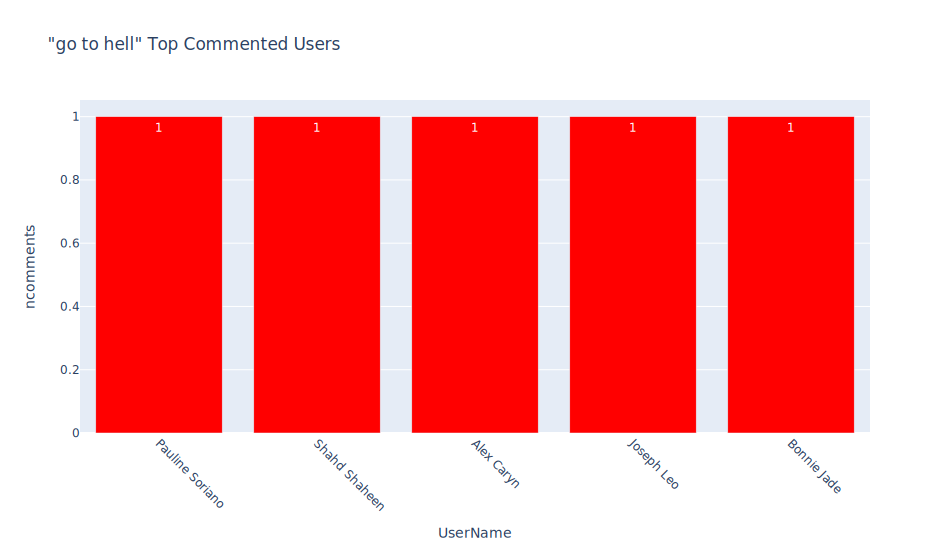

In [34]:
importlib.reload(helpers)
print('\nNote: The same comment repeated 5 times by different users\n')
helpers.users_peaks(df_threat, 'go to hell', n=10, threshold=0)

In [35]:
df_all_hell.type.value_counts()

post0_comment    20
post1_comment     3
post2_comment     3
post3_comment     2
post4_comment     2
Not Recommend     2
post5_comment     1
Name: type, dtype: int64

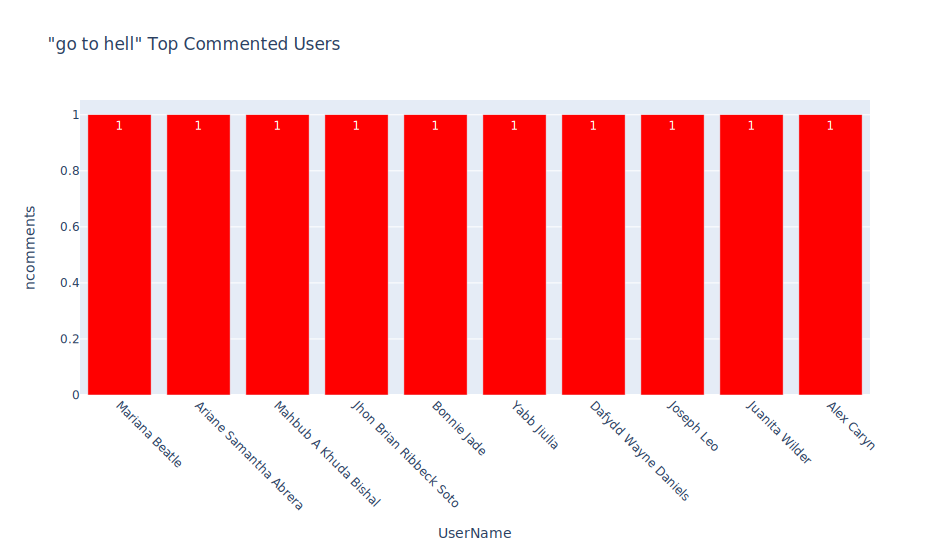

In [36]:
helpers.users_peaks(df_comments, 'go to hell', n=10, threshold=0, mode='contain')

### Text == "la violenta era ella\r\n#bizarro le corto el dedo, le quemó la cara con un cigarrillo, echo a la basura sus medicamentos, le pegó con la puerta, le tiró de todo cuanto pudo a la cabeza, lo golpeó, lo pateó, le escupió, se burló e insultó hasta el cansanci…see more" --> 5 <br> 

(Spanish) she was violent\r\n#bizarre she cut off his finger, burned his face with a cigarette, threw away his medications, hit him with the door, threw everything he could at his head, hit him, kicked, spat on, mocked and insulted ad nauseam

In [37]:
mytext = "la violenta era ella\r\n#bizarro le corto el dedo, le quemó la cara con un cigarrillo, echo a la basura sus medicamentos, le pegó con la puerta, le tiró de todo cuanto pudo a la cabeza, lo golpeó, lo pateó, le escupió, se burló e insultó hasta el cansanci…see more"

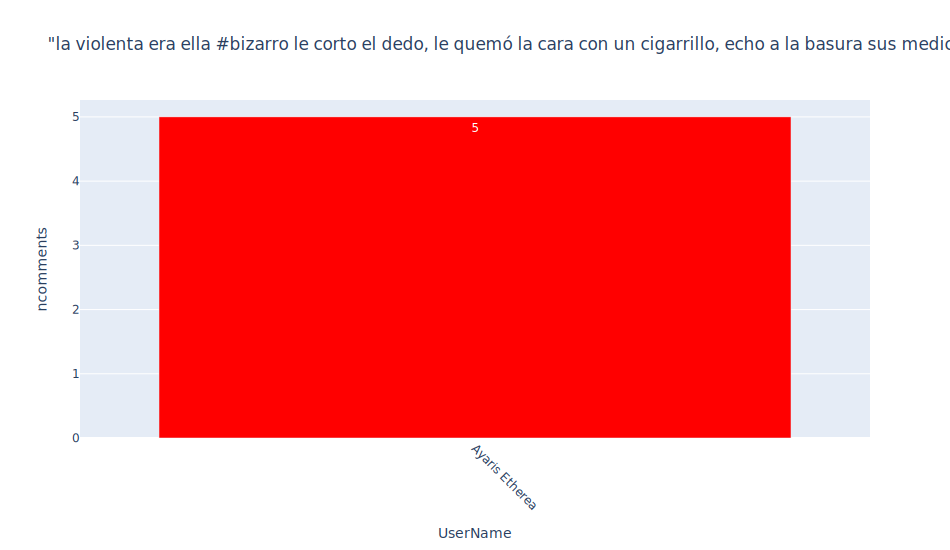

In [38]:
# importlib.reload(helpers)
helpers.users_peaks(df_threat, mytext, n=10, threshold=0)

### Text == "die" --> 4


Note: The same comment repeated 4 times by different users



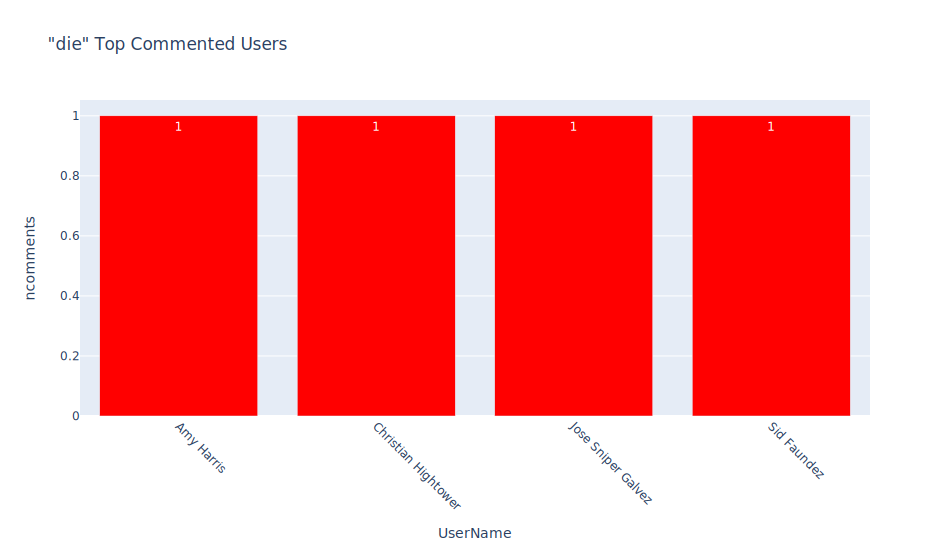

In [39]:
importlib.reload(helpers)
print('\nNote: The same comment repeated 4 times by different users\n')
helpers.users_peaks(df_threat, 'die', n=10, threshold=0)

<b>

# Top Users Commented with Threat keywords

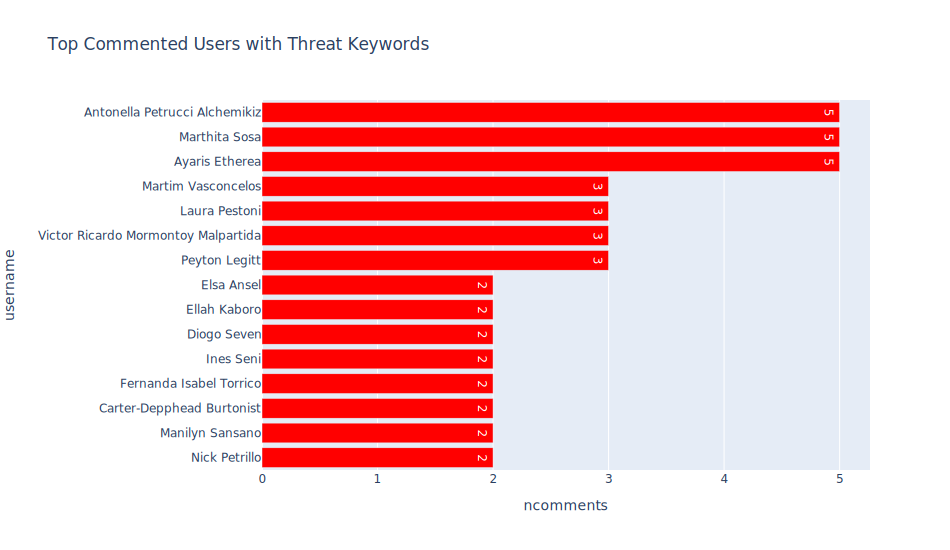

In [40]:
df_threat_users = df_threat.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(df_threat_users.head(15), 'Top Commented Users with Threat Keywords', threshold=0, c=0)

In [41]:
df_threat.username.value_counts().head(15)

Antonella Petrucci Alchemikiz          5
Marthita Sosa                          5
Ayaris Etherea                         5
Martim Vasconcelos                     3
Laura Pestoni                          3
Victor Ricardo Mormontoy Malpartida    3
Peyton Legitt                          3
Elsa Ansel                             2
Ellah Kaboro                           2
Diogo Seven                            2
Ines Seni                              2
Fernanda Isabel Torrico                2
Carter-Depphead Burtonist              2
Manilyn Sansano                        2
Nick Petrillo                          2
Name: username, dtype: int64

In [42]:
df_comments.query(" username == 'Ayaris Etherea' ").comment.value_counts().head(60)

la violenta era ella\r\n#bizarro le corto el dedo, le quemó la cara con un cigarrillo, echo a la basura sus medicamentos, le pegó con la puerta, le tiró de todo cuanto pudo a la cabeza, lo golpeó, lo pateó, le escupió, se burló e insultó hasta el cansanci…see more    5
Name: comment, dtype: int64

### Translation

In [43]:
df_comments.query(" username == 'Ayaris Etherea' ").translated.value_counts().head(60)

she was violent #bizarro cut off his finger, burned his face with a cigarette, threw away his medications, hit him with the door, threw everything he could at his head, hit him, kicked him, spit on him , mocked and insulted until tiredsee more    5
Name: translated, dtype: int64

In [44]:
df_comments.query(" username == 'Antonella Petrucci Alchemikiz' ").comment.value_counts().head(60)

don't use children too because god will punish you very hard this time! after what you did to jonny! you don't know who jonny is! jonny is blessed by god from birth and you are a devil!                                                                                  3
dio ti punirà per quello che hai fatto! è molto pesantemente! molto! diavolo!                                                                                                                                                                                              1
tutti i demoni li vomiterò dalla mia bocca! parola di dio!                                                                                                                                                                                                                 1
scamber turd lei non sa chi è jonny .. nessuno lo sà perché non è mai stato rivelato. ma la signora ha fatto il più grave errore della sua vita! prima andrà in prigione e poi all’inferno.\r\njo

In [45]:
df_comments.query(" username == 'Marthita Sosa' ").comment.value_counts().head(60)

#deathtoamberheard                                                                                                                                                              3
destroyed part of the life of a great actor lied and others is a reverent shame as recommend to such people .. shame and a bit of disgust that god have mercy on his soul ..    2
fuck you #deadamberheard                                                                                                                                                        1
#justiceforjohnnydepp #deathamberheard                                                                                                                                          1
Name: comment, dtype: int64

In [46]:
df_comments.query(" username == 'Martim Vasconcelos' ").comment.value_counts().head(10)

good. tear her down. bring her back to the lowest level.                                                                                                                                                                                                                 2
i am not satisfied that johnny suffered due to that cow's lies.\r\n\r\nhe's so adorable, he didn't deserve it. i'm pissed.                                                                                                                                               2
amber heard.....not so pretty on the inside. oh, johnny! i wish you'd stayed away from her.                                                                                                                                                                              1
i don't think anyone is perfect ever, but this man i swear to god, is as close to perfection as there can be ( both on the inside and out )\r\ni just adore him!!!                                     

In [47]:
df_comments.query(" username == 'Laura Pestoni' ").comment.value_counts().head(60)

she'll be in hell, where she belongs                                    1
gold digging evil ugly person                                           1
you evil, ugly witch. i hope you rot in hell                            1
skank                                                                   1
evil bitch...karma...just remember. karma is a bitch, and so are you    1
Name: comment, dtype: int64

In [48]:
df_comments.query(" username == 'Victor Ricardo Mormontoy Malpartida' ").comment.value_counts().head(60)

you'll go to fooking jail stoopid modar faker biatch    1
you'll go to jail stoopid biatch! 🙊                     1
you'll fooking go to jail stoopid biatch 🤭🙊😂👊🏼          1
Name: comment, dtype: int64

In [49]:
df_comments.query(" username == 'Diogo Seven' ").comment.value_counts().head(60)

amber the slut ahaha karma is a bitch bitch       1
amber you are such a slut deep should kill you    1
Name: comment, dtype: int64

In [50]:
df_comments.query(" username == 'Dillan Macasiano' ").comment.value_counts().head()

this fucking gold digger i hope your career goes down back to hell #justiceforjohnnydepp                                                              1
fucking rat i hope you dont show up on aquaman 2 and i hope your fucking career goes down back to hell. what a fucking clown #justiceforjohnnydepp    1
Name: comment, dtype: int64

In [51]:
df_comments.query(" username == 'Jhon Brian Ribbeck Soto' ").comment.value_counts().head(60)

seeeeee u in hell                                                               1
hope some u fall into hate and go to hell !!! people like u must disappear !    1
Name: comment, dtype: int64

In [52]:
df_comments.query(" username == 'Nadye Momsen' ").comment.value_counts().head()

you deserve to lose your jobs, so how you ruined jonny's life, we are going to make you pay and we will do justice.    1
you deserve to pay for the damage that you've done                                                                     1
Name: comment, dtype: int64

In [53]:
df_comments.query(" username == 'Fernanda Isabel Torrico' ").comment.value_counts().head(60)

#justiceforjohnnydeep\r\n#deathamberheard    2
Name: comment, dtype: int64

In [54]:
df_comments.query(" username == 'Nait Sirhc' ").comment.value_counts().head(60)

and you can follow your jail road    1
it's the jail for me...              1
Name: comment, dtype: int64

In [55]:
df_comments.query(" username == 'Elsa Ansel' ").comment.value_counts().head(60)

you need to go to jail your disgusting waste of a human life to think you can get away with the obvious lies you tell i cant even believe you have a following still    1
better close it down you won't need it in jail                                                                                                                          1
Name: comment, dtype: int64

In [56]:
df_comments.query(" username == 'Nick Petrillo' ").comment.value_counts().head()

this cunt needs to go away... fuck her life for ever existing.\r\n\r\njohnny depp didn't deserve what that piece of shit woman did    2
Name: comment, dtype: int64

In [57]:
df_comments.query(" username == 'Suzanne Ovenden' ").comment.value_counts().head(60)

all you did by your jealousy and lies to only gain money, was lose to face even more. you very silly woman.                                                                                                                                                                                                                          1
no thank you i don't follow jealous liars and psychopaths. ❤️ johny depp and always will. your lies don't deter us. 🏴󠁧󠁢󠁥󠁮󠁧󠁿🏴󠁧󠁢󠁥󠁮󠁧󠁿🇬🇧                                                                                                                                                                                                 1
i'd never heard of heard until the bs she caused on our great legend johnny depp. who the hell are you amber heard? no one that's who fake drama queen. jealousy gets you no where.... i'll remember you only as a nasty abuser to johnny depp. 🇬🇧🏴󠁧󠁢󠁥󠁮󠁧󠁿. judges make mistakes maybe he was a biased prat, wouldn't surprise me.    1
all men stay away f

In [58]:
df_comments.query(" username == 'Angela Pacle' ").comment.value_counts().head()

your carrer will gonna ruin soon go to hell 😠😠😠😠😠😠😠    1
its more fun if your going to jail amber 😠😠            1
bitch!! 😡😡😡                                            1
Name: comment, dtype: int64

<br>

<a id='kill_death'></a>
>>## Death, Die, Kill & Murder
> <ul>
 <li><a href="#all_threat">All Threat</a></li>
 <li><a href="#kill_death"><b>Kill & Death</b></a></li>
 <li><a href="#hell_burn">Hell & Burn</a></li>
 <li><a href="#crime_jail">Crime & Jail</a></li>
 <li><a href="#threat_users">Threat Users Contributions</a></li>
 </ul>

In [59]:
death_kill = {'death', 'muerte', 'die', '死ね', 'morire', 'morir', 'muere', 'muerete', 'kill', 'matar', 
              'murder', 'dead', 'muerta', 'kys'}

In [60]:
df_death1 = df_comments[df_comments.comment.str.contains('|'.join(death_kill))]
df_death2 = df_comments[df_comments.translated.str.contains('|'.join(death_kill))]
df_death = df_death1.append(df_death2)
df_death.drop_duplicates(inplace=True)

In [61]:
print(f'{df_death.shape[0]} contributions, made by {df_death.username.nunique()} Users, In {df_death.language.nunique()} Languages')
df_death.head(2)

141 contributions, made by 131 Users, In 16 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
10,Michealie McDowell,my son's father beat me so badly while i was p...,post0_comment,NaN,NaN,NaN,NaN,True,my son's father beat me so badly while i was p...,English,my son's father beat me so badly while i was p...
120,Mishel Judit Quisocala Condori,"aquí desde perú nadie te quiere volver a ver, ...",post0_comment,NaN,NaN,NaN,NaN,True,"aquí desde perú nadie te quiere volver a ver, ...",Spanish,"here from peru no one wants to see you again, ..."


In [62]:
df_death.type.value_counts()

post0_comment    78
Not Recommend    16
post2_comment    12
post4_comment    11
post5_comment    10
post1_comment     9
post3_comment     5
Name: type, dtype: int64

# Languages Used in Death Comments 

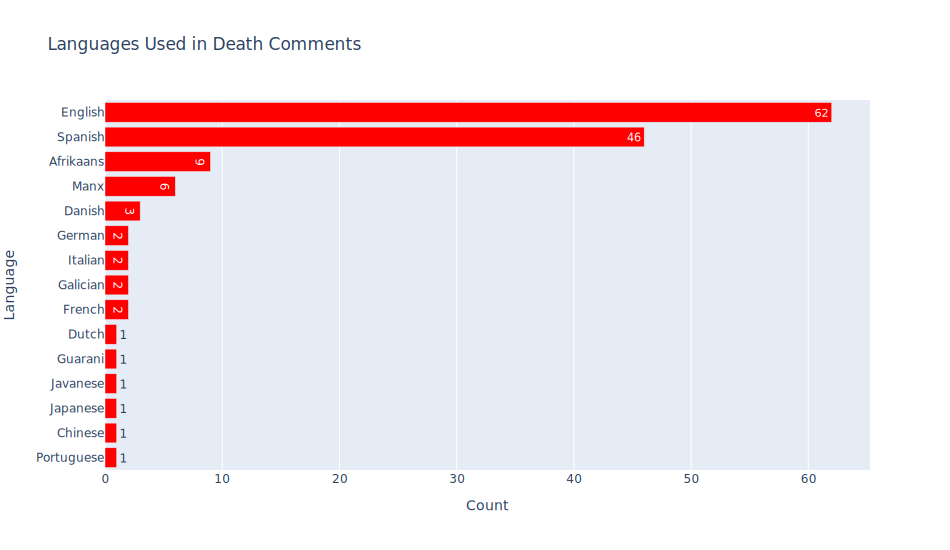

In [63]:
helpers.barh(df_death.language.value_counts().to_frame().reset_index().rename(columns={'index': 'Language', 
                                                                                       'language': 'Count'}).head(15),
             'Languages Used in Death Comments', threshold=0, c=0)

# Death Comments In Languages Other Than English

In [64]:
df_death_others = df_death[df_death.language != 'English']
print(f'{df_death_others.shape[0]} contributions, made by {df_death_others.username.nunique()} Users, In {df_death_others.language.nunique()} Languages')
df_death_others.head(2)

79 contributions, made by 77 Users, In 15 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
120,Mishel Judit Quisocala Condori,"aquí desde perú nadie te quiere volver a ver, ...",post0_comment,NaN,NaN,NaN,NaN,True,"aquí desde perú nadie te quiere volver a ver, ...",Spanish,"here from peru no one wants to see you again, ..."
276,Katharina Schäfer,das angebliche beweisfoto ist einfach lächerli...,post0_comment,NaN,NaN,NaN,NaN,True,das angebliche beweisfoto ist einfach lächerli...,German,the alleged proof photo is just ridiculous! an...


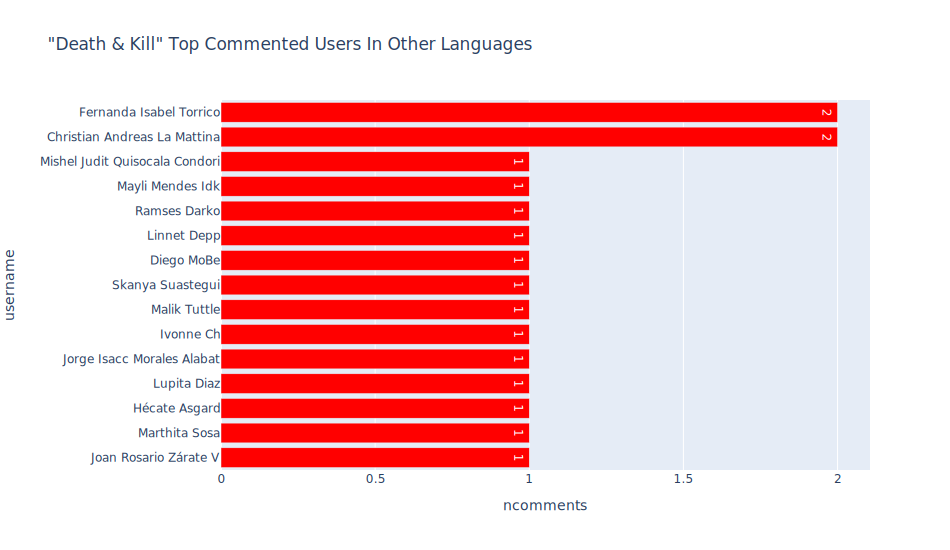

In [65]:
death_others_users = df_death_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(death_others_users.head(15), '"Death & Kill" Top Commented Users In Other Languages', threshold=0, c=0)

In [66]:
# This user is commenting in English
df_comments.query(" username == 'Fernanda Isabel Torrico' ").comment.value_counts().head()

#justiceforjohnnydeep\r\n#deathamberheard    2
Name: comment, dtype: int64

In [67]:
df_comments.query(" username == 'Christian Andreas La Mattina' ").comment.value_counts().head()

hai infangato il nome di johnny depp    2
Name: comment, dtype: int64

### Translation

In [68]:
# not a threat
df_comments.query(" username == 'Christian Andreas La Mattina' ").translated.value_counts().head()

you have muddied johnny depp's name    2
Name: translated, dtype: int64

In [69]:
df = df_death_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,"aquí desde perú nadie te quiere volver a ver, te queremos ver destruida así como destruirse a nuestro gran capitán",Spanish,"here from peru no one wants to see you again, we want to see you destroyed as well as destroy our great captain",Mishel Judit Quisocala Condori
1,"das angebliche beweisfoto ist einfach lächerlich !!!\r\njeder der einen harten tag hinter sich hat, könnte quasi so fotografiert werden,ich würde mich mit wahrhafter größe mit jonny d. einigen und zeigen das ich karakter im leib hab und nicht wie eine beleidigte im zickenstall aufführen,wie im kindergarten,oh sorry die haben mehr kribs",German,"the alleged proof photo is just ridiculous! anyone who has had a hard day could be photographed like that, i would agree with jonny d on true greatness and show that i have character in my body and not act like an offended girl in a bitch shed, like in kindergarten, oh sorry they have more crabs",Katharina Schäfer
2,"a mí nadie me ha pagado para firmar por su despido, yo lo hago gratis.",Spanish,"nobody has paid me to sign for their dismissal, I do it for free",Martinez Nana
3,"nadie mire sus películas, nadie mire aquaman",Spanish,"nobody watch his movies, nobody watch aquaman",Ar An Melgar
4,tú eres la razón por la cual un hombre puede ayudar a matar una mujer sin nunca haber matado a ninguna persona,Spanish,you are the reason a man can help kill a woman without ever having killed anyone,K̶e̶v̶i̶n̶ Tomas Martinez Barra
5,"nadie te apoya, todos estamos a tu contra y apoyando a jonnhy quien nunca haría esas estupideces tuyas :)",Spanish,"nobody supports you, we are all against you and supporting jonnhy who would never do those stupid things of yours:",Danétt Morales
6,"tu crees que existirías si johnny no te hubiese echo su esposa ?...no seas tan tonta , sin el no eres nadie .no tienes vergüenza, el dinero se acaba. y no creas que tendrás una buena vida , sacando dinero a lo fácil. #justiceforjohnnydeep",Spanish,"do you think you would exist if johnny had not made you his wife? don't be so stupid, without him you are nobody you have no shame, the money runs out and don't think you will have a good life, getting money the easy way #justiceforjohnnydeep",Karinita Davila
7,"nadie ha pagado una campaña contra ti amber, simplemente te odiamos 😁",Spanish,no one has paid for a campaign against you amber we just hate you,Sonia Ascencio
8,"las mujeres luchamos por las mujeres, pero sin duda nadie pondría un dedo al fuego por ti.",Spanish,"women fight for women, but no one would put a finger in the fire for you",Valita Espejo
9,a nadie le importa,Spanish,nobody cares,Carolina Quintero


In [70]:
df = df_death_others[['comment', 'language','translated', 'username']][60:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,"fuori dal me too! now!!!! vergonosa, viscida e vigliacca!!! sapete che la mamma di johnny sospettava tutto?? ma lei nel 2016 ha cominciato il casino tre giorni dopo la morte della mamma!!! proprio a dire: ""avevi ragione ma non vedrai mai che avevi ragi…see more",Italian,"out of me too! now !!!! shaggy, slimy and cowardly !!! do you know that johnny's mom suspected everything ?? but in 2016 she started the mess three days after the death of her mother !!! just to say: you were right but you will never see that you had reason and more",Simone Prete
1,hai infangato il nome di johnny depp,Galician,you have muddied johnny depp's name,Christian Andreas La Mattina
2,"ella le corto el dedo, le quemó la cara con un cigarrillo, echó a la basura sus medicamentos, le pegó con la puerta...le tiró de todo cuanto pudo a la cabeza, le golpeó, le pateó, le escupió, se burló e insultó hasta el cansancio haciéndole sentir un m…see more",Spanish,"She cut off his finger, burned his face with a cigarette, threw his medicine in the trash, hit him with the door, threw everything he could at his head, hit him, kicked him, spat on him, mocked and insulted him until he died. tiredness making you feel a msee more",JI Alejandre
3,deberías hacerle un favor a la humanidad y suicidarte..\r\nte odiamos\r\n#justicieforjohnny,Spanish,you should do humanity a favor and kill yourself we hate you #justiceforjohnny,Carola CL
4,"por que no mejor te suicidas por la mierda que eres y nos lo transmites en vivo, eso si que daría gusto perra.",Spanish,"why don't you kill yourself for the shit you are and broadcast it to us live, that would be nice bitch",Gabrielle Riddle
5,mucha 🐶 hpta\r\nmuera c,Spanish,a lot of hpta die c,Natalia Burbano Trujillo
6,"jamais je likerai pour vous, 😠😡je préférai mourir que de trahir mon johnny depp d’amour ❤️❤️❤️\r\nje l’adore je l’aime de tout mon cœur\r\n#justiceforjohnnydeep ❤️❤️❤️❤️❤️❤️❤️❤️❤️",French,"I will never like for you, I would rather die than betray my love johnny depp I adore him I love him with all my heart #justiceforjohnnydeep",Coco Depp
7,plutot creuver pauvre fille 🤮🤮🤮🤮,French,rather die poor girl,Florence Martin-duloz
8,"pucha ... que mal que existan mujeres que si han sufrido de maltratos .. en mi país ""chile "" han muerto miles y miles has sufrido. cortes .puñaladas. a una le sacaron los ojos y sigue viva .\r\ny a ti espécimen desagradable hipócrita mentirosa .que te aut…see more",Spanish,"Damn it's too bad that there are women who have suffered mistreatment in my country, Chile, thousands and thousands have died, you've suffered cuts, stabs, one of them had her eyes gouged out and she's still alive, and you, a nasty specimen, a hypocrite, a liar, I'll help you see more",Maria Fuentes
9,只想说 你妈死了，你纯粹是个妓女。,Chinese,Just want to say your mom is dead and you're a pure prostitute.,Parker Thomas


# Death Comments

In [71]:
df_death.comment.value_counts().head()

die                                          4
#deathtoamberheard                           3
kys                                          3
#justiceforjohnnydepp #deathamberheard       3
#justiceforjohnnydeep\r\n#deathamberheard    2
Name: comment, dtype: int64

In [72]:
df = df_death[['comment', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,my son's father beat me so badly while i was pregnant he almost killed my child and myself. i'm listening to you berate him and tell at him and cuss at him on these tapes. he can't even get a word in. you should have been thankful he always walked away…see more,Michealie McDowell
1,"aquí desde perú nadie te quiere volver a ver, te queremos ver destruida así como destruirse a nuestro gran capitán",Mishel Judit Quisocala Condori
2,"remove yourself from aquaman 2 you twisted pippi longstocking! also, i’m pretty sure you played a role in cal worthington’s mysterious death! he was a car salesman out of long beach! turn yourself in amber!!!",Jeffrey Danna
3,youre going to be in the videos of 2050 when they do a recap of the actors whos career died before it began.,Rey Abdel Rivera
4,everyone hates you amber why you were so cruel to jonny depp it is not his fault that your brain is full of dead fleas and fluff,Valentina Meraz Sosa
5,she killed what supposed to be an another movie from pirates of th caribbean,Lawrence Aranas Montalban
6,i am so disgusted by what you have done on this domestic violence against johnny depp. i have been a victim of domestic violence where i was almost killed. you make me sick that you use this as your way to make money. you clearly physically abused your…see more,Carol Janzen
7,"the worst quote i’ve ever read was by amber heard . “ you are a man . no one will ever believe you .” this my friends , is why men kill themselves .",Sean Virgin
8,"das angebliche beweisfoto ist einfach lächerlich !!!\r\njeder der einen harten tag hinter sich hat, könnte quasi so fotografiert werden,ich würde mich mit wahrhafter größe mit jonny d. einigen und zeigen das ich karakter im leib hab und nicht wie eine beleidigte im zickenstall aufführen,wie im kindergarten,oh sorry die haben mehr kribs",Katharina Schäfer
9,you belong in jail for abuse. as of right now your career is dead.,Jeffrey Burney


In [73]:
df = df_death[['comment', 'username']][60:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,you can fuck off and die.,Gabriel Maco
1,hope you die a horrible death,Ric Key
2,i hope you kill yourself,Jorge Villarán
3,u should die,Roberto Ivan Hernandez Hilerio
4,amber. you belong in jail for your reputation murder.,Mike Schlüter
5,no one is on your side amber. soon your career will be as dead as jeffrey epstein but we will be the ones who will kill it.,Les Jones
6,very beautiful face. romantic director cecil b demille would have loved it. watching his early comedies of the late 1910s and 20s with you would be fun. romanticism and esthetics at www.aynrand.org ty ms ah! make money.,Edmund Bonczyk II
7,"pos, just die or dissapear already!",Koren Hamilton
8,"understand what you say that hollywood could reach a big audience and in that way try to do something. then you say we have to push the enveloppe, with that you try to open up people's minds that there is nothing to fear, those who not know that these …see more",Marangoz Kahraman
9,stay where die there ...,Mizanur Rahman Khan


# Top Users Commented with Death keywords

In [74]:
df_death.username.value_counts().head(10)

Marthita Sosa                   5
Peyton Legitt                   3
Fernanda Isabel Torrico         2
Koren Hamilton                  2
Ines Seni                       2
Christian Andreas La Mattina    2
Ivonne Ch                       1
Lluvia Diaz                     1
Jorge Isacc Morales Alabat      1
Lupita Diaz                     1
Name: username, dtype: int64

In [75]:
threat_users = threat_users | set(df_death.username)

# #deathtoamberheard

In [76]:
df_comments.query(" username == 'Marthita Sosa' ").comment.value_counts().head()

#deathtoamberheard                                                                                                                                                              3
destroyed part of the life of a great actor lied and others is a reverent shame as recommend to such people .. shame and a bit of disgust that god have mercy on his soul ..    2
fuck you #deadamberheard                                                                                                                                                        1
#justiceforjohnnydepp #deathamberheard                                                                                                                                          1
Name: comment, dtype: int64

# drop dead

In [77]:
df_comments.query(" username == 'Peyton Legitt' ").comment.value_counts().head()

i got kicked off twitter because you kept getting offended by my posts. guess who's making another and another 😜 funny you feel "bullied". just do everyone a favor and drop dead.    1
just un alive yourself already.                                                                                                                                                       1
just drop dead already                                                                                                                                                                1
she could drop dead and burn in hell.                                                                                                                                                 1
Name: comment, dtype: int64

In [78]:
df_comments.query(" username == 'Ines Seni' ").comment.value_counts().head()

amber heard admits it! johnny depp secret recording released! https://www.youtube.com/watch?v=8o4fsjkvfoc&t=142s                                                                                                                                                                                                                                                                                                        3
amber heard to johnny depp: 'i do remember, i did mean to hit you' https://www.youtube.com/watch?v=w9d6x3vadbw                                                                                                                                                                                                                                                                                                          2
regarding the poop-gate incident:\r\n1. she blames the dogs\r\n2: she tells a manager that it was a practical joke…see more                                                         

# just die or dissapear

In [79]:
df_comments.query(" username == 'Koren Hamilton' ").comment.value_counts().head()

pos, die already                       1
pos, just die or dissapear already!    1
Name: comment, dtype: int64

# #deathtoamberheard

In [80]:
df_comments.query(" username == 'Fernanda Isabel Torrico' ").comment.value_counts().head()

#justiceforjohnnydeep\r\n#deathamberheard    2
Name: comment, dtype: int64

<br>

In [81]:
df_comments.query(" username == 'Michealie McDowell' ").comment.value_counts().head()

my son's father beat me so badly while i was pregnant he almost killed my child and myself. i'm listening to you berate him and tell at him and cuss at him on these tapes. he can't even get a word in. you should have been thankful he always walked away…see more    1
Name: comment, dtype: int64

In [82]:
df_comments.query(" username == 'Stefani Elisabeth' ").comment.value_counts().head()

from the bottom of my heart, i hope you seek counseling for your anger issues. it will destroy your life if you lose control and end up killing someone. i've listened to quite a bit of the audio between you two and it's clear that you need professio…see more    1
Name: comment, dtype: int64

In [83]:
df_comments.query(" username == 'Renata Vasquez' ").comment.value_counts().head()

en serio. me desepcione bastante de esta...\r\n\r\nponbre de depp. estar a la par de esta falsa... que indignación a de sentir... él siendo un gran actor, perdiendo tiempo con esa sarrapastroza. …see more                                                                                                                                                                    1
no puedo entender.. como hay gente como tú en este mundo... ojala seas despedida. porque todoos apoyamos mas a #johnnydepp. porque es un gran actris... porque da mas de lo que se le pide.. porque impacta en todos los papeles dados...\r\nemcambio tu... porfavor dejas mucho que desear....\r\nquisiera tenerte en frente y demostrarte todo el desprecio que probocas.!    1
Name: comment, dtype: int64

In [84]:
df_comments.query(" username == 'Armando Sánchez' ").comment.value_counts().head()

you should kill yourself! the world doesn’t need people like you!    1
Name: comment, dtype: int64

In [85]:
df_comments.query(" username == 'Yosoy L Quien Mas' ").comment.value_counts().head()

nadie quiere ver a una perra sacándose fotos cuando envejescas tus tetas estarán por piso y tú culo se estará pudriendo de la mierda de mentiras que salen de tu boca 💩💩perraaaaaaa2💩    1
Name: comment, dtype: int64

<font color='red'>(Spanish)(Translation -> nobody wants to see a bitch taking pictures of herself when you get old your boobs will be on the floor and your ass will be rotting from the shit of lies that come out of your mouth 💩💩 bitchaaaaaa2💩)</font> 

<br>

<br>

## NOTE: "These areas are extracted from the text to help in extracting the keywords to be used in the analysis"

In [86]:
# death_kill = {'death', 'muerte', 'die', 'morire', 'morir', 'kill', 'matar', 'murder'}

## Death | Morte (Italian) | Tod (German) | Muerte (Spanish)

- #deathamberheard
- all we want to see u death
- death amber heard
- hope you die a horrible death
- i’m pretty sure you played a role in cal worthington’s mysterious death!
- jsjdjss muerte a esta pvt4 <br>
<font color='red'>(Spanish) jsjdjss death to this pvt4<font>

In [87]:
df_comments[df_comments.comment.str.contains("death|muerte")].comment.value_counts().head(60)

#justiceforjohnnydepp #deathamberheard                                                                                                                                                                              3
#deathtoamberheard                                                                                                                                                                                                  3
#justiceforjohnnydeep\r\n#deathamberheard                                                                                                                                                                           2
remove yourself from aquaman 2 you twisted pippi longstocking! also, i’m pretty sure you played a role in cal worthington’s mysterious death! he was a car salesman out of long beach! turn yourself in amber!!!    1
all we want to see u death                                                                                                                      

In [88]:
df = df_comments[df_comments.comment.str.contains("death|muerte")][['comment', 'username']]
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,"remove yourself from aquaman 2 you twisted pippi longstocking! also, i’m pretty sure you played a role in cal worthington’s mysterious death! he was a car salesman out of long beach! turn yourself in amber!!!",Jeffrey Danna
1,#justiceforjohnnydepp #deathamberheard,Gaity Figueroa
2,#justiceforjohnnydeep\r\n#deathamberheard,Fernanda Isabel Torrico
3,all we want to see u death,David Carrillo
4,death amber heard‼️,Alondra Rivas Núñez
5,#deathtoamberheard,Marthita Sosa
6,hope you die a horrible death,Ric Key
7,#justiceforjohnnydepp #deathamberheard,Javier Quintanilla
8,#deathtoamberheard,Marthita Sosa
9,#justiceforjohnnydepp #deathamberheard,Marthita Sosa


## Die | Morire (Italian) | Sterben (German)  | Morir (Spanish)

- die
- go die
- bitch die
- fuck u, die pls
- pls die thnx
- i hope you die, you piece of shit
- you can fuck off and die.
- hope you die a horrible death
- u should die
- pos, just die or dissapear already!
- stay where die there ...
- worst photo and i hope your career dies
- why would anyone want to see your instagram? unless they were trying to find a way to inflict serious pain on you! die you whore
<br>
<br>
- devi morire troia <br>
<font color='red'>(Italian) you must die bitch</font>
- amber puttana schifosa, you should die 🐖🐖🐖 <br>
<font color='red'>(Italian)(Translation -> lousy whore amber, you should die)</font>
- te tendria cerca te romperia los ovarios de una sola patada,inmundicia,ojala te pudras antes de morir! <br>
<font color='red'>(Spanish) I would have you close I would break your ovaries with a single kick, filth, I hope you rot before you die!</font>

In [89]:
# df_comments[df_comments.comment.str.contains('die|morir')].comment.value_counts().head(60)

In [90]:
df = df_comments[df_comments.comment.str.contains('die|morir')][['comment', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,"aquí desde perú nadie te quiere volver a ver, te queremos ver destruida así como destruirse a nuestro gran capitán",Mishel Judit Quisocala Condori
1,youre going to be in the videos of 2050 when they do a recap of the actors whos career died before it began.,Rey Abdel Rivera
2,"das angebliche beweisfoto ist einfach lächerlich !!!\r\njeder der einen harten tag hinter sich hat, könnte quasi so fotografiert werden,ich würde mich mit wahrhafter größe mit jonny d. einigen und zeigen das ich karakter im leib hab und nicht wie eine beleidigte im zickenstall aufführen,wie im kindergarten,oh sorry die haben mehr kribs",Katharina Schäfer
3,i'm not defending amber but a little bit of respect her mother is died,Neasa Stompanato
4,"a mí nadie me ha pagado para firmar por su despido, yo lo hago gratis.",Martinez Nana
5,"nadie mire sus películas, nadie mire aquaman",Ar An Melgar
6,"nadie te apoya, todos estamos a tu contra y apoyando a jonnhy quien nunca haría esas estupideces tuyas :)",Danétt Morales
7,"tu crees que existirías si johnny no te hubiese echo su esposa ?...no seas tan tonta , sin el no eres nadie .no tienes vergüenza, el dinero se acaba. y no creas que tendrás una buena vida , sacando dinero a lo fácil. #justiceforjohnnydeep",Karinita Davila
8,"nadie ha pagado una campaña contra ti amber, simplemente te odiamos 😁",Sonia Ascencio
9,"las mujeres luchamos por las mujeres, pero sin duda nadie pondría un dedo al fuego por ti.",Valita Espejo


In [91]:
# df_comments[df_comments.comment.str.contains('die|morir')].comment.value_counts()[60:].head(60)

In [92]:
df = df_comments[df_comments.comment.str.contains('die|morir')][['comment', 'username']][60:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,"es la peor persona que haya existido, una persona doble cara y ambiciosa.\r\nquiere terminar ar con la carrera de un gran actor que cuenta con un gran talento y es johnny depp.\r\nes una mentirosa, vividora y violenta, ya que en una de sus relaciones anteriores se dieron a conocer pruebas de que ella era quien violentaba y ahora se quiere hacer la víctima con todos los medios y con la gente, pero johnny depp no está sólo y le da coraje el ver todo el apoyo que tiene a su favor y por eso inventa que el favoritismo es porque hay una paga de por medio cuándo lo único que influye es la gran persona que a demostrado ser johnny depp.\r\nasí que sin más, no recomiendo esta página ni seguir a amber heard por mentirosa.",Skanya Suastegui
1,"the only thing i would recommend amber heard for is a lengthy prison sentence. she clearly abused her ex husband and was abusive to her last partner in 2009. perhaps amber could do the decent thing and not only resign from aquaman 2, but from acting in general. failing that, she could always go to prison and pretend to be a victim there. she might get a more sympathetic audience in prison.",Nicola Hollingsworth
2,"esta tipa es un asco de persona, no merece el respeto de nadie. justicia para johnny depp",Diego MoBe
3,she is a nasty horrible evil lying women (if you can call her a women) she gives every one of us a bad name now! she is the reason men die because they feel they can’t seek help and if they do they feel like they won’t be heard! nasty nasty nasty piece of work,Helena Barbara Wright
4,"realmente no hay nada que recomendar de está tipeja, no representa nada ni a nadie",Ramses Darko
5,"you're the reason, real victims get victim shamed. i fully stand on believing a victim until proven differently. makes me sick that i did that for you and you were just crying wolf. i'm even a die hard fan of johnny depp and i put that love to the side to hear your lies. we don't want to hear your apologies. bare minimum is asking for your career to be trashed. when really, you deserve prison time. -a true victim",Kristi Weiser
6,"#justiceforjohnnydeep. esta mujer es una arpia, viendo los videos y grabaciones esta claro que ella lo maltrataba #amberheardisanabuser a mi nadie me está pagando por decir esto claramente ella está mal de la cabeza y como es que sigue normal con su trabajo en el cine ella es un mal ejemplo!! con esos antecedentes que tiene #johnnydeppisinnocent #boycottaquaman2",Sally N. Pumaleque Incalla


<br>

# Kill | Uccisione (Italian) | Töten (German) | Matar (Spanish)

- tú eres la razón por la cual un hombre puede ayudar a matar una mujer sin nunca haber matado a ninguna persona <br>
<font color='red'>(Spanish) you are the reason a man can help kill a woman without ever having killed anyone</font>

In [93]:
# df_comments[df_comments.comment.str.contains('kill|matar|kys')].comment.value_counts().head(60)

In [94]:
df = df_comments[df_comments.comment.str.contains('kill|matar|kys')][['comment', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,my son's father beat me so badly while i was pregnant he almost killed my child and myself. i'm listening to you berate him and tell at him and cuss at him on these tapes. he can't even get a word in. you should have been thankful he always walked away…see more,Michealie McDowell
1,she killed what supposed to be an another movie from pirates of th caribbean,Lawrence Aranas Montalban
2,i am so disgusted by what you have done on this domestic violence against johnny depp. i have been a victim of domestic violence where i was almost killed. you make me sick that you use this as your way to make money. you clearly physically abused your…see more,Carol Janzen
3,"the worst quote i’ve ever read was by amber heard . “ you are a man . no one will ever believe you .” this my friends , is why men kill themselves .",Sean Virgin
4,"i wish i was a woman in the 21st century. you're allowed to do so much as kill your own baby if you wanted to after a little too much to drink the night before. we've heard the tapes amber, what makes you a saint exactly? must be nice. even johnny's ex wives vouched for him. i will never pay to see anything you are in ever again, mark my words.",Kendall Sanders
5,"deep is a lose cannon he lost me and grandchildren when he said "" an actor needs to kill the potus"" all our children watching this guy and he says that.",Rae Wilson
6,tú eres la razón por la cual un hombre puede ayudar a matar una mujer sin nunca haber matado a ninguna persona,K̶e̶v̶i̶n̶ Tomas Martinez Barra
7,kys,Jaime André Becerra
8,machete kills,Gerald Drake
9,nobody gives a fuck. kill yourself.,Samuel Sun


# Murder

In [95]:
df_comments[df_comments.comment.str.contains('murder')].comment.value_counts().head(60)

well well looks like amber and her free loading mates were planning a murder\r\n\r\nhttps://youtu.be/ajn1pj48wka    1
amber. you belong in jail for your reputation murder.                                                               1
Name: comment, dtype: int64

<br>

<a id='hell_burn'></a>
>>## Hell & Burn
> <ul>
 <li><a href="#all_threat">All Threat</a></li>
 <li><a href="#kill_death">Kill & Death</a></li>
 <li><a href="#hell_burn"><b>Hell & Burn</b></a></li>
 <li><a href="#crime_jail">Crime & Jail</a></li>
 <li><a href="#threat_users">Threat Users Contributions</a></li>
 </ul>

In [96]:
burn_hell = {'hell', 'inferno', 'infierno', 'ад', 'burn'}

In [97]:
df_burn1 = df_comments[df_comments.comment.str.contains('|'.join(burn_hell))]
df_burn2 = df_comments[df_comments.translated.str.contains('|'.join(burn_hell))]
df_burn = df_burn1.append(df_burn2)
df_burn.drop_duplicates(inplace=True)

In [98]:
print(f'{df_burn.shape[0]} contributions, made by {df_burn.username.nunique()} Users, In {df_burn.language.nunique()} Languages')
df_burn.head(2)

126 contributions, made by 117 Users, In 9 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
73,Tyler Schrodt,"the only reason i know who you are, is because...",post0_comment,NaN,NaN,NaN,NaN,True,"the only reason i know who you are, is because...",English,"the only reason i know who you are, is because..."
88,Donald Liverance,wouldn't it be great if he next lover actually...,post0_comment,NaN,NaN,NaN,NaN,True,wouldn't it be great if he next lover actually...,English,wouldn't it be great if he next lover actually...


In [99]:
df_burn.type.value_counts()

post0_comment    67
post1_comment    14
Not Recommend    14
post3_comment     9
post4_comment     8
post5_comment     8
post2_comment     6
Name: type, dtype: int64

# Languages Used in "Hell & Burn" Comments 

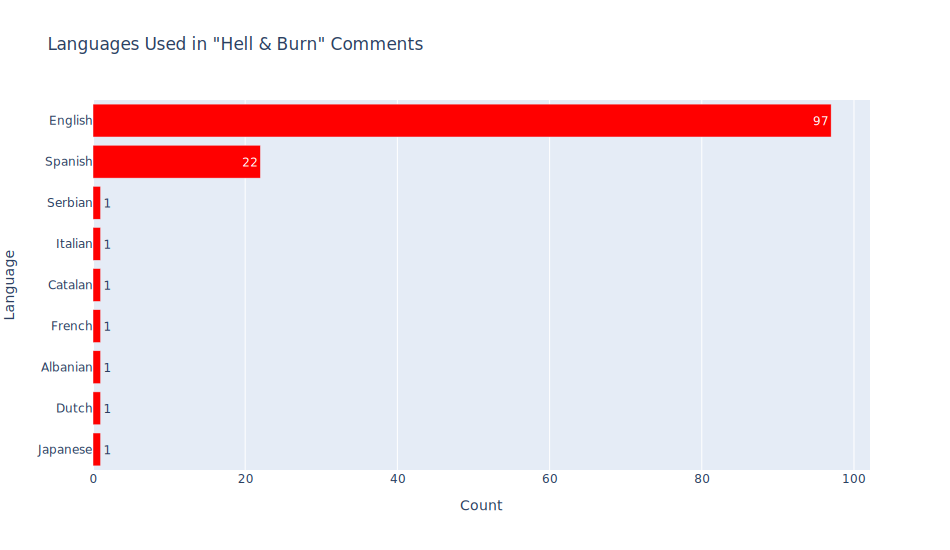

In [100]:
helpers.barh(df_burn.language.value_counts().to_frame().reset_index().rename(columns={'index': 'Language', 
                                                                                      'language': 'Count'}).head(15),
             'Languages Used in "Hell & Burn" Comments', threshold=0, c=0)

# "Hell & Burn" Comments In Languages Other Than English

In [101]:
df_burn_others = df_burn[df_burn.language != 'English']
print(f'{df_burn_others.shape[0]} contributions, made by {df_burn_others.username.nunique()} Users, In {df_burn_others.language.nunique()} Languages')
df_burn_others.head(2)


29 contributions, made by 25 Users, In 8 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
378,Abby's Burgers,tu y la panini deben de irse agarraditas dela ...,post0_comment,NaN,NaN,NaN,NaN,True,tu y la panini deben de irse agarraditas dela ...,Spanish,you and the panini must go hand in hand to hel...
689,Vladislav Goncharenko,гори в аду ембер блядддь,post0_comment,NaN,NaN,NaN,NaN,False,гори в аду ембер блядддь,Serbian,burn in hell ember damn


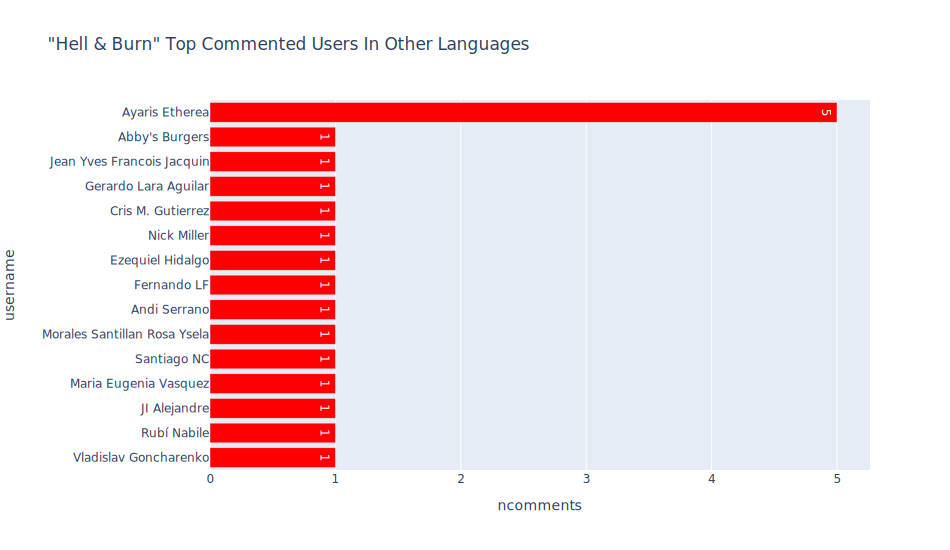

In [102]:
burn_others_users = df_burn_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(burn_others_users.head(15), '"Hell & Burn" Top Commented Users In Other Languages', threshold=0, c=0)

In [103]:
df = df_burn_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,tu y la panini deben de irse agarraditas dela mano al infierno son tal para cual hjsdp,Spanish,you and the panini must go hand in hand to hell they are such for which hjsdp,Abby's Burgers
1,гори в аду ембер блядддь,Serbian,burn in hell ember damn,Vladislav Goncharenko
2,"por mujeres como tú muchos hombres pasan infiernos, ojalá te quedaras tú sin trabajo",Spanish,"for women like you many men go through hell, I wish you would stay without a job",Marilupe Baena
3,te vas a sufrir en el infierno,Spanish,you will suffer in hell,Sandy MO
4,ojalá te quemes en el infierno...,Spanish,I hope you burn in hell,Luis Diego
5,maldita muere te en el infierno,Spanish,damn you die in hell,Karla Salazar Tapia
6,scamber turd lei non sa chi è jonny .. nessuno lo sà perché non è mai stato rivelato. ma la signora ha fatto il più grave errore della sua vita! prima andrà in prigione e poi all’inferno.\r\njonny e sacro!! cari signori!! questa è la rivelazione!! voleva…see more,Italian,scamber turd she doesn't know who jonny is nobody knows because it was never revealed but the lady made the biggest mistake of her life! first she will go to prison and then to hell jonny and sacred !! dear Sirs!! this is the revelation !! wanted more,Antonella Petrucci Alchemikiz
7,"es una perra maldita, mentirosa, mojon de baño publico. apestas, te vas a ir al infierno maldita hija de puta.",Spanish,"she's a fucking bitch, liar, public bathroom landmark you suck, you're going to hell you fucking son of a bitch",Adriana Loera Velasco
8,deja de hacer calumnias bruja esta eres una verguenza te vere en el infierno..... ( desde el cielo)\r\n#justiceforjhonnydeeb,Spanish,stop slandering witch this is a disgrace i will see you in hell from heaven #justiceforjhonnydeeb,Limbert Burgos Carrillo
9,alguien aqui que hable español y que porfavor me explique que diablos esta pasando y si es cierto lo que dicen de jhonny,Spanish,someone here who speaks spanish and please explain to me what the hell is going on and if it's true what they say about jhonny,Işmaęł Břiţo


# "Burn & Hell" Comments

In [104]:
df_burn.comment.value_counts().head(10)

la violenta era ella\r\n#bizarro le corto el dedo, le quemó la cara con un cigarrillo, echo a la basura sus medicamentos, le pegó con la puerta, le tiró de todo cuanto pudo a la cabeza, lo golpeó, lo pateó, le escupió, se burló e insultó hasta el cansanci…see more                                                             5
go to hell                                                                                                                                                                                                                                                                                                                           5
hello                                                                                                                                                                                                                                                                                                                                2
go to hellllll     

In [105]:
df = df_burn[['comment', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,"the only reason i know who you are, is because of this shit you did with depp.\r\n\r\notherwise who the hell are you? what have you done other than abuse men? not worth my time, sadly i wish i would be able to forget who you are, but because of what you did to one of my favorite actors, who i might add is incredible human being. …see more",Tyler Schrodt
1,wouldn't it be great if he next lover actually treated how she said she was treated hell i'd even send him some money in jail just for being such a good guy,Donald Liverance
2,"men can also be victims of abuse not just women. you've never been abused.... if you were so called ""abused"" wheres the evidence oh wait theres not any.... only evidence thats there is you beating, burning, cutting a finger, etc. to johnny. you can have three of my exes y'all seem to like beating on people.",Kellee A Cummins
3,i hope u burn in hell for hijacking platform of domestic abuse for real victims!😡 there are many out there who need help but definitely not u!,Esther Chong
4,"you will have to pay for the damage done to johnny deep, bad woman, go to hell.",Mariana Beatle
5,just watched aquaman with my nephews..it was great...good job! tell people to stay the hell out of your personal business,Wv Tom
6,dang... you may be rich... but your personality makes you hella ugly.,Ouyay Uckerfay
7,tu y la panini deben de irse agarraditas dela mano al infierno son tal para cual hjsdp,Abby's Burgers
8,i just came here to say that i hate you amber. i hope you go to hell 😚,Ariane Samantha Abrera
9,"absolutely atrocious, you’ll burn for sure. if you are reading this amber, hope you get fired",Pho Luck


In [106]:
df = df_burn[['comment', 'username']][60:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,rot in hell you and your entire generations! amen🙏,Emrys Gau
1,"you're going to hell, they don't let people like you into heaven 👍",Sophie Foster
2,so i know that the internet is huge. so can you guys burn her alive on instagram then here??? looks like she’s deleting all comments on her posts :)) let’s make this viral for justice. she owns an apology to the #metoo community. how dare she!,Alondra Carbajal
3,this evil no good bitch should be locked up!! i hope a very hot hell is waiting in you!!!,Jason T Carpenter
4,go to hell 🤮,Delia Chávez Solano
5,hello. f*ck you. bye.,Alexandra Cristina Cojocaru
6,rot in hell,Brit Hilton
7,go to hell,Alex Caryn
8,hello,Javoh Xolmamatov
9,fucking rat i hope you dont show up on aquaman 2 and i hope your fucking career goes down back to hell. what a fucking clown #justiceforjohnnydepp,Dillan Macasiano


# Top Users Commented with "Burn & Hell" keywords

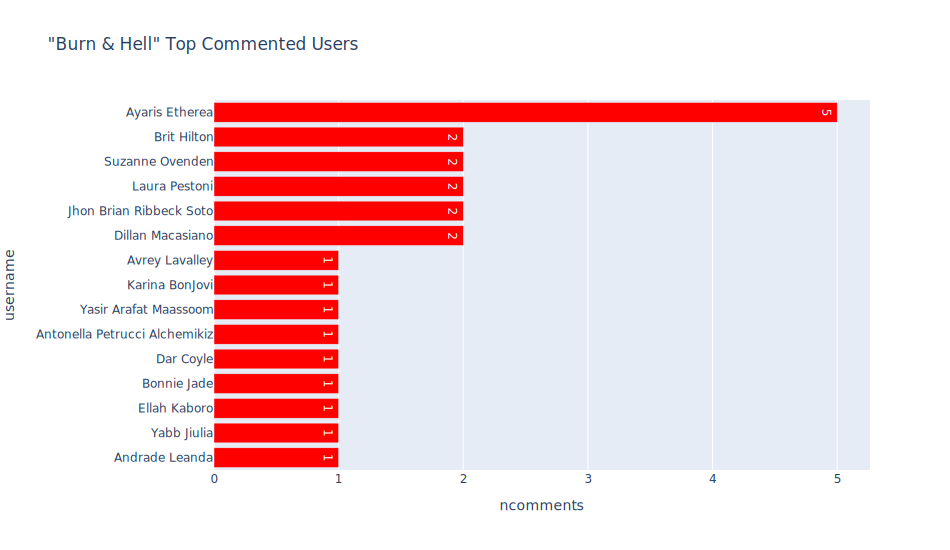

In [107]:
burn_users = df_burn.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(burn_users.head(15), '"Burn & Hell" Top Commented Users', threshold=0, c=0)

In [108]:
df_burn.username.value_counts().head()

Ayaris Etherea             5
Brit Hilton                2
Suzanne Ovenden            2
Laura Pestoni              2
Jhon Brian Ribbeck Soto    2
Name: username, dtype: int64

In [109]:
threat_users = threat_users | set(df_burn.username)

In [110]:
df_comments.query(" username == 'Suzanne Ovenden' ").comment.value_counts().head()

all you did by your jealousy and lies to only gain money, was lose to face even more. you very silly woman.                                                                                                                                                                                                                          1
no thank you i don't follow jealous liars and psychopaths. ❤️ johny depp and always will. your lies don't deter us. 🏴󠁧󠁢󠁥󠁮󠁧󠁿🏴󠁧󠁢󠁥󠁮󠁧󠁿🇬🇧                                                                                                                                                                                                 1
i'd never heard of heard until the bs she caused on our great legend johnny depp. who the hell are you amber heard? no one that's who fake drama queen. jealousy gets you no where.... i'll remember you only as a nasty abuser to johnny depp. 🇬🇧🏴󠁧󠁢󠁥󠁮󠁧󠁿. judges make mistakes maybe he was a biased prat, wouldn't surprise me.    1
all men stay away f

In [111]:
df_comments.query(" username == 'Jhon Brian Ribbeck Soto' ").comment.value_counts().head()

seeeeee u in hell                                                               1
hope some u fall into hate and go to hell !!! people like u must disappear !    1
Name: comment, dtype: int64

In [112]:
df_comments.query(" username == 'Dillan Macasiano' ").comment.value_counts().head()

this fucking gold digger i hope your career goes down back to hell #justiceforjohnnydepp                                                              1
fucking rat i hope you dont show up on aquaman 2 and i hope your fucking career goes down back to hell. what a fucking clown #justiceforjohnnydepp    1
Name: comment, dtype: int64

In [113]:
df_comments.query(" username == 'Brit Hilton' ").comment.value_counts().head()

evil vile creature          1
rot in hell                 1
goto hell and stay there    1
Name: comment, dtype: int64

In [114]:
df_comments.query(" username == 'Laura Pestoni' ").comment.value_counts().head()

she'll be in hell, where she belongs                                    1
gold digging evil ugly person                                           1
you evil, ugly witch. i hope you rot in hell                            1
skank                                                                   1
evil bitch...karma...just remember. karma is a bitch, and so are you    1
Name: comment, dtype: int64

<br>

<a id='crime_jail'></a>
>>## Punish, Crime, Jail & Prison
> <ul>
 <li><a href="#all_threat">All Threat</a></li>
 <li><a href="#kill_death">Kill & Death</a></li>
 <li><a href="#hell_burn">Hell & Burn</a></li>
 <li><a href="#crime_jail"><b>Crime & Jail</b></a></li>
 <li><a href="#threat_users">Threat Users Contributions</a></li>
 </ul>

In [115]:
crime_jail = {'pay', 'pagar', 'punish', 'crime', 'criminal', 'jail', 'prison', 'prigione', 'prisión',
              'deserve', 'karma'}

In [116]:
df_crime1 = df_comments[df_comments.comment.str.contains('|'.join(crime_jail))]
df_crime2 = df_comments[df_comments.translated.str.contains('|'.join(crime_jail))]
df_crime = df_crime1.append(df_crime2)
df_crime.drop_duplicates(inplace=True)

In [117]:
print(f'{df_crime.shape[0]} contributions, made by {df_crime.username.nunique()} Users, In {df_crime.language.nunique()} Languages')
df_crime.head(2)


382 contributions, made by 367 Users, In 11 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
15,Jacky Ortiz,i hope nothing but the worst for you johnny de...,post0_comment,NaN,NaN,NaN,NaN,True,i hope nothing but the worst for you johnny de...,English,i hope nothing but the worst for you johnny de...
39,Sareena Sky,oh amber heard...u just wanted attention. you ...,post0_comment,NaN,NaN,NaN,NaN,True,oh amber heardu just wanted attention you lied...,English,oh amber heardu just wanted attention you lied...


In [118]:
df_crime.type.value_counts()

post0_comment    179
Not Recommend     75
post4_comment     40
post1_comment     30
post2_comment     24
post3_comment     23
post5_comment     11
Name: type, dtype: int64

# Languages Used in "Crime & Jail" Comments 

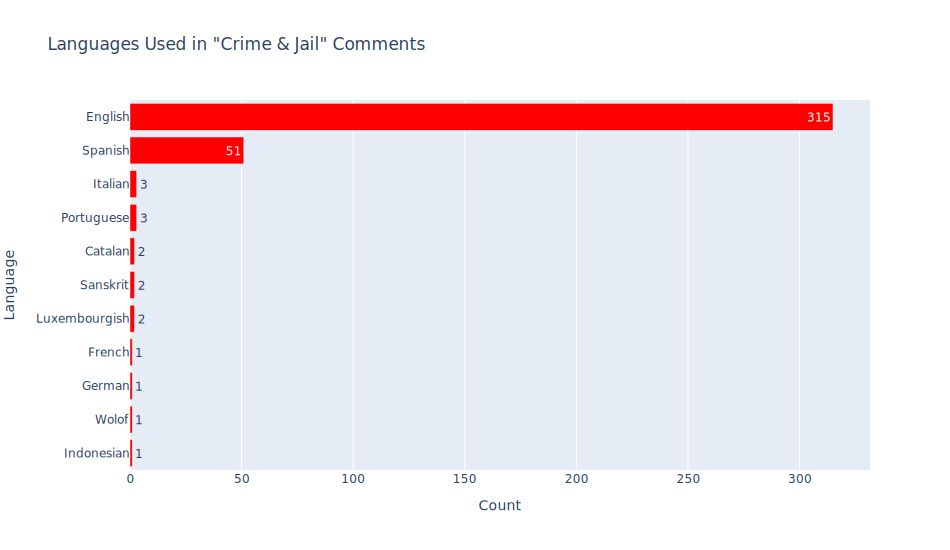

In [119]:
helpers.barh(df_crime.language.value_counts().to_frame().reset_index().rename(columns={'index': 'Language', 
                                                                                       'language': 'Count'}).head(15),
             'Languages Used in "Crime & Jail" Comments', threshold=0, c=0)

# "Crime & Jail" Comments In Languages Other Than English

In [120]:
df_crime_others = df_crime[df_crime.language != 'English']
print(f'{df_crime_others.shape[0]} contributions, made by {df_crime_others.username.nunique()} Users, In {df_crime_others.language.nunique()} Languages')
df_crime_others.head(2)


67 contributions, made by 65 Users, In 10 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
156,Nayd Tania Blanco Quispe,tarde o temprano llegará la hora de pagar todo...,post0_comment,NaN,NaN,NaN,NaN,True,tarde o temprano llegará la hora de pagar todo...,Spanish,Sooner or later the time will come to pay for ...
529,Lupita Solis,vas a pagar tarde o temprano el daño que estás...,post0_comment,NaN,NaN,NaN,NaN,True,vas a pagar tarde o temprano el daño que estás...,Spanish,sooner or later you are going to pay for the d...


In [121]:
df_crime.language.value_counts()

English          315
Spanish           51
Italian            3
Portuguese         3
Catalan            2
Sanskrit           2
Luxembourgish      2
French             1
German             1
Wolof              1
Indonesian         1
Name: language, dtype: int64

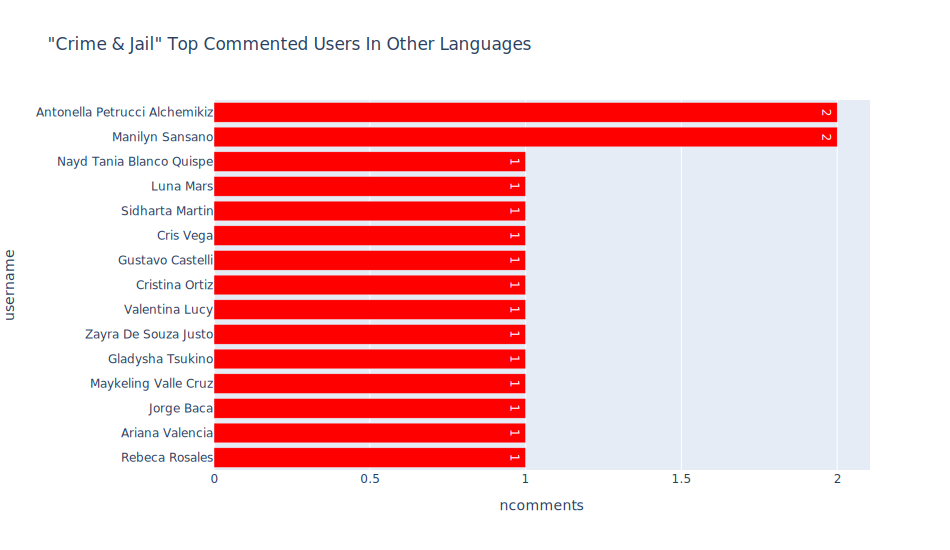

In [122]:
crime_others_users = df_crime_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(crime_others_users.head(15), '"Crime & Jail" Top Commented Users In Other Languages', threshold=0, c=0)

In [123]:
df_comments.query(" username == 'Antonella Petrucci Alchemikiz' ").comment.value_counts().head()

don't use children too because god will punish you very hard this time! after what you did to jonny! you don't know who jonny is! jonny is blessed by god from birth and you are a devil!                                                                                  3
dio ti punirà per quello che hai fatto! è molto pesantemente! molto! diavolo!                                                                                                                                                                                              1
tutti i demoni li vomiterò dalla mia bocca! parola di dio!                                                                                                                                                                                                                 1
scamber turd lei non sa chi è jonny .. nessuno lo sà perché non è mai stato rivelato. ma la signora ha fatto il più grave errore della sua vita! prima andrà in prigione e poi all’inferno.\r\njo

### Translation

In [124]:
df_comments.query(" username == 'Antonella Petrucci Alchemikiz' ").translated.value_counts().head()

don't use children too because god will punish you very hard this time! after what you did to jonny! you don't know who jonny is! jonny is blessed by god from birth and you are a devil!                                                                      3
god will punish you for what you did! it is very heavily! very! Devil!                                                                                                                                                                                         1
all the demons I will vomit them out of my mouth! God's word!                                                                                                                                                                                                  1
scamber turd she doesn't know who jonny is nobody knows because it was never revealed but the lady made the biggest mistake of her life! first she will go to prison and then to hell jonny and sacred !! dear Sirs!! this is the rev

In [125]:
# English
df_comments.query(" username == 'Manilyn Sansano' ").comment.value_counts().head()

#amberheardshouldbeinprison!     1
shit amber                       1
#amberheardshouldbeinprison!!    1
#psychopath!!!!                  1
Name: comment, dtype: int64

In [126]:
df = df_crime_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,tarde o temprano llegará la hora de pagar todo el mal que uno hace..!!,Spanish,Sooner or later the time will come to pay for all the evil that one does!,Nayd Tania Blanco Quispe
1,vas a pagar tarde o temprano el daño que estás causando. ni siquiera nunca te he conocido cómo actriz se de vos por el daño que estás causando al gran actor depp. bruja,Spanish,sooner or later you are going to pay for the damage you are causing i have never even met you as an actress i know of you for the damage you are causing to the great actor depp witch,Lupita Solis
2,calla cojuda eres una mentirosa de lo peor q existe pero recuerda tarde o temprano lo vas a pagar acuerdate,Spanish,shut up you are a liar of the worst that exists but remember sooner or later you are going to pay remember,Richard Monzon Caceres
3,no puedes predicar igualdad si no eres capaz de respetar para que te respeten. lo malo que hiciste en algún momento la vida te lo va a cobrar por dos. se llama karma...,Spanish,you cannot preach equality if you are not able to respect so that they respect you the bad thing you did at some point life is going to charge you for two it is called karma,Kat AJ
4,ya te llegará el karma ✌️,Catalan,karma will come to you ✌,Polo López
5,todo lo que hiciste a johnny depp te lo sucedera karma,Spanish,everything you did to johnny depp karma will happen to you,Alicia Nogales
6,je vous souhaite la prison aucune classe mangez en pleins procès ça donne le ton sur vous une connasse . i hope you go on jail!,French,I wish you prison no class eat in the middle of a trial it sets the tone for you bitch i hope you go on jail!,Fad Drissi
7,"debieras de sincerarte y dejar de hacer culpable a alguien inocente, el karma existe y te va a penar siempre",Spanish,"you should be honest and stop making someone innocent guilty, karma exists and it will always hurt you",Christian Marcelo Zelaya Figueroa
8,eres una mala mujer y mentirosa pero existe el karma,Spanish,you are a bad woman and a liar but there is karma,Lii Cii Jan
9,"ni con todo el dinero que le quitaste al jhonny, ni con toda la humillacion que le hiciste pasar, jamas seras feliz en la vida, existe un karma y lo veras pronto psicopata",Spanish,"neither with all the money you took from jhonny, nor with all the humiliation you made him go through, you will never be happy in life, there is a karma and you will see it soon psychopath",Bladimir Martinez


# "Crime & Jail" Comments

In [127]:
df_crime.comment.value_counts().head()

don't use children too because god will punish you very hard this time! after what you did to jonny! you don't know who jonny is! jonny is blessed by god from birth and you are a devil!       3
you should be in jail                                                                                                                                                                           2
i am not satisfied that johnny suffered due to that cow's lies.\r\n\r\nhe's so adorable, he didn't deserve it. i'm pissed.                                                                      2
this cunt needs to go away... fuck her life for ever existing.\r\n\r\njohnny depp didn't deserve what that piece of shit woman did                                                              2
i hope nothing but the worst for you johnny depp is my idol since my childhood he deserves nothing but they best he’s the most beautiful and handsome actor on earth to me💕💕 love you johnny    1
Name: comment, dtype: int64

In [128]:
df = df_crime[['comment', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,i hope nothing but the worst for you johnny depp is my idol since my childhood he deserves nothing but they best he’s the most beautiful and handsome actor on earth to me💕💕 love you johnny,Jacky Ortiz
1,oh amber heard...u just wanted attention. you lied about johnny. so happy that you are out of his life. you didn't deserve him. augh!,Sareena Sky
2,who would want to follow an evil person who abused johnny depp and plays the sympathy card. you should be held accountable for your crimes you sad person,Michelle Fieldhouse
3,"as a domestic violent victim, can see through the bull shit. karma is about to bite. i wish nothing but pain and misery.",Laura Samantha
4,"you are miserable. no one have to pay me to boycott you and stand for a real actor and victim as johnny! you are not even an actress, you are just a pretty face.\r\nenjoy your career funeral\r\n#justiceforjohnnydepp",Flavia Atena Cristini
5,i hope you'll get what you deserve for your shameful acts and it wouldn't be bad if you visit a psychiatrist sometimes..,Radu M. Christian
6,you need to be imprisoned for what you've done. you used a movement that we started to bring awareness to abuse against women as a tool for your sick agenda. you have done more damage than you will likely ever accept responsibility for.,Amy Neice
7,tell me why are you not in jail ?,Harry Synytskyi
8,wouldn't it be great if he next lover actually treated how she said she was treated hell i'd even send him some money in jail just for being such a good guy,Donald Liverance
9,"face it, johnny has more fans and followers than you’ll ever have... tell the truth stop destroying a man who doesn’t deserve all of this going on.",Charlotte Martin


In [129]:
df = df_crime[['comment', 'username']][60:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,username
0,i hope you will pay for all you did to jhonny .you are a nobody .,Lila Dove
1,#unfollowamberheard on all social media! kgo! #manbeater doesn't deserve fans or followers,Warshaa Mishra
2,maybe when you go to prison i'll consider it. lier,Mafer Core Meow
3,karma is a b*tch‼️ you will get yours sooner or later and i hope it ruins you!!,Shayna Peters
4,vas a pagar tarde o temprano el daño que estás causando. ni siquiera nunca te he conocido cómo actriz se de vos por el daño que estás causando al gran actor depp. bruja,Lupita Solis
5,you should be in prison! for trying to ruin a mans life over money! you make every women look bad.,Bj Smith
6,"you're a c***.\r\ni hope you meet someone who does everything to you that you done to johnny. and when you cry out for help, i hope no one believes you. karma is good like that. and honestly, you deserve it.\r\nno wonder aquaman was shite, would of been so …see more",Kelly Sarah McCafferty
7,your acting career is garbage you will pay for what you did to jhonny,Nick Quintana
8,i'll wait for karma to get you!!,Jake R. Blaso
9,hey amber i was just passing by and i wanted to tell you i am sorry for the very bad moments you are having right now\r\n\r\ni mean you suck and you deserve all this and even more…see more,Francisco Renteria


<br>

# Top Users Commented with "Crime & Jail" keywords

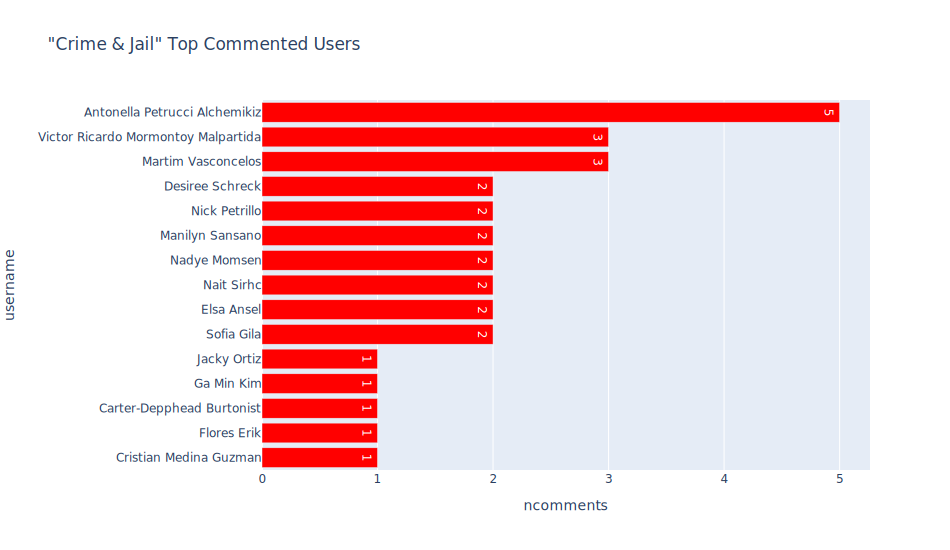

In [130]:
crime_users = df_crime.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(crime_users.head(15), '"Crime & Jail" Top Commented Users', threshold=0, c=0)

In [131]:
df_crime.username.value_counts().head()

Antonella Petrucci Alchemikiz          5
Victor Ricardo Mormontoy Malpartida    3
Martim Vasconcelos                     3
Desiree Schreck                        2
Nick Petrillo                          2
Name: username, dtype: int64

In [132]:
threat_users = threat_users | set(df_crime.username)

In [133]:
df_comments.query(" username == 'Antonella Petrucci Alchemikiz' ").comment.value_counts().head(60)

don't use children too because god will punish you very hard this time! after what you did to jonny! you don't know who jonny is! jonny is blessed by god from birth and you are a devil!                                                                                  3
dio ti punirà per quello che hai fatto! è molto pesantemente! molto! diavolo!                                                                                                                                                                                              1
tutti i demoni li vomiterò dalla mia bocca! parola di dio!                                                                                                                                                                                                                 1
scamber turd lei non sa chi è jonny .. nessuno lo sà perché non è mai stato rivelato. ma la signora ha fatto il più grave errore della sua vita! prima andrà in prigione e poi all’inferno.\r\njo

In [134]:
df_comments.query(" username == 'Victor Ricardo Mormontoy Malpartida' ").comment.value_counts().head(60)

you'll go to fooking jail stoopid modar faker biatch    1
you'll go to jail stoopid biatch! 🙊                     1
you'll fooking go to jail stoopid biatch 🤭🙊😂👊🏼          1
Name: comment, dtype: int64

In [135]:
df_comments.query(" username == 'Martim Vasconcelos' ").comment.value_counts().head(60)

good. tear her down. bring her back to the lowest level.                                                                                                                                                                                                                 2
i am not satisfied that johnny suffered due to that cow's lies.\r\n\r\nhe's so adorable, he didn't deserve it. i'm pissed.                                                                                                                                               2
amber heard.....not so pretty on the inside. oh, johnny! i wish you'd stayed away from her.                                                                                                                                                                              1
i don't think anyone is perfect ever, but this man i swear to god, is as close to perfection as there can be ( both on the inside and out )\r\ni just adore him!!!                                     

In [136]:
df_comments.query(" username == 'Manilyn Sansano' ").comment.value_counts().head(60)

#amberheardshouldbeinprison!     1
shit amber                       1
#amberheardshouldbeinprison!!    1
#psychopath!!!!                  1
Name: comment, dtype: int64

In [137]:
df_comments.query(" username == 'Elsa Ansel' ").comment.value_counts().head(60)

you need to go to jail your disgusting waste of a human life to think you can get away with the obvious lies you tell i cant even believe you have a following still    1
better close it down you won't need it in jail                                                                                                                          1
Name: comment, dtype: int64

<br>

<br>

<a id='threat_users'></a>
>>## Threat Users Contributions (All Contributions)
> <ul>
 <li><a href="#all_threat">All Threat</a></li>
 <li><a href="#kill_death">Kill & Death</a></li>
 <li><a href="#hell_burn">Hell & Burn</a></li>
 <li><a href="#crime_jail">Crime & Jail</a></li>
 <li><a href="#threat_users"><b>Threat Users Contributions</b></a></li>
 </ul>

In [138]:
len(set(df_threat.username))

582

In [139]:
threat_users_list = list(df_threat.username)
df_threat_users = df_comments.query(' username == @threat_users_list ')
print(f'{df_threat_users.shape[0]} contributions, made by {df_threat_users.username.nunique()} Users, In {df_threat_users.language.nunique()} Languages')
df_threat_users.head(2)


811 contributions, made by 582 Users, In 35 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
10,Michealie McDowell,my son's father beat me so badly while i was p...,post0_comment,NaN,NaN,NaN,NaN,True,my son's father beat me so badly while i was p...,English,my son's father beat me so badly while i was p...
15,Jacky Ortiz,i hope nothing but the worst for you johnny de...,post0_comment,NaN,NaN,NaN,NaN,True,i hope nothing but the worst for you johnny de...,English,i hope nothing but the worst for you johnny de...


In [140]:
df_threat_users.type.value_counts()

post0_comment    369
Not Recommend    100
post4_comment     89
post1_comment     72
post2_comment     70
post3_comment     61
post5_comment     50
Name: type, dtype: int64

# Languages Used in Threat Users Contributions (All Contributions)

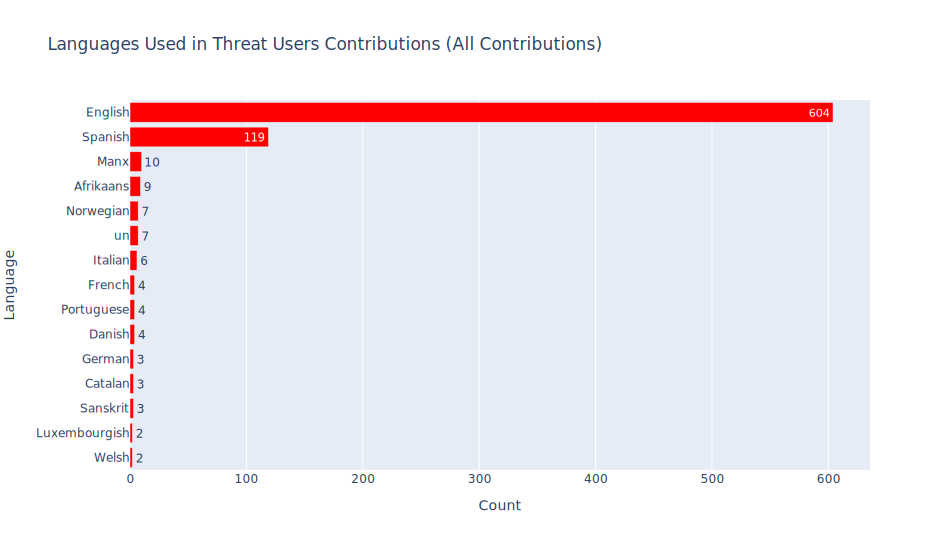

In [141]:
helpers.barh(df_threat_users.language.value_counts().to_frame().reset_index().rename(columns={'index': 'Language', 
                                                                                              'language': 'Count'}).head(15),
             'Languages Used in Threat Users Contributions (All Contributions)', threshold=0, c=0)

In [142]:
df_threat_users.language.value_counts()

English          604
Spanish          119
Manx              10
Afrikaans          9
Norwegian          7
un                 7
Italian            6
French             4
Portuguese         4
Danish             4
German             3
Catalan            3
Sanskrit           3
Luxembourgish      2
Welsh              2
Dutch              2
Chinese            2
Wolof              2
Galician           2
Shona              1
Guarani            1
Breton             1
Javanese           1
Sinhala            1
Scots              1
Maltese            1
Swahili            1
Quechua            1
Interlingue        1
Kalaallisut        1
Xhosa              1
Indonesian         1
Albanian           1
Serbian            1
Japanese           1
Name: language, dtype: int64

In [143]:
df = df_threat_users.groupby('username').agg({'comment':'count'}).reset_index(
).rename(columns={'comment':'ncomments'})

print(df.shape)
df.sort_values('ncomments', ascending=False).head(15)

(582, 2)


,username,ncomments
213,Ines Seni,19
535,TiaAnna Ann,15
454,Princess Cobain Hendrix,9
369,Martim Vasconcelos,8
368,Marthita Sosa,7
483,Samantha Elizabeth,7
42,Antonella Petrucci Alchemikiz,6
480,Sally N. Pumaleque Incalla,6
366,Maritza Lissette,5
55,Ayaris Etherea,5


In [144]:
df_comments.query(" username == 'Ines Seni' ").comment.value_counts().head(60)

amber heard admits it! johnny depp secret recording released! https://www.youtube.com/watch?v=8o4fsjkvfoc&t=142s                                                                                                                                                                                                                                                                                                        3
amber heard to johnny depp: 'i do remember, i did mean to hit you' https://www.youtube.com/watch?v=w9d6x3vadbw                                                                                                                                                                                                                                                                                                          2
regarding the poop-gate incident:\r\n1. she blames the dogs\r\n2: she tells a manager that it was a practical joke…see more                                                         

In [145]:
df_comments.query(" username == 'TiaAnna Ann' ").comment.value_counts().head(60)

i truly wish the worst for you                                                                             1
as for many other                                                                                          1
and here you are                                                                                           1
i hate you. everyone hates you.                                                                            1
cries wolf                                                                                                 1
now we’re all bad                                                                                          1
i hate you                                                                                                 1
i truly do                                                                                                 1
you make women look bad                                                                                    1
or the wrong person

In [146]:
df_comments.query(" username == 'Princess Cobain Hendrix' ").comment.value_counts().head(60)

youre mouth is bigger than your entire career!!! thats real!! youre a pathetic helpless bitch!!!!! youre mouth is bigger than your entire career!!! thats real!! youre a pathetic helpless bitch!!!!!youre mouth is bigger than your entire career!!! thats …see more    2
i wanna beat you up. too..                                                                                                                                                                                                                                               1
nobodyeee likes you!!!!!!                                                                                                                                                                                                                                                1
nobodyeee cares!!!!!!!!! fk off!!!!!!                                                                                                                                                                  

In [147]:
df_comments.query(" username == 'Martim Vasconcelos' ").comment.value_counts().head(60)

good. tear her down. bring her back to the lowest level.                                                                                                                                                                                                                 2
i am not satisfied that johnny suffered due to that cow's lies.\r\n\r\nhe's so adorable, he didn't deserve it. i'm pissed.                                                                                                                                               2
amber heard.....not so pretty on the inside. oh, johnny! i wish you'd stayed away from her.                                                                                                                                                                              1
i don't think anyone is perfect ever, but this man i swear to god, is as close to perfection as there can be ( both on the inside and out )\r\ni just adore him!!!                                     

In [148]:
df_comments.query(" username == 'Marthita Sosa' ").comment.value_counts().head(60)

#deathtoamberheard                                                                                                                                                              3
destroyed part of the life of a great actor lied and others is a reverent shame as recommend to such people .. shame and a bit of disgust that god have mercy on his soul ..    2
fuck you #deadamberheard                                                                                                                                                        1
#justiceforjohnnydepp #deathamberheard                                                                                                                                          1
Name: comment, dtype: int64

In [149]:
df_comments.query(" username == 'Samantha Elizabeth' ").comment.value_counts().head(60)

#justiceforjonnydepp                                                                                                                                                                                                                                                                                        5
man beater                                                                                                                                                                                                                                                                                                  1
i stand with johnny. you are a pathetic excuse of a woman. the lies you have told are an insult to those who have actually suffered domestic abuse. if anyone was abused its johnny by you. rot in hell amber!\r\n#justiceforjohnny\r\n#johnnydeppisinnocent\r\n#downwithamberheardslies ...\r\nsee more    1
Name: comment, dtype: int64

In [150]:
df_comments.query(" username == 'Antonella Petrucci Alchemikiz' ").comment.value_counts().head(60)

don't use children too because god will punish you very hard this time! after what you did to jonny! you don't know who jonny is! jonny is blessed by god from birth and you are a devil!                                                                                  3
dio ti punirà per quello che hai fatto! è molto pesantemente! molto! diavolo!                                                                                                                                                                                              1
tutti i demoni li vomiterò dalla mia bocca! parola di dio!                                                                                                                                                                                                                 1
scamber turd lei non sa chi è jonny .. nessuno lo sà perché non è mai stato rivelato. ma la signora ha fatto il più grave errore della sua vita! prima andrà in prigione e poi all’inferno.\r\njo

### Translation

In [151]:
df_comments.query(" username == 'Antonella Petrucci Alchemikiz' ").translated.value_counts().tail(1)

scamber turd she doesn't know who jonny is nobody knows because it was never revealed but the lady made the biggest mistake of her life! first she will go to prison and then to hell jonny and sacred !! dear Sirs!! this is the revelation !! wanted more    1
Name: translated, dtype: int64

In [152]:
df_comments.query(" username == 'Sally N. Pumaleque Incalla' ").comment.value_counts().head(60)

#justiceforjohnnydepp\r\n#johnnydeppisinnocent #johnnydeppismygrindelwald                                                                                                                                                                                                                                                                                                       2
#justiceforjohnnydepp\r\n#johnnydeppisinnocent\r\n#minamata…see more                                                                                                                                                                                                                                                                                                            1
#justiceforjohnnydepp\r\n#johnuary\r\n#johnnydeppisinnocent                                                                                                                                                                                                         

### Translation

In [153]:
df_comments.query(" username == 'Sally N. Pumaleque Incalla' ").translated.value_counts().tail(1)

#justiceforjohnnydeep this woman is a harpy, seeing the videos and recordings it is clear that she mistreated him #amberheardisanabuser no one is paying me to say this clearly she is out of her mind and how is she still normal with her work in the cinema is a bad example! with that background that she has #johnnydeppisinnocent # boycottaquaman2    1
Name: translated, dtype: int64

In [154]:
df_comments.query(" username == 'Maritza Lissette' ").comment.value_counts().head(60)

amber your going to jail for the horrible person u are. stop lying                                                                                                                                                                                                       1
btw why are u counter suing depp cause u think he hired people to hate u.? that's absurd! you did that by yourself. the truth came out. leave him alone. stop abusing please! everyone that tells u how horrible u are behaving and etc are people who see r…see more    1
amber turd!                                                                                                                                                                                                                                                              1
abuser!!!!!!!! liar!!!!                                                                                                                                                                                

In [155]:
df_comments.query(" username == 'Ayaris Etherea' ").comment.value_counts().head(60)

la violenta era ella\r\n#bizarro le corto el dedo, le quemó la cara con un cigarrillo, echo a la basura sus medicamentos, le pegó con la puerta, le tiró de todo cuanto pudo a la cabeza, lo golpeó, lo pateó, le escupió, se burló e insultó hasta el cansanci…see more    5
Name: comment, dtype: int64

### Translation

In [156]:
df_comments.query(" username == 'Ayaris Etherea' ").translated.value_counts().head(60)

she was violent #bizarro cut off his finger, burned his face with a cigarette, threw away his medications, hit him with the door, threw everything he could at his head, hit him, kicked him, spit on him , mocked and insulted until tiredsee more    5
Name: translated, dtype: int64

In [157]:
df_comments.query(" username == 'Natalia Burbano Trujillo' ").comment.value_counts().head(60)

🤢🤢🤢🤢🤢🤢                     1
mucha 🐶 hpta\r\nmuera c    1
😷🤮🤢😷😷🤢😷🤢🤮🤢😷🤢🤮🤮             1
🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮                1
u suckkkkkkkkkk 🤢🤢🤢        1
Name: comment, dtype: int64

In [158]:
df_comments.query(" username == 'Laura Pestoni' ").comment.value_counts().head(60)

she'll be in hell, where she belongs                                    1
gold digging evil ugly person                                           1
you evil, ugly witch. i hope you rot in hell                            1
skank                                                                   1
evil bitch...karma...just remember. karma is a bitch, and so are you    1
Name: comment, dtype: int64

In [159]:
df_comments.query(" username == 'Elaena Rodgers' ").comment.value_counts().head(60)

you should be in prison for domestic violence you grimy conniving ass bitch 🐍🐍🐍                          1
you need to get another nose job amber, it's getting bigger. you lying ass pinocchio looking ass hoe.    1
https://youtu.be/yhnwe1kuyce                                                                             1
you should walk outdoors more often, preferably in wuhan china.                                          1
you're a grimy lying hoe                                                                                 1
Name: comment, dtype: int64

In [160]:
df_comments.query(" username == 'NiNi Green' ").comment.value_counts().head(60)

hope you burn in hell you dirty bitch                                         1
no one wants to find you. fuck off outta here you dirty cunt                  1
wish there was a 🤢 reaction\r\nurrrrrrrrrrr. your so ugly, inside and out.    1
you’ve got ted bundy eyes. dirty psychopath.                                  1
Name: comment, dtype: int64

In [161]:
df_comments.query(" username == 'DeWet Ras' ").comment.value_counts().head(60)

why don't you just stop acting in real life as well and man up....i really hate you    1
i think i speak the truth if i say xl9se to a billion people hate you                  1
you will get what you deserve you....                                                  1
how long until we never have too see her again?                                        1
Name: comment, dtype: int64

<br>

# Most Repeated Threat Users Comments

In [162]:
df_threat_users.comment.value_counts().head(10)

#justiceforjonnydepp                                                                                                                                                                                                                                                        5
go to hell                                                                                                                                                                                                                                                                  5
la violenta era ella\r\n#bizarro le corto el dedo, le quemó la cara con un cigarrillo, echo a la basura sus medicamentos, le pegó con la puerta, le tiró de todo cuanto pudo a la cabeza, lo golpeó, lo pateó, le escupió, se burló e insultó hasta el cansanci…see more    5
die                                                                                                                                                                                           

In [163]:
# df_threat_users.comment.value_counts()[60:].head(60)

### Text Contains "not a victim" --> 6
Same repeated comments in youtube analysis

In [164]:
df_victim = df_comments[df_comments.comment.str.contains('not a victim')]
print(f'{df_victim.shape[0]} contributions, made by {df_victim.username.nunique()} Users')
df_victim[['comment', 'language','translated', 'username']]

6 contributions, made by 6 Users


,comment,language,translated,username
397,"“they won’t believe you, because you’re a man”...",English,"“they won’t believe you, because you’re a man”...",Sebastian Sanchez
422,"""they won't believe you, because you're a man....",English,"they won't believe you, because you're a man a...",Zack Dean
578,you are not a victim.,English,you are not a victim,Norman Foster Warmington
870,"“they won't believe you, because you're a man”...",English,"“they won't believe you, because you're a man”...",Lee Weaver
2896,you’re an abuser not a victim,English,you’re an abuser not a victim,Adrianna Jean
5136,plead guilty to johnny depp and the world. you...,English,plead guilty to johnny depp and the world you'...,Katya Kapitonova


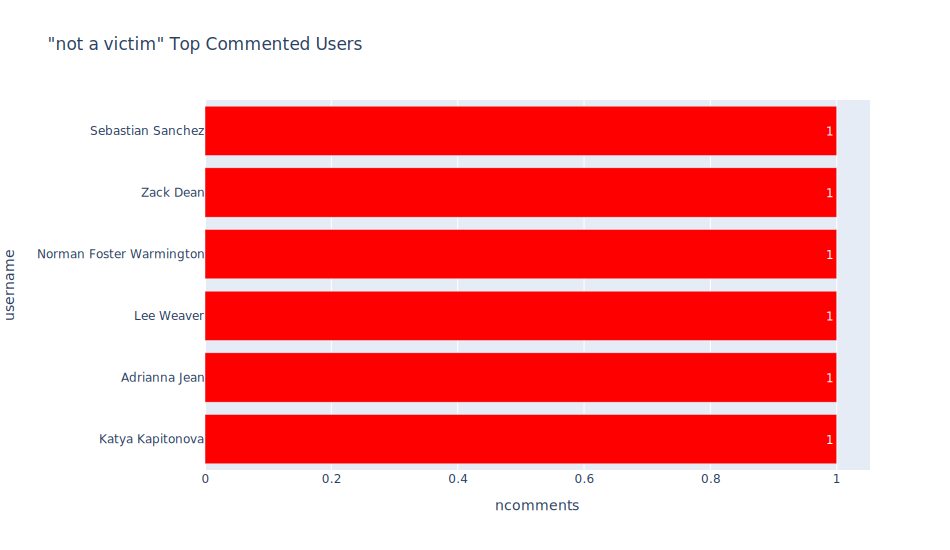

In [165]:
victim_users = df_victim.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(victim_users.head(15), '"not a victim" Top Commented Users', threshold=0, c=0)

**NOTE:** All these users only commented with "not a victim" comments!!!

<br>

# Top Users Commented with "not a victim" 

In [166]:
df_victim.username.value_counts().head()

Sebastian Sanchez           1
Zack Dean                   1
Norman Foster Warmington    1
Lee Weaver                  1
Adrianna Jean               1
Name: username, dtype: int64

In [167]:
df_comments.query(" username == 'Sebastian Sanchez' ").comment.value_counts().head()

“they won’t believe you, because you’re a man”\r\n-amber heard\r\nshe is not a victim.    1
Name: comment, dtype: int64

In [168]:
df_comments.query(" username == 'Zack Dean' ").comment.value_counts().head()

"they won't believe you, because you're a man." -amber heard\r\nshe's not a victim.    1
Name: comment, dtype: int64

In [169]:
df_comments.query(" username == 'Norman Foster Warmington' ").comment.value_counts().head()

you are not a victim.    1
Name: comment, dtype: int64

In [170]:
df_comments.query(" username == 'Lee Weaver' ").comment.value_counts().head()

“they won't believe you, because you're a man” - amber heard to johnny depp after attempting to critically injure him\r\n\r\nyou are not a victim.    1
Name: comment, dtype: int64

In [171]:
df_comments.query(" username == 'Adrianna Jean' ").comment.value_counts().head()

you’re an abuser not a victim    1
Name: comment, dtype: int64

<br>

<a id='hate_speech'></a>
>## Hate-Speech Comments
> <ul>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#hate_speech"><b>Hate-Speech Comments</b></a></li>
 <li><a href="#primarly">Primarly Text Investigations</a></li>
 </ul>

In [172]:
# To Load the dictionary of negative text    
with open('./cleaned_data/negative_text.pkl', 'rb') as f:
    neg_dict = pickle.load(f) 
    neg_text = set(neg_dict.keys())

In [173]:
neg_text = neg_text | {'narcissist', 'cancelamber', 'cancel amber', 'amber sucks', 'hate amber heard', 'scamber', 
                       'boycott amber', 'amber heard sucks', "i remind that amber heard craped on jonny depp's bed",
                       'amber heard is trash', 'deleteamber', 'delete amber', 'amber heard is a monster'}

In [174]:
# all_threat = {'burn', 'crime', 'criminal', 'dead', 'death', 'deserve', 'die', 'hell''inferno', 'infierno', 'jail',
#               'karma', 'kill', 'kys', 'matar', 'morir', 'morire', 'muere', 'muerete', 'muerta', 'muerte', 'murder',
#               'pagar', 'pay', 'prigione', 'prisión', 'prison', 'punish', 'ад', '死ね'}

In [175]:
hate_speech = {'victim', 'fuck', 'ambich', 'abuser', 'liar', 'jail', 'prison', 'deserve', 'digger',
               'bullies', 'bitch', 'crazy', 'psycho', 'not a victim', 'lies', 'turd', 'whitch'}

In [176]:
'whitch' in neg_text

False

In [177]:
neg_text = neg_text | all_threat | hate_speech

In [178]:
len(neg_text)

167

In [179]:
neg_text

{' death',
 ' death ',
 ' raped',
 '#fuckamberheard',
 '50 million',
 '7 million',
 '@amberheard fuck you',
 'abus',
 'abuse',
 'abuser',
 'abusing',
 'aggressive',
 'aggressively pull',
 'alcoholic',
 'amber abus',
 'amber heard abus',
 'amber heard is a monster',
 'amber heard is trash',
 'amber heard sucks',
 'amber lunge',
 'amber sucks',
 'amber turd',
 'amber-heard-abus',
 'amberheardisaliar',
 'amberheardisanabuser',
 'amberheardisanabuserandliar',
 'amberisanabuser',
 'ambertheabuser',
 'amberturd',
 'ambich',
 'assault',
 'assaulted johnny',
 'beaten',
 'beaten up',
 'because she is a woman',
 'because she’s a woman',
 'bitch',
 'boycott amber',
 'boycottamber',
 'boycottamberheard',
 'bullies',
 'bullshit',
 'burn',
 'burn in hell',
 'burninhell',
 'cancel amber',
 'cancelamber',
 'change.org',
 'clawing',
 'clown',
 'crazy',
 'crime',
 'criminal',
 'cunt',
 'dead',
 'death',
 'death to amber',
 'deathtoamber',
 'delete amber',
 'deleteamber',
 'deserve',
 'deserves it',
 'di

In [180]:
df_hate1 = df_comments[df_comments.comment.str.contains('|'.join(neg_text))]
df_hate2 = df_comments[df_comments.translated.str.contains('|'.join(neg_text))]
df_hate = df_hate1.append(df_hate2)
df_hate.drop_duplicates(inplace=True)

In [181]:
print(f'{df_hate.shape[0]} contributions, made by {df_hate.username.nunique()} Users, In {df_hate.language.nunique()} Languages')
df_hate.head(2)

2244 contributions, made by 1999 Users, In 56 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
3,William Mcneillie,😂 what's next in your game plan? blame arthur ...,post0_comment,NaN,NaN,NaN,NaN,True,what's next in your game plan? blame arthur c...,English,what's next in your game plan? blame arthur c...
5,Joy Bonassoli,i think you should apologize!\r\nyou tried to ...,post0_comment,NaN,NaN,NaN,NaN,True,i think you should apologize! you tried to des...,English,i think you should apologize! you tried to des...


# Hate-Speech Comments In Languages Other Than English

In [182]:
df_hate_others = df_hate[df_hate.language != 'English']
print(f'{df_hate_others.shape[0]} contributions, made by {df_hate_others.username.nunique()} Users, In {df_hate_others.language.nunique()} Languages')
df_hate_others.head(2)

559 contributions, made by 518 Users, In 55 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
120,Mishel Judit Quisocala Condori,"aquí desde perú nadie te quiere volver a ver, ...",post0_comment,NaN,NaN,NaN,NaN,True,"aquí desde perú nadie te quiere volver a ver, ...",Spanish,"here from peru no one wants to see you again, ..."
156,Nayd Tania Blanco Quispe,tarde o temprano llegará la hora de pagar todo...,post0_comment,NaN,NaN,NaN,NaN,True,tarde o temprano llegará la hora de pagar todo...,Spanish,Sooner or later the time will come to pay for ...


In [183]:
df_hate.language.value_counts()

English              1685
Spanish               311
un                     62
Portuguese             24
Danish                 12
Manx                   12
German                  9
Afrikaans               9
Maltese                 8
Indonesian              8
French                  6
Latin                   6
Welsh                   6
Italian                 6
Interlingue             6
Wolof                   5
Sinhala                 4
Sanskrit                4
Dutch                   4
Galician                4
Norwegian               3
Basque                  3
Swahili                 3
Breton                  3
Catalan                 3
Chinese                 2
Czech                   2
Luxembourgish           2
Russian                 2
Norwegian Nynorsk       2
Quechua                 2
Uzbek                   2
Aymara                  1
zzp                     1
Vietnamese              1
Slovak                  1
Kalaallisut             1
Shona                   1
Turkish     

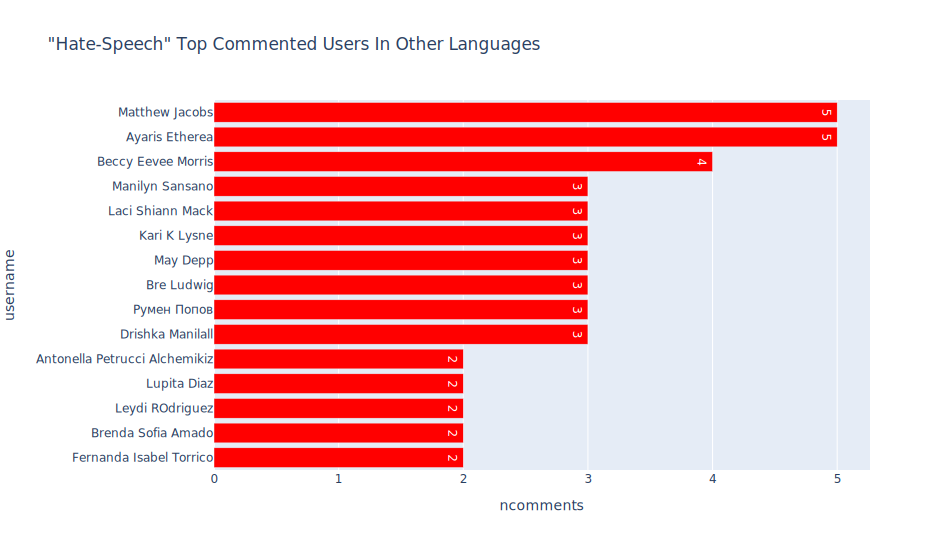

In [184]:
hate_others_users = df_hate_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(hate_others_users.head(15), '"Hate-Speech" Top Commented Users In Other Languages', threshold=0, c=0)

In [185]:
df = df_hate_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,"aquí desde perú nadie te quiere volver a ver, te queremos ver destruida así como destruirse a nuestro gran capitán",Spanish,"here from peru no one wants to see you again, we want to see you destroyed as well as destroy our great captain",Mishel Judit Quisocala Condori
1,tarde o temprano llegará la hora de pagar todo el mal que uno hace..!!,Spanish,Sooner or later the time will come to pay for all the evil that one does!,Nayd Tania Blanco Quispe
2,"das angebliche beweisfoto ist einfach lächerlich !!!\r\njeder der einen harten tag hinter sich hat, könnte quasi so fotografiert werden,ich würde mich mit wahrhafter größe mit jonny d. einigen und zeigen das ich karakter im leib hab und nicht wie eine beleidigte im zickenstall aufführen,wie im kindergarten,oh sorry die haben mehr kribs",German,"the alleged proof photo is just ridiculous! anyone who has had a hard day could be photographed like that, i would agree with jonny d on true greatness and show that i have character in my body and not act like an offended girl in a bitch shed, like in kindergarten, oh sorry they have more crabs",Katharina Schäfer
3,#justiceforjohnnydepp\r\nno a la violencia hacia a los hombres no por que es mujer no será castigada por violenta y abusiva ella estuvo a restada por golpiar a su ex pareja y hermana la única culpable de ejercer violencia es amber nada más johnny es inoc…see more,Spanish,#justiceforjohnnydepp no ​​to violence towards men not because she is a woman she will not be punished for being violent and abusive she was subtracted for beating her ex-partner and sister the only one to blame for exercising violence is amber nothing else johnny is inocsee more,Kryztina Martinez
4,"yo no soy fan de johnny depp pero, no estoy de acuerdo en que sigan en la película aquaman, eres violenta y usas que existe el movimiento feminista a tu favor, eso no está padre.",Spanish,"I am not a fan of johnny depp but, I do not agree that they continue in the movie aquaman, you are violent and you use that the feminist movement exists in your favor, that is not cool",Jany CN
5,es en serio q hay gente tan estupida para seguir a esta mujer no sabia quien era hasta q la vi en aquaman y cualquiera puede interpretar ese papel pero johnny depp es unico,Spanish,it's serious that there are people so stupid to follow this woman I didn't know who she was until I saw her in aquaman and anyone can play that role but johnny depp is unique,Kc Anderson
6,aunque no te gusta y no quieras johnny depp va estar aun mucho mejor sin ti y no creas que te saliste con la tuya bitch,Spanish,even if you don't like it and don't want to johnny depp it will be even better without you and don't think you got away with it bitch,Madeleinne Palacios
7,no hay palabras que mejor te describan que doble cara....\r\njusgaste a ser voz de las victimas y eras una de los y la muchas que maltrataban...\r\nascooooo de persona,Spanish,there are no words that best describe you that double face you judged to be the voice of the victims and you were one of the many who mistreated disgusting people,Maria Jaime Perez
8,"a mí nadie me ha pagado para firmar por su despido, yo lo hago gratis.",Spanish,"nobody has paid me to sign for their dismissal, I do it for free",Martinez Nana
9,tu y la panini deben de irse agarraditas dela mano al infierno son tal para cual hjsdp,Spanish,you and the panini must go hand in hand to hell they are such for which hjsdp,Abby's Burgers


# Most Repeated Hate-Speech Comments

In [186]:
df_hate.comment.value_counts().head(20)

fuck you                                                                                                                                                                                                                                                                    14
abuser                                                                                                                                                                                                                                                                      12
fuck you amber                                                                                                                                                                                                                                                               8
#fuckamberheard                                                                                                                                                                            

In [187]:
df = df_hate[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,😂 what's next in your game plan? blame arthur curry for slapping you with a fish across your face?\r\ni've been abused for 14 yrs of my childhood life by my biological mother and yet i didn't turn out like her. i've learned how to help other's and try to …see more,English,what's next in your game plan? blame arthur curry for slapping you with a fish across your face? i've been abused for 14 yrs of my childhood life by my biological mother and yet i didn't turn out like her i've learned how to help other's and try to see more,William Mcneillie
1,"i think you should apologize!\r\nyou tried to destroy a person and made fun of thousands, maybe millions of people who are the victims.",English,"i think you should apologize! you tried to destroy a person and made fun of thousands, maybe millions of people who are the victims",Joy Bonassoli
2,"it's hard enough for an abused person to come forward.... and one of the fears is not being believed, and the unforseen aftermath that comes after.\r\n\r\nfalsely accusing someone of being abusive just makes it the more harder for anyone else to come forward…see more",English,"it's hard enough for an abused person to come forward and one of the fears is not being believed, and the unforseen aftermath that comes after falsely accusing someone of being abusive just makes it the more harder for anyone else to come forwardsee more",Cesca Emilia
3,my son's father beat me so badly while i was pregnant he almost killed my child and myself. i'm listening to you berate him and tell at him and cuss at him on these tapes. he can't even get a word in. you should have been thankful he always walked away…see more,English,my son's father beat me so badly while i was pregnant he almost killed my child and myself i'm listening to you berate him and tell at him and cuss at him on these tapes he can't even get a word in you should have been thankful he always walked awaysee more,Michealie McDowell
4,i hope nothing but the worst for you johnny depp is my idol since my childhood he deserves nothing but they best he’s the most beautiful and handsome actor on earth to me💕💕 love you johnny,English,i hope nothing but the worst for you johnny depp is my idol since my childhood he deserves nothing but they best he’s the most beautiful and handsome actor on earth to me love you johnny,Jacky Ortiz
5,she owes the #metoo movement an apology. she put herself out there as a survivor of domestic abuse. she even spoke at a rally last week. she needs alot of medication. she needs to come clean about the situation and let this man live his best life. i …see more,English,she owes the #metoo movement an apology she put herself out there as a survivor of domestic abuse she even spoke at a rally last week she needs alot of medication she needs to come clean about the situation and let this man live his best life i see more,Alexis Conley
6,"jonny depp was labeled as a woman abuser. he was fired from a lucrative franchise, lost millions and had his reputation damaged beyond measure.\r\nlistening to the audio that’s been recently released, clearly shows that amber herd was the violent one from…see more",English,"jonny depp was labeled as a woman abuser he was fired from a lucrative franchise, lost millions and had his reputation damaged beyond measure listening to the audio that’s been recently released, clearly shows that amber herd was the violent one fromsee more",Liam Heatley
7,serial domestic abuser warning!!!!!,English,serial domestic abuser warning!!!!!,Kailey Farrell
8,have always been a fan of johnny depp despite his issues. amber heard however always left a sour taste in my mouth. she is the classic example of a narcissist. they will engage in the behavior then point the finger and blame the other. sad. sad indeed that johnny fell victim to this. the truth always comes out. always.,English,have always been a fan of johnny depp despite his issues amber heard however always left a sour taste

In [188]:
df = df_hate[['comment', 'language','translated', 'username']][60:].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,"for people like you the world is doomed, there are women who really suffer!!! hopefully johnny gets justice and you get fired",English,"for people like you the world is doomed, there are women who really suffer!!! hopefully johnny gets justice and you get fired",Bruno Dom
1,the funny thing is i had similar past relationships where women where constantly abusing me while i took it and when i left they played the victim to make everyone around me look at me different. women are doing things like this more and more. yet no one believes men can be abused.,English,the funny thing is i had similar past relationships where women where constantly abusing me while i took it and when i left they played the victim to make everyone around me look at me different women are doing things like this more and more yet no one believes men can be abused,Ervin Gabriel Santiago Melendez
2,"you shouldn't have any social media, ambitch. you just haven't life now. you will never win with johnny and deppheads! we don't want to know you.",English,"you shouldn't have any social media, ambitch you just haven't life now you will never win with johnny and deppheads! we don't want to know you",Aniela Dymecka
3,i mean i think instead of reading your brainless tweets all of us would like to hear an apology to the actual survivors of domestic abuse and jonny himself. the shit that you pulled is the worst. i didn’t think anyone could stoop that low. i’m glad you’re getting what you deserve and don’t think for a minute that you don’t deserve it because it’s your karma.,English,i mean i think instead of reading your brainless tweets all of us would like to hear an apology to the actual survivors of domestic abuse and jonny himself the shit that you pulled is the worst i didn’t think anyone could stoop that low i’m glad you’re getting what you deserve and don’t think for a minute that you don’t deserve it because it’s your karma,Tailor Gokey
4,"just know you don't represent abused women at all. i don't need to insult you, it's not worth my time but i do hope justice is made for jd. 😊",English,"just know you don't represent abused women at all i don't need to insult you, it's not worth my time but i do hope justice is made for jd",Geazul Gutierrez
5,i've read every comment on amber and i know you hate her ( i don't hate her but i don't like her) but she deserves a touch of redemption. she deserves prison ( of course) but i believe there is a ( very) small chance of rehabilitation like every person in the world.,English,i've read every comment on amber and i know you hate her i don't hate her but i don't like her but she deserves a touch of redemption she deserves prison of course but i believe there is a very small chance of rehabilitation like every person in the world,Hedrian Campbell
6,i hope u burn in hell for hijacking platform of domestic abuse for real victims!😡 there are many out there who need help but definitely not u!,English,i hope u burn in hell for hijacking platform of domestic abuse for real victims! there are many out there who need help but definitely not u!,Esther Chong
7,it was so obvious she lied at the time of each incident. she's one of those crazy females. i hope she gets what's coming.,English,it was so obvious she lied at the time of each incident she's one of those crazy females i hope she gets what's coming,Yayo Will
8,you make a mockery of real abuse victims and i think that might be the most disgusting thing of all. poor johny.,English,you make a mockery of real abuse victims and i think that might be the most disgusting thing of all poor johny,Anna Katherine Fuertsch
9,what you did only hurt women who are actual victims of domestic abuse. shame on you #mentoo,English,what you did only hurt women who are actual victims of domestic abuse shame on you #mentoo,Genaro Parra


# Top Users Commented with Hate-Speech keywords

In [189]:
df_hate.username.value_counts().head(10)

Ines Seni                        7
Amy Rossetti                     7
Vittoria Tagliaferri             6
Matthew Jacobs                   5
Antonella Petrucci Alchemikiz    5
Marthita Sosa                    5
Ayaris Etherea                   5
Piotr Kwiat Kwiatkiewicz         4
フラットセ ンパイ                        4
Manilyn Sansano                  4
Name: username, dtype: int64

In [190]:
df_comments.query(" username == 'Ines Seni' ").comment.value_counts().head(60)

amber heard admits it! johnny depp secret recording released! https://www.youtube.com/watch?v=8o4fsjkvfoc&t=142s                                                                                                                                                                                                                                                                                                        3
amber heard to johnny depp: 'i do remember, i did mean to hit you' https://www.youtube.com/watch?v=w9d6x3vadbw                                                                                                                                                                                                                                                                                                          2
regarding the poop-gate incident:\r\n1. she blames the dogs\r\n2: she tells a manager that it was a practical joke…see more                                                         

In [191]:
df_comments.query(" username == 'Amy Rossetti' ").comment.value_counts().head(60)

hopefully from now on every article written about you will include your proven and admitted abuse to depp the way every article written about him in the last three years has mentioned your unproven accusations. that would be equality, right?\r\nyou're the…see more                                                                                         4
i find it maddening that a woman can accuse a man and play the victim to ruin his life, and can be arrested for assaulting another woman in 2009 and somehow still be some champion of abused women. you can't have it both ways.\r\n\r\ni wish more people looked at the court docu…see more                                                                    2
i find it maddening that a woman can accuse a man and play the victim to ruin his life, and can be arrested for assaulting another woman in 2009 and somehow still be some champion of abused women. you can't have it both ways.\r\n\r\ni wish more people looke…see more                        

In [192]:
df_comments.query(" username == 'Vittoria Tagliaferri' ").comment.value_counts().head(60)

you are completely crazy. they should lock you up in an asylum and leave you there for the rest of your miserable life😡😡💩💩    5
#fuckthesun                                                                                                                   1
#johnnydeppisinnocent\r\n#justiceforjohnny                                                                                    1
🤮🤮🤮🤮🤮                                                                                                                         1
Name: comment, dtype: int64

In [193]:
df_comments.query(" username == 'Antonella Petrucci Alchemikiz' ").comment.value_counts().head(60)

don't use children too because god will punish you very hard this time! after what you did to jonny! you don't know who jonny is! jonny is blessed by god from birth and you are a devil!                                                                                  3
dio ti punirà per quello che hai fatto! è molto pesantemente! molto! diavolo!                                                                                                                                                                                              1
tutti i demoni li vomiterò dalla mia bocca! parola di dio!                                                                                                                                                                                                                 1
scamber turd lei non sa chi è jonny .. nessuno lo sà perché non è mai stato rivelato. ma la signora ha fatto il più grave errore della sua vita! prima andrà in prigione e poi all’inferno.\r\njo

In [194]:
df_comments.query(" username == 'Matthew Jacobs' ").comment.value_counts().head(60)

#fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard\r\n#fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberhe…see more    5
Name: comment, dtype: int64

In [195]:
df_comments.query(" username == 'Ayaris Etherea' ").comment.value_counts().head(60)

la violenta era ella\r\n#bizarro le corto el dedo, le quemó la cara con un cigarrillo, echo a la basura sus medicamentos, le pegó con la puerta, le tiró de todo cuanto pudo a la cabeza, lo golpeó, lo pateó, le escupió, se burló e insultó hasta el cansanci…see more    5
Name: comment, dtype: int64

In [196]:
df_comments.query(" username == 'Piotr Kwiat Kwiatkiewicz' ").comment.value_counts().head(60)

lying whore    4
Name: comment, dtype: int64

In [197]:
df_comments.query(" username == 'Emally Markovics' ").comment.value_counts().head(60)

#fireamberheard #evenmetoosaidfuckyou #justiceforjohnny #youareanabuser    4
Name: comment, dtype: int64

In [198]:
df_comments.query(" username == 'Manilyn Sansano' ").comment.value_counts().head(60)

#amberheardshouldbeinprison!     1
shit amber                       1
#amberheardshouldbeinprison!!    1
#psychopath!!!!                  1
Name: comment, dtype: int64

<br>

<a id='fuck'></a>
>>## Text Contains "F*ck" --> 453
> <ul>
 <li><a href="#fuck"><b>F*ck</b></a></li>
 <li><a href="#Liar">Liar</a></li>
 <li><a href="#Abuser">Abuser</a></li>
 <li><a href="#bitch">B*tch</a></li>
 <li><a href="#Psycho">Psycho</a></li>
 <li><a href="#Crazy">Crazy</a></li>
 <li><a href="#Disgusting">Disgusting</a></li>
 <li><a href="#Stupid">Stupid</a></li>
 <li><a href="#Gold_Digger">Gold Digger</a></li>
 <li><a href="#Bruises">Bruises</a></li>
 </ul>

In [199]:
df_fck1 = df_comments[df_comments.translated.str.contains('fuck')]
df_fck2 = df_comments[df_comments.comment.str.contains('fuck')]
df_fck = df_fck1.append(df_fck2)
df_fck.drop_duplicates(inplace=True)

In [200]:
print(f'{df_fck.shape[0]} contributions, made by {df_fck.username.nunique()} Users, In {df_fck.language.nunique()} Languages')
df_fck.head(2)

453 contributions, made by 410 Users, In 14 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
35,Rhiannon Gallimore,fuck you amber heard,post0_comment,NaN,NaN,NaN,NaN,True,fuck you amber heard,English,fuck you amber heard
46,John Jeffries,stupid bitch fuck u and your twitter,post0_comment,NaN,NaN,NaN,NaN,True,stupid bitch fuck u and your twitter,English,stupid bitch fuck u and your twitter


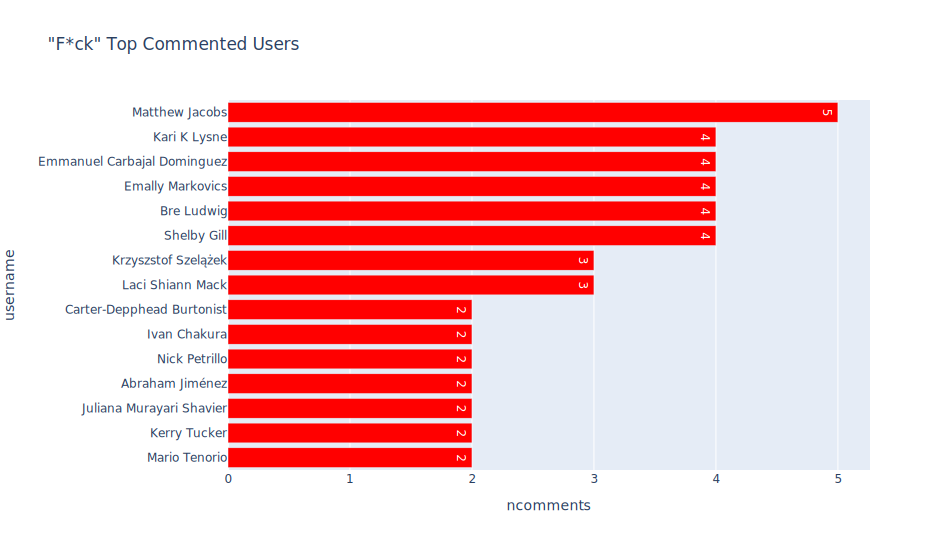

In [201]:
fck_users = df_fck.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(fck_users.head(15), '"F*ck" Top Commented Users', threshold=0, c=0)

In [202]:
df_fck.comment.value_counts().head()

fuck you                                                                                                                                                                                                                                                                    14
fuck you amber                                                                                                                                                                                                                                                               8
#fuckamberheard                                                                                                                                                                                                                                                              8
#fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard #fuckamberheard\r\n#fuckamberheard #fuckamberheard #fuckamb

In [203]:
df = df_fck[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,fuck you amber heard,English,fuck you amber heard,Rhiannon Gallimore
1,stupid bitch fuck u and your twitter,English,stupid bitch fuck u and your twitter,John Jeffries
2,"i kept my mouth shut untill now,amber you married a famous man much older than you in order to take his money away from him,you had sex for money,you know what that makes you,immigrates do get honest jobs,you are the last person on earth to judge people,you gave away the money because your conscious was so fucking dirty you could not sleep at night,you fucking loser.",English,"i kept my mouth shut untill now,amber you married a famous man much older than you in order to take his money away from him,you had sex for money,you know what that makes you,immigrates do get honest jobs,you are the last person on earth to judge people,you gave away the money because your conscious was so fucking dirty you could not sleep at night,you fucking loser",Radulescu Carmen
3,i swear that you will not do any film or series anymore. fuck you.,English,i swear that you will not do any film or series anymore fuck you,Alessandro Campaiola
4,she should be replaced by the mother of dragons in aqua-man 2. her and jason have awesome chemistry...besides if i go i’ll just be exclaiming #fuckamberheard everytime she comes on. the audio tapes are horrible to listen too. calling him fat and old. y…see more,English,she should be replaced by the mother of dragons in aquaman 2 her and jason have awesome chemistrybesides if i go i’ll just be exclaiming #fuckamberheard everytime she comes on the audio tapes are horrible to listen too calling him fat and old ysee more,Samuel Nelson
5,here’s one for you. my ex beat me up for no reason at 17 fucking tried to leave a room i didn’t even fight him say anything nothing. he was sleeping and i was leaving to give him privacy. he threw me through the wall smashed chairs into my head threw m…see more,English,here’s one for you my ex beat me up for no reason at 17 fucking tried to leave a room i didn’t even fight him say anything nothing he was sleeping and i was leaving to give him privacy he threw me through the wall smashed chairs into my head threw msee more,Chloe McCabe
6,every body should knows this amber heard is a fucking lier because she lies about things about johnny depp. i'm pretty sure she inflected those bruises on her face. she also shit in johnny depp bed. she ruined johnny depp acting career. her acting career should end not him.,English,every body should knows this amber heard is a fucking lier because she lies about things about johnny depp i'm pretty sure she inflected those bruises on her face she also shit in johnny depp bed she ruined johnny depp acting career her acting career should end not him,Sam Clingan
7,would you pleeeeaase just stop the bullshit so both of you can get on with your lives and go back to what you're both good at? making movies. we've all been through breakups amber. bad relationships. let it fucking go.,English,would you pleeeeaase just stop the bullshit so both of you can get on with your lives and go back to what you're both good at? making movies we've all been through breakups amber bad relationships let it fucking go,Tara Ash-Douglas
8,love how your still in aquaman after false accusations but johnny depp is kicked out of the new harry potter movies bc of your lies. fuck you and any platform you have to talk to your sheep.,English,love how your still in aquaman after false accusations but johnny depp is kicked out of the new harry potter movies bc of your lies fuck you and any platform you have to talk to your sheep,Kyle Wade
9,"you should be ashamed of yourself, as there are many people who do have domestic abuse. you are an abuser and you think you will win by buying the fucking judge. we have videos, audios, photos etc. for example, what about the finger, what your sister said, what your assistant said, and also that you are someone who, being committed to him, had r

# "F*ck" Comments In Languages Other Than English

In [204]:
df_fck_others = df_fck[df_fck.language != 'English']
print(f'{df_fck_others.shape[0]} contributions, made by {df_fck_others.username.nunique()} Users, In {df_fck_others.language.nunique()} Languages')
df_fck_others.head(2)


145 contributions, made by 132 Users, In 13 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
317,Lizeth Villarruel,no se como decirlo en ingles pero chinga tu ma...,post0_comment,NaN,NaN,NaN,NaN,True,no se como decirlo en ingles pero chinga tu ma...,Spanish,I don't know how to say it in English but fuck...
614,Ashanti Esquivel,chinga tu madre amber heard,post0_comment,False,False,True,False,True,chinga tu madre amber heard,Spanish,fuck your mother amber heard


In [205]:
df_fck.language.value_counts()

English              308
Spanish               68
un                    61
Maltese                4
Norwegian Nynorsk      2
Dutch                  2
Zhuang                 1
Finnish                1
Afrikaans              1
Galician               1
German                 1
Kalaallisut            1
Shona                  1
Maori                  1
Name: language, dtype: int64

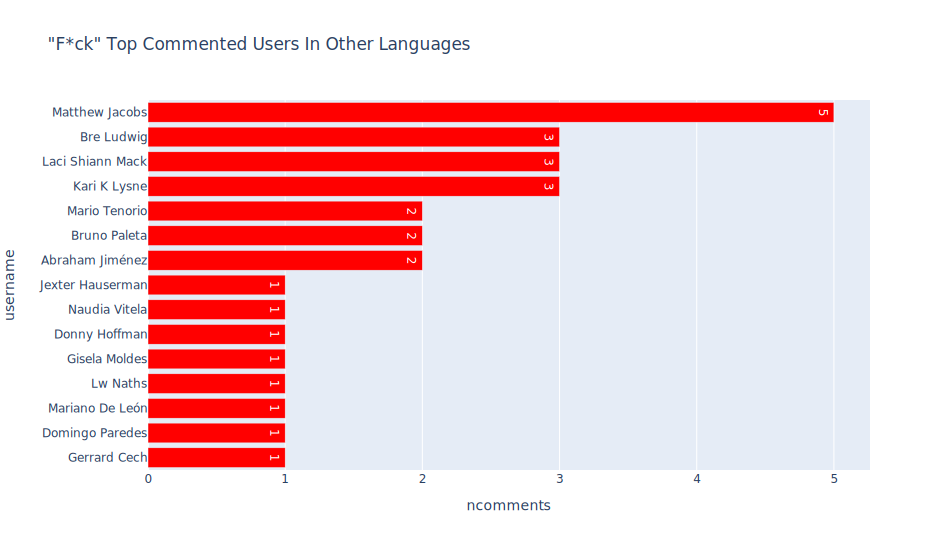

In [206]:
fck_others_users = df_fck_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(fck_others_users.head(15), '"F*ck" Top Commented Users In Other Languages', threshold=0, c=0)

In [207]:
df = df_fck_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,no se como decirlo en ingles pero chinga tu madre amber! 🖕🏻,Spanish,I don't know how to say it in English but fuck your mother Amber!,Lizeth Villarruel
1,chinga tu madre amber heard,Spanish,fuck your mother amber heard,Ashanti Esquivel
2,vete a la mierda amber !!!,Spanish,fuck you amber!!!,Sandy Galletas
3,"chinga tu madre amber,!!! 🖕",Spanish,"fuck your mother amber,!!!",Ana Belén Bautista Jurado
4,chinga tu pinche madre amber.,Norwegian Nynorsk,fuck your fucking mother amber,Ana Xanadu
5,fuck amber,un,fuck amber,Jaroslav Vobornik
6,maldita ojalá pagues todo lo que hiciste a jhonny depp. pudrete,Spanish,damn I hope you pay everything you did to jhonny depp fuck you,Gladysha Tsukino
7,chinga tu madre amber heard todos te odian!,Spanish,fuck your mother amber heard everyone hates you!,Jesus Carroz
8,#fuckamberheard,un,#fuckamberheard,Jeff Bolt
9,#istandwithjohnnydepp\r\n#fuckamberheard,un,#istandwithjohnnydepp #fuckamberheard,Amanda Powell Fleming


<br>

<a id='Liar'></a>
>>## Text Contains "Liar" --> 259
> <ul>
 <li><a href="#fuck">F*ck</a></li>
 <li><a href="#Liar"><b>Liar</b></a></li>
 <li><a href="#Abuser">Abuser</a></li>
 <li><a href="#bitch">B*tch</a></li>
 <li><a href="#Psycho">Psycho</a></li>
 <li><a href="#Crazy">Crazy</a></li>
 <li><a href="#Disgusting">Disgusting</a></li>
 <li><a href="#Stupid">Stupid</a></li>
 <li><a href="#Gold_Digger">Gold Digger</a></li>
 <li><a href="#Bruises">Bruises</a></li>
 </ul>

In [208]:
df_liar1 = df_comments[df_comments.translated.str.contains('liar|lies')]
df_liar2 = df_comments[df_comments.comment.str.contains('liar|lies')]
df_liar = df_liar1.append(df_liar2)
df_liar.drop_duplicates(inplace=True)

In [209]:
print(f'{df_liar.shape[0]} contributions, made by {df_liar.username.nunique()} Users, In {df_liar.language.nunique()} Languages')
df_fck.head(2)

259 contributions, made by 248 Users, In 13 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
35,Rhiannon Gallimore,fuck you amber heard,post0_comment,NaN,NaN,NaN,NaN,True,fuck you amber heard,English,fuck you amber heard
46,John Jeffries,stupid bitch fuck u and your twitter,post0_comment,NaN,NaN,NaN,NaN,True,stupid bitch fuck u and your twitter,English,stupid bitch fuck u and your twitter


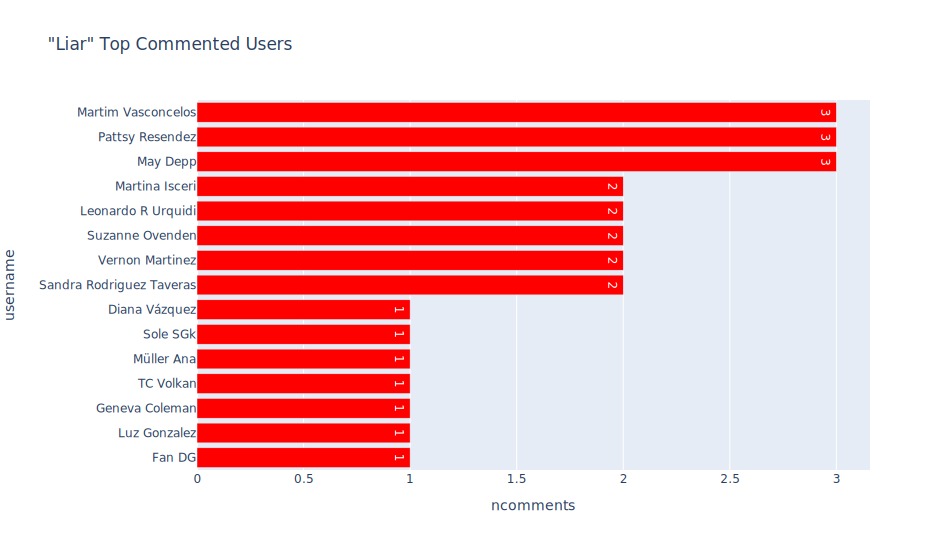

In [210]:
liar_users = df_liar.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(liar_users.head(15), '"Liar" Top Commented Users', threshold=0, c=0)

In [211]:
df_liar.comment.value_counts().head()

liar                                                                                                                                                  5
stupid, nobody believes you, you abuse because you are a woman, but sooner or later the damn truth is discovered amber, you are a liar\r\n\r\n🤬🤬🤬🤬    3
#justiceforjohnnydepp #amberheardisanabuser #amberheardisaliar                                                                                        3
....and the golden shit award for a narcissist, con-liar goes to donald tr......no! goes to amber heard!!                                             2
liar liar liar                                                                                                                                        2
Name: comment, dtype: int64

In [212]:
df = df_liar[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,"since i know neither you or mr. depp personally i can't claim that you're a liar but just know this (not that people probably haven't said this) that there are actual people who get abused everyday for real and every movie, interview, times with fans m…see more",English,"since i know neither you or mr depp personally i can't claim that you're a liar but just know this not that people probably haven't said this that there are actual people who get abused everyday for real and every movie, interview, times with fans msee more",Alex Robertson
1,"vagabond house fortunes !!!! you destroyed her career with your lies, you damaged her reputation, you are a sick woman, you still campaigned against the mistreatment of women, you made fun of women who were really mistreated. i hope you realize in time the evil you are doing and reconsider. the whole truth comes out.",English,"vagabond house fortunes !!!! you destroyed her career with your lies, you damaged her reputation, you are a sick woman, you still campaigned against the mistreatment of women, you made fun of women who were really mistreated i hope you realize in time the evil you are doing and reconsider the whole truth comes out",Naya Rodríguez Barbito
2,"amber, i doubt you are familiar with the term 'the language of your body is louder than the flowing words from your mouth'\r\ni have watched the video clips from court and you are way off the chart on so many different areas. your body language screams 'l…see more",English,"amber, i doubt you are familiar with the term 'the language of your body is louder than the flowing words from your mouth' i have watched the video clips from court and you are way off the chart on so many different areas your body language screams 'lsee more",April Istandwithjohnny Hendry Priv
3,"lies is all that comes from your mouth. one day when you need the truth to back you up, it won't be there. when this day comes i hope someone shows you some kind of mercy. because you don't have any.",English,"lies is all that comes from your mouth one day when you need the truth to back you up, it won't be there when this day comes i hope someone shows you some kind of mercy because you don't have any",Myra Ducharme
4,every body should knows this amber heard is a fucking lier because she lies about things about johnny depp. i'm pretty sure she inflected those bruises on her face. she also shit in johnny depp bed. she ruined johnny depp acting career. her acting career should end not him.,English,every body should knows this amber heard is a fucking lier because she lies about things about johnny depp i'm pretty sure she inflected those bruises on her face she also shit in johnny depp bed she ruined johnny depp acting career her acting career should end not him,Sam Clingan
5,love how your still in aquaman after false accusations but johnny depp is kicked out of the new harry potter movies bc of your lies. fuck you and any platform you have to talk to your sheep.,English,love how your still in aquaman after false accusations but johnny depp is kicked out of the new harry potter movies bc of your lies fuck you and any platform you have to talk to your sheep,Kyle Wade
6,i will never watch anything with you in it. to paint yourself as a victim when in fact you are the abuser.\r\ni’m so glad you and your sick lies have been exposed.\r\nyou’ve shit on your own pillow now 🤣,English,i will never watch anything with you in it to paint yourself as a victim when in fact you are the abuser i’m so glad you and your sick lies have been exposed you’ve shit on your own pillow now 🤣,Anna Boulden
7,"she is a hypocritical liar, how can she have so much evil in your heart, johnny is not alone several people we trust you are a crazy crazy .... johnny is the best actor in the world world, leave him alone.",English,"she is a hypocritical liar, how can she have so much evil in your heart, johnny is not alone several people we trust you are a crazy cr

# "Liar" Comments In Languages Other Than English

In [213]:
df_liar_others = df_liar[df_liar.language != 'English']
print(f'{df_liar_others.shape[0]} contributions, made by {df_liar_others.username.nunique()} Users, In {df_liar_others.language.nunique()} Languages')
df_liar_others.head(2)


75 contributions, made by 73 Users, In 12 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
494,Thiago Rhaegar,mais mentiras será contadas lá? rsrs,post0_comment,NaN,NaN,NaN,NaN,True,mais mentiras será contadas lá? rsrs,Portuguese,Will more lies be told there? haha
579,Sandra Luna,"disculpe soy boliviana y apoyo a johnny depp, ...",post0_comment,NaN,NaN,NaN,NaN,True,"disculpe soy boliviana y apoyo a johnny depp, ...",Spanish,"Excuse me, I am Bolivian and I support Johnny ..."


In [214]:
df_liar.language.value_counts()

English       184
Spanish        48
Portuguese     12
Indonesian      6
Scots           1
Faroese         1
Norwegian       1
French          1
Manx            1
Quechua         1
zzp             1
Turkish         1
German          1
Name: language, dtype: int64

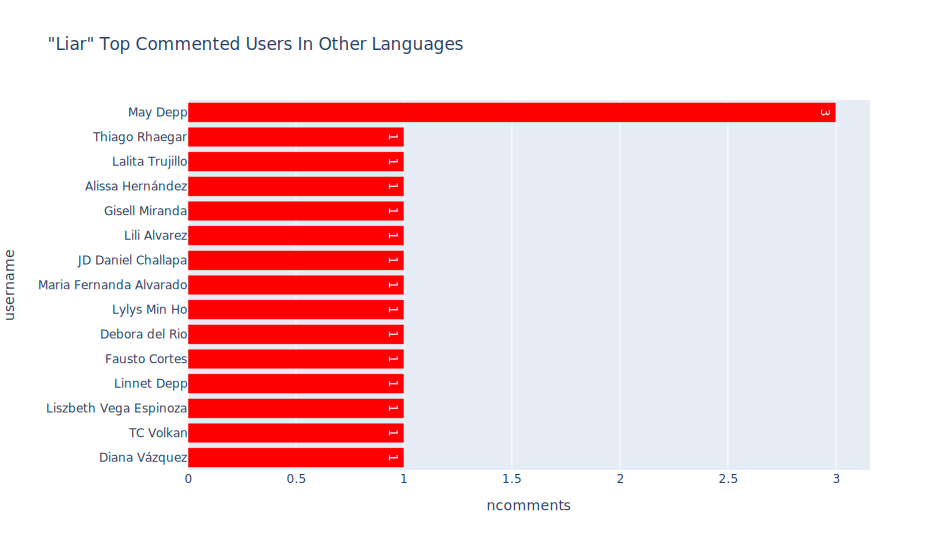

In [215]:
liar_others_users = df_liar_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(liar_others_users.head(15), '"Liar" Top Commented Users In Other Languages', threshold=0, c=0)

In [216]:
df = df_liar_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,mais mentiras será contadas lá? rsrs,Portuguese,Will more lies be told there? haha,Thiago Rhaegar
1,"disculpe soy boliviana y apoyo a johnny depp, como usted dijo que alguien pagaba nuestro apoyo a ese ángel, por favor tiene la dirección del punto de pago en la paz bolivia?? y si no sabe, deje de inventar estupideces, mentir0sa",Spanish,"Excuse me, I am Bolivian and I support Johnny Depp, as you said that someone paid our support to that angel, please do you have the address of the payment point in La Paz, Bolivia? and if you don't know, stop inventing stupid things, liar",Sandra Luna
2,calla cojuda eres una mentirosa de lo peor q existe pero recuerda tarde o temprano lo vas a pagar acuerdate,Spanish,shut up you are a liar of the worst that exists but remember sooner or later you are going to pay remember,Richard Monzon Caceres
3,justicia por jhonny depp... mentirooosa..,Scots,justice for johnny depp liar,Jhen RM
4,mentirosa!!! te vas a undir!!! aguante johnny!!!,Faroese,liar!!! you're going to sink!!! hold on johnny!!!,Damaris Capdevila
5,"no te da vergüenza estar acá, mentirosa. abusadora, eres una psicópata. estás demasiado loca, ojalá jonny te destruya la carrera así como lo intentaste con el",Spanish,"you're not ashamed to be here, abusive liar, you're a psychopath you're too crazy, I hope jonny destroys your career just like you tried with him",Cristina Porras Herrera
6,eres una mala mujer y mentirosa pero existe el karma,Spanish,you are a bad woman and a liar but there is karma,Lii Cii Jan
7,"mentirosa, abusadora, cómo puedes seguir tu vida normal sin pedir disculpas ni hacer público tú engaño?",Spanish,"liar, abuser, how can you continue your normal life without apologizing or making your deception public?",Liliana Carolina Lara
8,#justiceforjohnny #amberheardisanabuser #amberheardisaliar,Indonesian,#justiceforjohnny #amberheardisanabuser #amberheardisaliar,Violeta López Estrada
9,#justiceforjhonnydepp\r\n#amberheardisaliar,Norwegian,#justiceforjhonnydepp #amberheardisaliar,Romina A Lobos


<br>

<a id='Abuser'></a>
>>## Text Contains "Abuser" --> 422
> <ul>
 <li><a href="#fuck">F*ck</a></li>
 <li><a href="#Liar">Liar</a></li>
 <li><a href="#Abuser"><b>Abuser</b></a></li>
 <li><a href="#bitch">B*tch</a></li>
 <li><a href="#Psycho">Psycho</a></li>
 <li><a href="#Crazy">Crazy</a></li>
 <li><a href="#Disgusting">Disgusting</a></li>
 <li><a href="#Stupid">Stupid</a></li>
 <li><a href="#Gold_Digger">Gold Digger</a></li>
 <li><a href="#Bruises">Bruises</a></li>
 </ul>

In [217]:
df_abuser1 = df_comments[df_comments.translated.str.contains('abuser|abuse')]
df_abuser2 = df_comments[df_comments.comment.str.contains('abuser|abuse')]
df_abuser = df_abuser1.append(df_abuser2)
df_abuser.drop_duplicates(inplace=True)

In [218]:
print(f'{df_abuser.shape[0]} contributions, made by {df_abuser.username.nunique()} Users, In {df_abuser.language.nunique()} Languages')
df_fck.head(2)

422 contributions, made by 375 Users, In 14 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
35,Rhiannon Gallimore,fuck you amber heard,post0_comment,NaN,NaN,NaN,NaN,True,fuck you amber heard,English,fuck you amber heard
46,John Jeffries,stupid bitch fuck u and your twitter,post0_comment,NaN,NaN,NaN,NaN,True,stupid bitch fuck u and your twitter,English,stupid bitch fuck u and your twitter


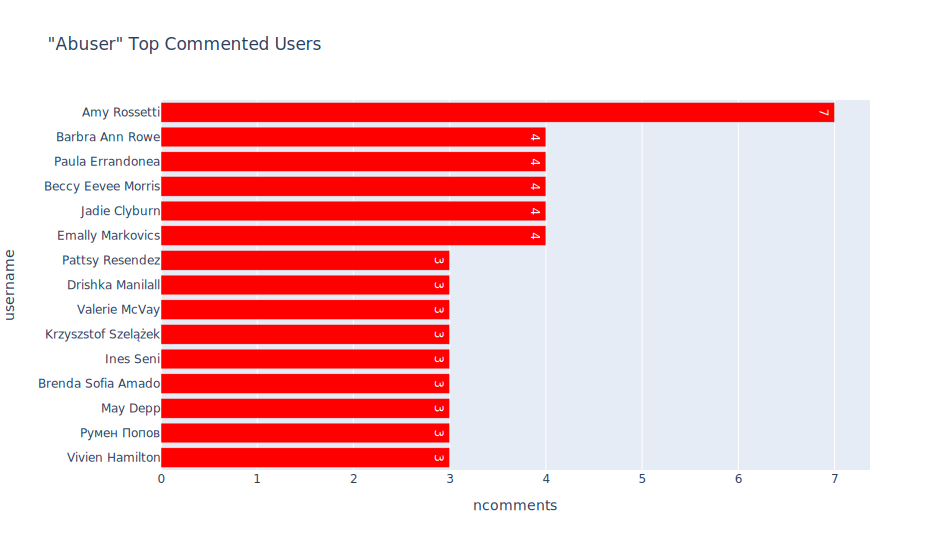

In [219]:
abuser_users = df_abuser.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(abuser_users.head(15), '"Abuser" Top Commented Users', threshold=0, c=0)

In [220]:
df_abuser.comment.value_counts().head()

abuser                                                                                                                                                                                                                                                                      12
#amberheardisanabuser                                                                                                                                                                                                                                                        6
#justiceforjohnnydepp\r\n#notophysicalabuse\r\nwarning: disturbing graphics ⚠️…see more                                                                                                                                                                                      4
#fireamberheard #evenmetoosaidfuckyou #justiceforjohnny #youareanabuser                                                                                                                    

In [221]:
df = df_abuser[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,😂 what's next in your game plan? blame arthur curry for slapping you with a fish across your face?\r\ni've been abused for 14 yrs of my childhood life by my biological mother and yet i didn't turn out like her. i've learned how to help other's and try to …see more,English,what's next in your game plan? blame arthur curry for slapping you with a fish across your face? i've been abused for 14 yrs of my childhood life by my biological mother and yet i didn't turn out like her i've learned how to help other's and try to see more,William Mcneillie
1,"it's hard enough for an abused person to come forward.... and one of the fears is not being believed, and the unforseen aftermath that comes after.\r\n\r\nfalsely accusing someone of being abusive just makes it the more harder for anyone else to come forward…see more",English,"it's hard enough for an abused person to come forward and one of the fears is not being believed, and the unforseen aftermath that comes after falsely accusing someone of being abusive just makes it the more harder for anyone else to come forwardsee more",Cesca Emilia
2,she owes the #metoo movement an apology. she put herself out there as a survivor of domestic abuse. she even spoke at a rally last week. she needs alot of medication. she needs to come clean about the situation and let this man live his best life. i …see more,English,she owes the #metoo movement an apology she put herself out there as a survivor of domestic abuse she even spoke at a rally last week she needs alot of medication she needs to come clean about the situation and let this man live his best life i see more,Alexis Conley
3,"jonny depp was labeled as a woman abuser. he was fired from a lucrative franchise, lost millions and had his reputation damaged beyond measure.\r\nlistening to the audio that’s been recently released, clearly shows that amber herd was the violent one from…see more",English,"jonny depp was labeled as a woman abuser he was fired from a lucrative franchise, lost millions and had his reputation damaged beyond measure listening to the audio that’s been recently released, clearly shows that amber herd was the violent one fromsee more",Liam Heatley
4,serial domestic abuser warning!!!!!,English,serial domestic abuser warning!!!!!,Kailey Farrell
5,"appaling the level of trolling this woman has to suffer. this is how society reacts in most cases, by acusing her of lying and by undermining her. you don’t believe her? i don’t get it as there is a video where you can see the way he behave with her. stop the abuse. shame on you. #ibelieveyouamber",English,"appaling the level of trolling this woman has to suffer this is how society reacts in most cases, by acusing her of lying and by undermining her you don’t believe her? i don’t get it as there is a video where you can see the way he behave with her stop the abuse shame on you #ibelieveyouamber",Pilar Narvaez
6,"i find it maddening that a woman can accuse a man and play the victim to ruin his life, and can be arrested for assaulting another woman in 2009 and somehow still be some champion of abused women. you can't have it both ways.\r\n\r\ni wish more people looke…see more",English,"i find it maddening that a woman can accuse a man and play the victim to ruin his life, and can be arrested for assaulting another woman in 2009 and somehow still be some champion of abused women you can't have it both ways i wish more people lookesee more",Amy Rossetti
7,amber heard name will be known forever as a disgrace for abused women. shame on you!,English,amber heard name will be known forever as a disgrace for abused women shame on you!,Kate Vernile
8,it’s really sad that you’ve hijacked the platform of domestic abuse from real victims for your self serving purposes. what makes it even more disgusting is that you’re actually an abuser. no shame.,English,it’s really sad that you’ve hijacked the platform of domestic abuse from real victims for your self ser

# "Abuser" Comments In Languages Other Than English

In [222]:
df_abuser_others = df_abuser[df_abuser.language != 'English']
print(f'{df_abuser_others.shape[0]} contributions, made by {df_abuser_others.username.nunique()} Users, In {df_abuser_others.language.nunique()} Languages')
df_abuser_others.head(2)


59 contributions, made by 48 Users, In 13 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
605,Lesly Ortiz Cuadros,la repudio tanto como a merino!!! simple ... n...,post0_comment,NaN,NaN,NaN,NaN,True,la repudio tanto como a merino!!! simple no se...,Spanish,I repudiate her as much as merino!!! You simpl...
650,Nikky Mena,"abusadora, quieres manchar a un gran hombre pe...",post0_comment,NaN,NaN,NaN,NaN,True,"abusadora, quieres manchar a un gran hombre pe...",Spanish,"abuser, you want to stain a great man but you ..."


In [223]:
df_abuser.language.value_counts()

English       363
Spanish        23
Welsh           6
Danish          6
Indonesian      5
Manx            5
un              3
Maltese         3
German          2
Portuguese      2
Bislama         1
Cebuano         1
French          1
Estonian        1
Name: language, dtype: int64

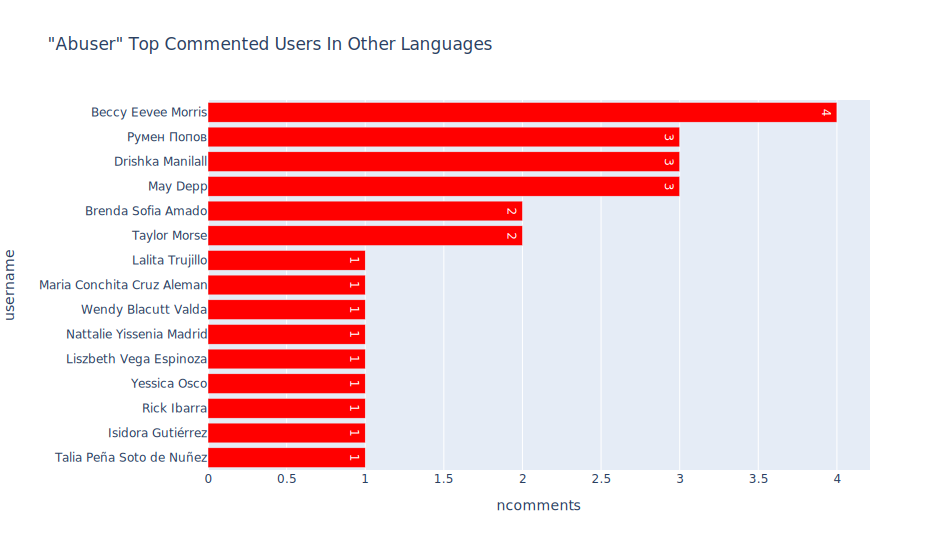

In [224]:
abuser_others_users = df_abuser_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(abuser_others_users.head(15), '"Abuser" Top Commented Users In Other Languages', threshold=0, c=0)

In [225]:
df = df_abuser_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,la repudio tanto como a merino!!! simple ... no se puede abusar de su condición de mujer para victimizarse,Spanish,I repudiate her as much as merino!!! You simply cannot abuse your status as a woman to victimize yourself,Lesly Ortiz Cuadros
1,"abusadora, quieres manchar a un gran hombre pero sabes algo el tiene muchos fans que lo apoyan más que a ti... así como se inició una petición para no tenerte en aquaman 2 se puede hacer otra para limpiar el nombre de un gran hombre como johnny depp que en mala hora se topó contigo 😡😡😡😡😡😡😡",Spanish,"abuser, you want to stain a great man but you know something he has many fans who support him more than you just as a petition was started not to have you in aquaman 2 another can be made to clear the name of a great man like johnny depp who in bad time he ran into you",Nikky Mena
2,eres una agresora y eso ya lo sabe el mundo... ahora exigimos justicia por depp y no nos cansaremos de pedirlo... #justiceforjohnnydepp.\r\n#amberheardtheabuser...,Spanish,you are an aggressor and the world already knows that now we demand justice for depp and we won't get tired of asking for it #justiceforjohnnydepp #amberheardtheabuser,Brenda Sofia Amado
3,"mentirosa, abusadora, cómo puedes seguir tu vida normal sin pedir disculpas ni hacer público tú engaño?",Spanish,"liar, abuser, how can you continue your normal life without apologizing or making your deception public?",Liliana Carolina Lara
4,#justiceforjohnny #amberheardisanabuser #amberheardisaliar,Indonesian,#justiceforjohnny #amberheardisanabuser #amberheardisaliar,Violeta López Estrada
5,#amberheardisanabuser,Welsh,#amberheardisanabuser,Drishka Manilall
6,disgusting abuser. rot.,Bislama,disgusting abuser rot,Mia Contreras
7,#justiceforjohnnydepp #amberheardisanabuser #amberheardisaliar,Indonesian,#justiceforjohnnydepp #amberheardisanabuser #amberheardisaliar,May Depp
8,#boycottamberheard #amberheardisabuser,Cebuano,#boycottamberheard #amberheardisabuser,Jem Anastacio
9,#istandwithjohnnydepp #justiceforjohnnydeep #amberheardisanabuser #poorbloke #amberheardbeatsonmen #vilewoman\r\n#justiceforjohnny\r\n#justicefordepp,Danish,#istandwithjohnnydepp #justiceforjohnnydeep #amberheardisanabuser #poorbloke #amberheardbeatsonmen #vilewoman #justiceforjohnny #justicefordepp,Beccy Eevee Morris


<br>

<a id='bitch'></a>
>>## Text Contains "B*tch" --> 262
> <ul>
 <li><a href="#fuck">F*ck</a></li>
 <li><a href="#Liar">Liar</a></li>
 <li><a href="#Abuser">Abuser</a></li>
 <li><a href="#bitch"><b>B*tch</b></a></li>
 <li><a href="#Psycho">Psycho</a></li>
 <li><a href="#Crazy">Crazy</a></li>
 <li><a href="#Disgusting">Disgusting</a></li>
 <li><a href="#Stupid">Stupid</a></li>
 <li><a href="#Gold_Digger">Gold Digger</a></li>
 <li><a href="#Bruises">Bruises</a></li>
 </ul>

In [226]:
df_bitch1 = df_comments[df_comments.translated.str.contains('bitch')]
df_bitch2 = df_comments[df_comments.comment.str.contains('bitch')]
df_bitch = df_bitch1.append(df_bitch2)
df_bitch.drop_duplicates(inplace=True)

In [227]:
print(f'{df_bitch.shape[0]} contributions, made by {df_bitch.username.nunique()} Users, In {df_bitch.language.nunique()} Languages')
df_bitch.head(2)

262 contributions, made by 246 Users, In 16 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
46,John Jeffries,stupid bitch fuck u and your twitter,post0_comment,NaN,NaN,NaN,NaN,True,stupid bitch fuck u and your twitter,English,stupid bitch fuck u and your twitter
133,Aniela Dymecka,"you shouldn't have any social media, ambitch. ...",post0_comment,NaN,NaN,NaN,NaN,True,"you shouldn't have any social media, ambitch y...",English,"you shouldn't have any social media, ambitch y..."


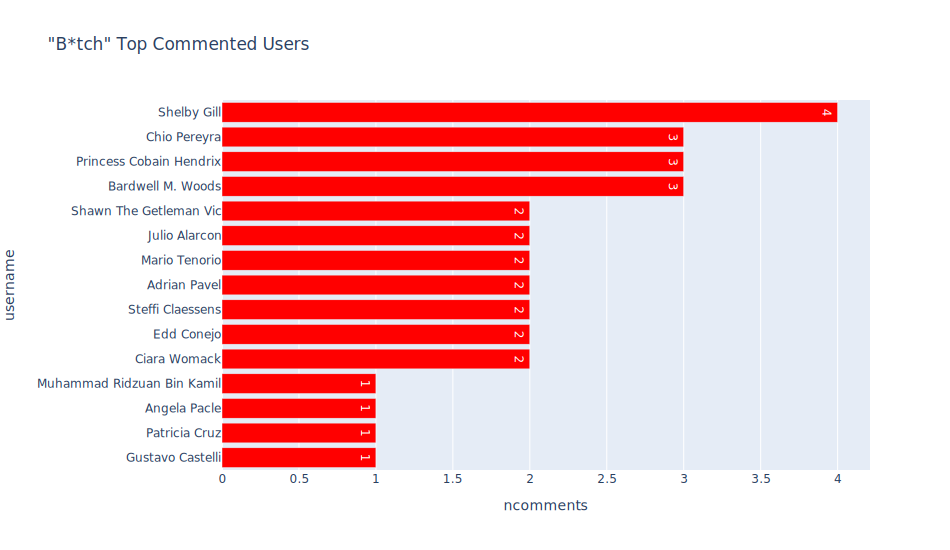

In [228]:
bitch_users = df_bitch.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(bitch_users.head(15), '"B*tch" Top Commented Users', threshold=0, c=0)

In [229]:
df_bitch.comment.value_counts().head()

bitch                                                            8
fuck you bitch                                                   5
perra                                                            5
bitch.                                                           4
fuck (and i cannot stress this enough) that bitch amber heard    4
Name: comment, dtype: int64

In [230]:
df = df_bitch[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,stupid bitch fuck u and your twitter,English,stupid bitch fuck u and your twitter,John Jeffries
1,"you shouldn't have any social media, ambitch. you just haven't life now. you will never win with johnny and deppheads! we don't want to know you.",English,"you shouldn't have any social media, ambitch you just haven't life now you will never win with johnny and deppheads! we don't want to know you",Aniela Dymecka
2,wow.. what a gold digging bitch. that is so fucked up what you are doing to johnny. i hope something horrible happens to you.,English,wow what a gold digging bitch that is so fucked up what you are doing to johnny i hope something horrible happens to you,George Barone
3,"das angebliche beweisfoto ist einfach lächerlich !!!\r\njeder der einen harten tag hinter sich hat, könnte quasi so fotografiert werden,ich würde mich mit wahrhafter größe mit jonny d. einigen und zeigen das ich karakter im leib hab und nicht wie eine beleidigte im zickenstall aufführen,wie im kindergarten,oh sorry die haben mehr kribs",German,"the alleged proof photo is just ridiculous! anyone who has had a hard day could be photographed like that, i would agree with jonny d on true greatness and show that i have character in my body and not act like an offended girl in a bitch shed, like in kindergarten, oh sorry they have more crabs",Katharina Schäfer
4,aunque no te gusta y no quieras johnny depp va estar aun mucho mejor sin ti y no creas que te saliste con la tuya bitch,Spanish,even if you don't like it and don't want to johnny depp it will be even better without you and don't think you got away with it bitch,Madeleinne Palacios
5,amber heard is the definition of “bitches aint shit”,English,amber heard is the definition of “bitches aint shit”,Cheyenne McGlasson
6,any one has a book on how to beat a bitch better? pliz i needa borrow it,English,any one has a book on how to beat a bitch better? pliz i needa borrow it,Emmanoel Obalim Any
7,jhonny deep es y siempre será grindelwald..!!! #justiceforjohnnydeep #potterheadsupportsjonny\r\n#amberheardbitch,Spanish,jhonny deep is and always will be grindelwald!!! #justiceforjohnnydeep #potterheadsupportsjonny #amberheardbitch,Roscibel Leiv
8,"mrcho, měli by tě vyhodit ze všech filmů. zničila jsi skvělého člověka a herce jen ze svého rozmaru🤬🤬🤬 chce se mi z tebe 🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮",Czech,"bitch, they should kick you out of all the movies you ruined a great person and the actor just out of his whim wants me out of you",Lenka Wellnerova Safrankova
9,honestly if you are a toxic bitch then i don’t know what you are. you should be ashamed of yourself. can’t believe ur parents raised you to be like this. so happy ur being removed from aqua man 2 i mean it’s a shit series anyway so🤷🏼‍♀️ this is why so many men are afraid to speak up. hope you go to jail hun xoxox 😘😘,English,honestly if you are a toxic bitch then i don’t know what you are you should be ashamed of yourself can’t believe ur parents raised you to be like this so happy ur being removed from aqua man 2 i mean it’s a shit series anyway so🤷‍♀ this is why so many men are afraid to speak up hope you go to jail hun xoxox,Olivia Greenstreet


# "B*tch" Comments In Languages Other Than English

In [231]:
df_bitch_others = df_bitch[df_bitch.language != 'English']
print(f'{df_bitch_others.shape[0]} contributions, made by {df_bitch_others.username.nunique()} Users, In {df_bitch_others.language.nunique()} Languages')
df_bitch_others.head(2)


75 contributions, made by 74 Users, In 15 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
276,Katharina Schäfer,das angebliche beweisfoto ist einfach lächerli...,post0_comment,NaN,NaN,NaN,NaN,True,das angebliche beweisfoto ist einfach lächerli...,German,the alleged proof photo is just ridiculous! an...
344,Madeleinne Palacios,aunque no te gusta y no quieras johnny depp va...,post0_comment,NaN,NaN,NaN,NaN,True,aunque no te gusta y no quieras johnny depp va...,Spanish,even if you don't like it and don't want to jo...


In [232]:
df_bitch.language.value_counts()

English       187
Spanish        56
Sinhala         3
Italian         2
Maltese         2
Portuguese      2
German          1
Czech           1
French          1
Romansh         1
Aymara          1
Chinese         1
Klingon         1
Norwegian       1
Danish          1
Maori           1
Name: language, dtype: int64

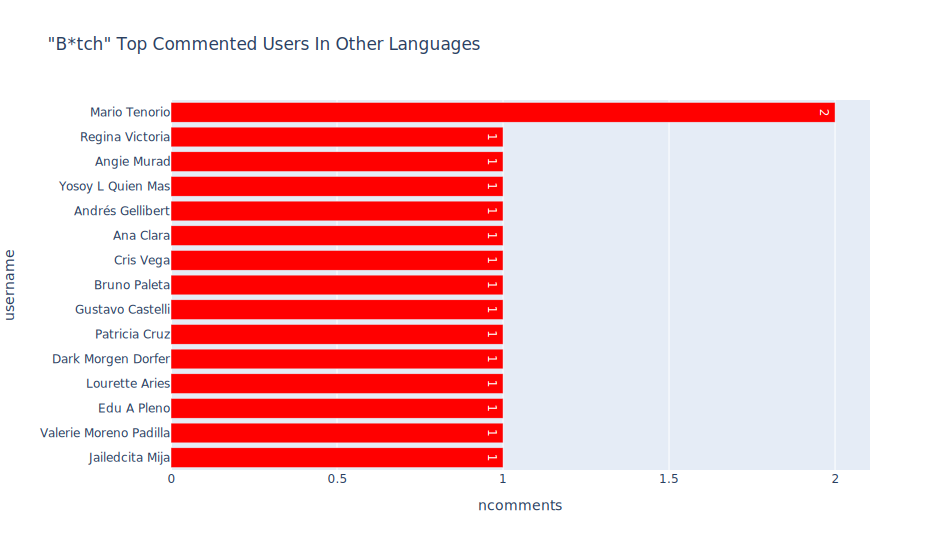

In [233]:
bitch_others_users = df_bitch_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(bitch_others_users.head(15), '"B*tch" Top Commented Users In Other Languages', threshold=0, c=0)

In [234]:
df = df_bitch_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,"das angebliche beweisfoto ist einfach lächerlich !!!\r\njeder der einen harten tag hinter sich hat, könnte quasi so fotografiert werden,ich würde mich mit wahrhafter größe mit jonny d. einigen und zeigen das ich karakter im leib hab und nicht wie eine beleidigte im zickenstall aufführen,wie im kindergarten,oh sorry die haben mehr kribs",German,"the alleged proof photo is just ridiculous! anyone who has had a hard day could be photographed like that, i would agree with jonny d on true greatness and show that i have character in my body and not act like an offended girl in a bitch shed, like in kindergarten, oh sorry they have more crabs",Katharina Schäfer
1,aunque no te gusta y no quieras johnny depp va estar aun mucho mejor sin ti y no creas que te saliste con la tuya bitch,Spanish,even if you don't like it and don't want to johnny depp it will be even better without you and don't think you got away with it bitch,Madeleinne Palacios
2,jhonny deep es y siempre será grindelwald..!!! #justiceforjohnnydeep #potterheadsupportsjonny\r\n#amberheardbitch,Spanish,jhonny deep is and always will be grindelwald!!! #justiceforjohnnydeep #potterheadsupportsjonny #amberheardbitch,Roscibel Leiv
3,"mrcho, měli by tě vyhodit ze všech filmů. zničila jsi skvělého člověka a herce jen ze svého rozmaru🤬🤬🤬 chce se mi z tebe 🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮",Czech,"bitch, they should kick you out of all the movies you ruined a great person and the actor just out of his whim wants me out of you",Lenka Wellnerova Safrankova
4,perra sin corazón!!!! sólo agarraste a jd cómo plataforma para obtener fama y ahora tú solita te estás hundiendo por tus falacias hacía él!!!! #justiciaparajhonnydepp,Spanish,heartless bitch!!!! you just grabbed jd as a platform to get fame and now you're sinking all by yourself because of your fallacies towards him!!!! #justiciaparajhonnydepp,Nicte Farkas
5,je vous souhaite la prison aucune classe mangez en pleins procès ça donne le ton sur vous une connasse . i hope you go on jail!,French,I wish you prison no class eat in the middle of a trial it sets the tone for you bitch i hope you go on jail!,Fad Drissi
6,"por que no mejor te suicidas por la mierda que eres y nos lo transmites en vivo, eso si que daría gusto perra.",Spanish,"why don't you kill yourself for the shit you are and broadcast it to us live, that would be nice bitch",Gabrielle Riddle
7,perra asquerosa no mereces la fama que tienes ! desde colombia odiamos tu falsa imagen y amamos a jhonny das asco,Spanish,filthy bitch you don't deserve the fame you have! from colombia we hate your false image and we love jhonny das disgust,Valentina Lucy
8,stronza 😤😤😤😤,Romansh,bitch,Emy Russo
9,devi morire troia,Italian,you must die bitch,Luca Cianci


<br>

<a id='Psycho'></a>
>>## Text Contains "Psycho" --> 55
> <ul>
 <li><a href="#fuck">F*ck</a></li>
 <li><a href="#Liar">Liar</a></li>
 <li><a href="#Abuser">Abuser</a></li>
 <li><a href="#bitch">B*tch</a></li>
 <li><a href="#Psycho"><b>Psycho</b></a></li>
 <li><a href="#Crazy">Crazy</a></li>
 <li><a href="#Disgusting">Disgusting</a></li>
 <li><a href="#Stupid">Stupid</a></li>
 <li><a href="#Gold_Digger">Gold Digger</a></li>
 <li><a href="#Bruises">Bruises</a></li>
 </ul>

In [235]:
df_psycho1 = df_comments[df_comments.translated.str.contains('psycho')]
df_psycho2 = df_comments[df_comments.comment.str.contains('psycho')]
df_psycho = df_psycho1.append(df_psycho2)
df_psycho.drop_duplicates(inplace=True)

In [236]:
print(f'{df_psycho.shape[0]} contributions, made by {df_psycho.username.nunique()} Users, In {df_psycho.language.nunique()} Languages')
df_psycho.head(2)

55 contributions, made by 50 Users, In 6 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
424,Madoka Magica,the perpetrator is in denial and the victim is...,post0_comment,NaN,NaN,NaN,NaN,True,the perpetrator is in denial and the victim is...,English,the perpetrator is in denial and the victim is...
508,Petter Nerman,you are a straight up psychopath taking advant...,post0_comment,NaN,NaN,NaN,NaN,True,you are a straight up psychopath taking advant...,English,you are a straight up psychopath taking advant...


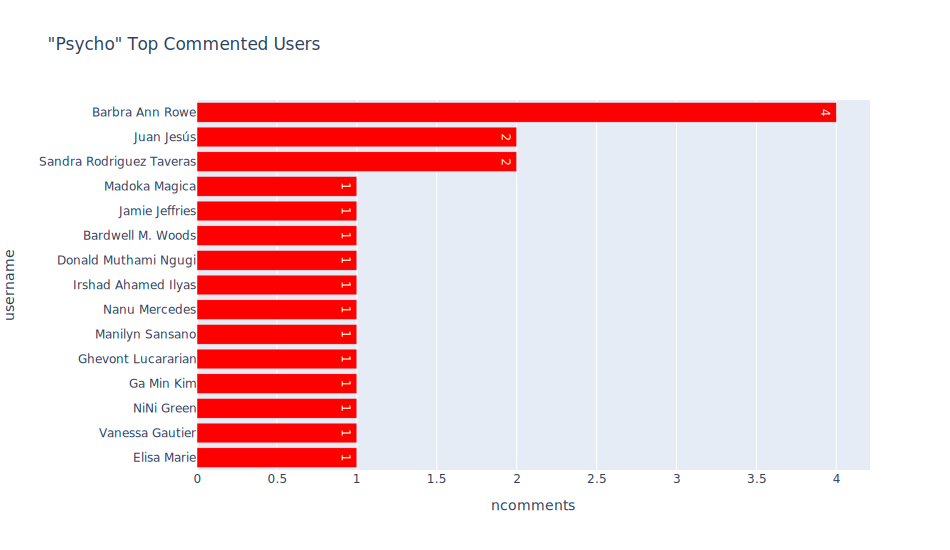

In [237]:
psycho_users = df_psycho.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(psycho_users.head(15), '"Psycho" Top Commented Users', threshold=0, c=0)

In [238]:
df_psycho.comment.value_counts().head()

she needs help. and not the kind of help a husband can give. life long serious psychiatric help, psychotherapy and medication. that's the thing with abusers they always want to be in control and if there's nobody there they are not in control. they ta…see more                                                                                                                             4
psicopata                                                                                                                                                                                                                                                                                                                                                                                        2
the perpetrator is in denial and the victim is revictimised.please look at the power wheel and you can see the pattern cycle of abuse.this can be be physical or psychological.my ex husband is in denial and until they face thei

In [239]:
df = df_psycho[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,the perpetrator is in denial and the victim is revictimised.please look at the power wheel and you can see the pattern cycle of abuse.this can be be physical or psychological.my ex husband is in denial and until they face their true selves they never will change.an abuser always justifies and gas lights and then tells everyone that they are the victim instead.it is done so well.,English,the perpetrator is in denial and the victim is revictimisedplease look at the power wheel and you can see the pattern cycle of abusethis can be be physical or psychologicalmy ex husband is in denial and until they face their true selves they never will changean abuser always justifies and gas lights and then tells everyone that they are the victim insteadit is done so well,Madoka Magica
1,you are a straight up psychopath taking advantage of female privilege to abuse and slander a man. this is what feminism looks like.,English,you are a straight up psychopath taking advantage of female privilege to abuse and slander a man this is what feminism looks like,Petter Nerman
2,we need to talk...🙏 im begging you let it go please enough is enough your hurting yourself and mr. depp i defended both of yall but at this point he seems to be the one guarding himself and at this time it can be claimed as psychological abuse from you…see more,English,we need to talk im begging you let it go please enough is enough your hurting yourself and mr depp i defended both of yall but at this point he seems to be the one guarding himself and at this time it can be claimed as psychological abuse from yousee more,Kevin Jones
3,"my sweet love is innocent and you physically, emotionally, mentally, and psychologically abused johnny depp. i ❤ him truly, honestly, sincerely and unconditionally always and forever his truly and sincerely leslie rose depp from mission, texas ♊♎💍⚓💋❤🥂🍷🍷. he's mine now",English,"my sweet love is innocent and you physically, emotionally, mentally, and psychologically abused johnny depp i him truly, honestly, sincerely and unconditionally always and forever his truly and sincerely leslie rose depp from mission, texas ♊♎⚓🥂 he's mine now",Leslie Kelley
4,your so gross. you literally acted like a victim when johnny was actual the one suffering. you can clearly see he’s suffering and your a fucking psycho,English,your so gross you literally acted like a victim when johnny was actual the one suffering you can clearly see he’s suffering and your a fucking psycho,Kirstie Anyiah Lopez
5,johny depp is a child rape apologist and a psycho. give systematic misogyny a kick in its own groin!\r\n#fjd,English,johny depp is a child rape apologist and a psycho give systematic misogyny a kick in its own groin! #fjd,Lena Donaker
6,"no te da vergüenza estar acá, mentirosa. abusadora, eres una psicópata. estás demasiado loca, ojalá jonny te destruya la carrera así como lo intentaste con el",Spanish,"you're not ashamed to be here, abusive liar, you're a psychopath you're too crazy, I hope jonny destroys your career just like you tried with him",Cristina Porras Herrera
7,you’re psychotic. how can you have the audacity to lie about abuse that’s seriously so disgusting. you need to be locked up in a mental institution. you’re destroying the people who’ve actually experienced domestic violence credibility. you’re the reason abuse victims aren’t taken seriously!,English,you’re psychotic how can you have the audacity to lie about abuse that’s seriously so disgusting you need to be locked up in a mental institution you’re destroying the people who’ve actually experienced domestic violence credibility you’re the reason abuse victims aren’t taken seriously!,Savannah Ferraris
8,"ni con todo el dinero que le quitaste al jhonny, ni con toda la humillacion que le hiciste pasar, jamas seras feliz en la vida, existe un karma y lo veras pronto psicopata",Spanish,"neither with all the money you took from jhonny, nor with all the humiliation you made hi

# "Psycho" Comments In Languages Other Than English

In [240]:
df_psycho_others = df_psycho[df_psycho.language != 'English']
print(f'{df_psycho_others.shape[0]} contributions, made by {df_psycho_others.username.nunique()} Users, In {df_psycho_others.language.nunique()} Languages')
df_psycho_others.head(2)


14 contributions, made by 13 Users, In 5 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
817,Cristina Porras Herrera,"no te da vergüenza estar acá, mentirosa. abusa...",post0_comment,NaN,NaN,NaN,NaN,True,"no te da vergüenza estar acá, mentirosa abusad...",Spanish,"you're not ashamed to be here, abusive liar, y..."
919,Bladimir Martinez,ni con todo el dinero que le quitaste al jhonn...,post0_comment,NaN,NaN,NaN,NaN,True,ni con todo el dinero que le quitaste al jhonn...,Spanish,neither with all the money you took from jhonn...


In [241]:
df_psycho.language.value_counts()

English        41
Spanish         7
Swahili         3
Sanskrit        2
Interlingue     1
German          1
Name: language, dtype: int64

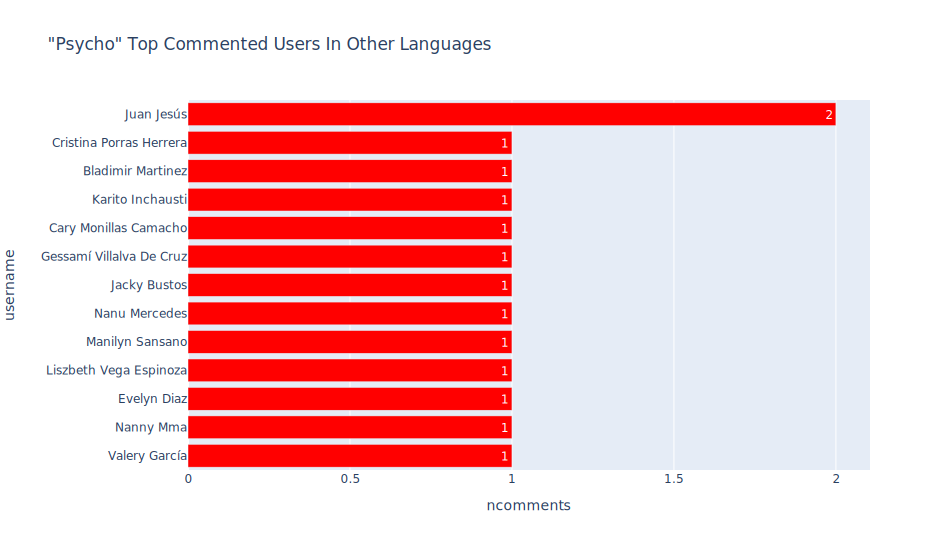

In [242]:
psycho_others_users = df_psycho_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(psycho_others_users.head(15), '"Psycho" Top Commented Users In Other Languages', threshold=0, c=0)

In [243]:
df = df_psycho_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,"no te da vergüenza estar acá, mentirosa. abusadora, eres una psicópata. estás demasiado loca, ojalá jonny te destruya la carrera así como lo intentaste con el",Spanish,"you're not ashamed to be here, abusive liar, you're a psychopath you're too crazy, I hope jonny destroys your career just like you tried with him",Cristina Porras Herrera
1,"ni con todo el dinero que le quitaste al jhonny, ni con toda la humillacion que le hiciste pasar, jamas seras feliz en la vida, existe un karma y lo veras pronto psicopata",Spanish,"neither with all the money you took from jhonny, nor with all the humiliation you made him go through, you will never be happy in life, there is a karma and you will see it soon psychopath",Bladimir Martinez
2,disgusting psycho!!,Interlingue,disgusting psycho!!,Karito Inchausti
3,psychopath,Sanskrit,psychopath,Cary Monillas Camacho
4,psicopata,Swahili,psycho,Juan Jesús
5,psicópata,Swahili,psychopath,Gessamí Villalva De Cruz
6,deja en paz a depp y busca un psicólogo por favor 😒,Spanish,leave depp alone and find a psychologist please,Jacky Bustos
7,"realmente sos una psicópata, como es que te contratan? das asco!",German,"you really are a psychopath, how do they hire you? you're disgusting!",Nanu Mercedes
8,#psychopath!!!!,Sanskrit,#psychopath!!!!,Manilyn Sansano
9,psicopata,Swahili,psycho,Juan Jesús


<br>

<a id='Crazy'></a>
>>## Text Contains "Crazy" --> 80
> <ul>
 <li><a href="#fuck">F*ck</a></li>
 <li><a href="#Liar">Liar</a></li>
 <li><a href="#Abuser">Abuser</a></li>
 <li><a href="#bitch">B*tch</a></li>
 <li><a href="#Psycho">Psycho</a></li>
 <li><a href="#Crazy"><b>Crazy</b></a></li>
 <li><a href="#Disgusting">Disgusting</a></li>
 <li><a href="#Stupid">Stupid</a></li>
 <li><a href="#Gold_Digger">Gold Digger</a></li>
 <li><a href="#Bruises">Bruises</a></li>
 </ul>

In [244]:
df_crazy1 = df_comments[df_comments.translated.str.contains('crazy')]
df_crazy2 = df_comments[df_comments.comment.str.contains('crazy')]
df_crazy = df_crazy1.append(df_crazy2)
df_crazy.drop_duplicates(inplace=True)

In [245]:
print(f'{df_crazy.shape[0]} contributions, made by {df_crazy.username.nunique()} Users, In {df_crazy.language.nunique()} Languages')
df_crazy.head(2)

80 contributions, made by 73 Users, In 8 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
139,Yayo Will,it was so obvious she lied at the time of each...,post0_comment,NaN,NaN,NaN,NaN,True,it was so obvious she lied at the time of each...,English,it was so obvious she lied at the time of each...
144,Lind Eve,"she is a hypocritical liar, how can she have s...",post0_comment,NaN,NaN,NaN,NaN,True,"she is a hypocritical liar, how can she have s...",English,"she is a hypocritical liar, how can she have s..."


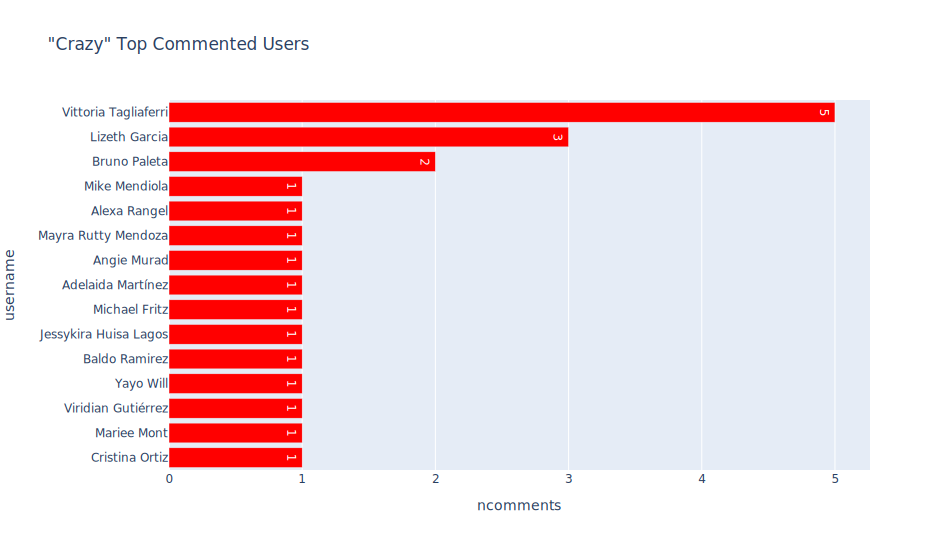

In [246]:
crazy_users = df_crazy.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(crazy_users.head(15), '"Crazy" Top Commented Users', threshold=0, c=0)

In [247]:
df_crazy.comment.value_counts().head()

you are completely crazy. they should lock you up in an asylum and leave you there for the rest of your miserable life😡😡💩💩    5
the crazy woman who defecates in bed                                                                                          3
perra loca                                                                                                                    2
crazy abuser parasite #justiceforjohnnydepp                                                                                   1
puta vieja loca en un manicomio devieras estar\r\nbasura humana                                                               1
Name: comment, dtype: int64

In [248]:
df = df_crazy[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,it was so obvious she lied at the time of each incident. she's one of those crazy females. i hope she gets what's coming.,English,it was so obvious she lied at the time of each incident she's one of those crazy females i hope she gets what's coming,Yayo Will
1,"she is a hypocritical liar, how can she have so much evil in your heart, johnny is not alone several people we trust you are a crazy crazy .... johnny is the best actor in the world world, leave him alone.",English,"she is a hypocritical liar, how can she have so much evil in your heart, johnny is not alone several people we trust you are a crazy crazy johnny is the best actor in the world world, leave him alone",Lind Eve
2,you are a shame you think you are very empowered with your crazy friends. i only reject your image. hold on jony deep! from argentina we bank,English,you are a shame you think you are very empowered with your crazy friends i only reject your image hold on jony deep! from argentina we bank,Mauro Cardozo
3,i want you amber. i’m so crazy for you amber ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️,English,i want you amber i’m so crazy for you amber,Mahdi Hemati
4,"your fucking crazy, you really need a psicologist help!",English,"your fucking crazy, you really need a psicologist help!",Valeria Grdz
5,never stick your dick in crazy no matter how attractive it may seem...,English,never stick your dick in crazy no matter how attractive it may seem,Nyaree Allen
6,you are crazy amber,English,you are crazy amber,Carlos Andres Gil Javer
7,you are completely crazy. they should lock you up in an asylum and leave you there for the rest of your miserable life😡😡💩💩,English,you are completely crazy they should lock you up in an asylum and leave you there for the rest of your miserable life,Vittoria Tagliaferri
8,"solo vine por que no pienso seguir tus campañas, estas loca amistad",Spanish,"I only came because I do not intend to follow your campaigns, you are crazy friendship",Nataly Temnikova
9,"ni loca te sigo, tóxica maniática",Galician,"I don't follow you crazy, toxic maniac",Vilma Aquino


# "Crazy" Comments In Languages Other Than English

In [249]:
df_crazy_others = df_crazy[df_crazy.language != 'English']
print(f'{df_crazy_others.shape[0]} contributions, made by {df_crazy_others.username.nunique()} Users, In {df_crazy_others.language.nunique()} Languages')
df_crazy_others.head(2)


36 contributions, made by 35 Users, In 7 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
636,Nataly Temnikova,solo vine por que no pienso seguir tus campaña...,post0_comment,NaN,NaN,NaN,NaN,True,solo vine por que no pienso seguir tus campaña...,Spanish,I only came because I do not intend to follow ...
690,Vilma Aquino,"ni loca te sigo, tóxica maniática",post0_comment,NaN,NaN,NaN,NaN,True,"ni loca te sigo, tóxica maniática",Galician,"I don't follow you crazy, toxic maniac"


In [250]:
df_crazy.language.value_counts()

English       44
Spanish       25
Latin          4
Basque         3
Galician       1
un             1
Indonesian     1
Dutch          1
Name: language, dtype: int64

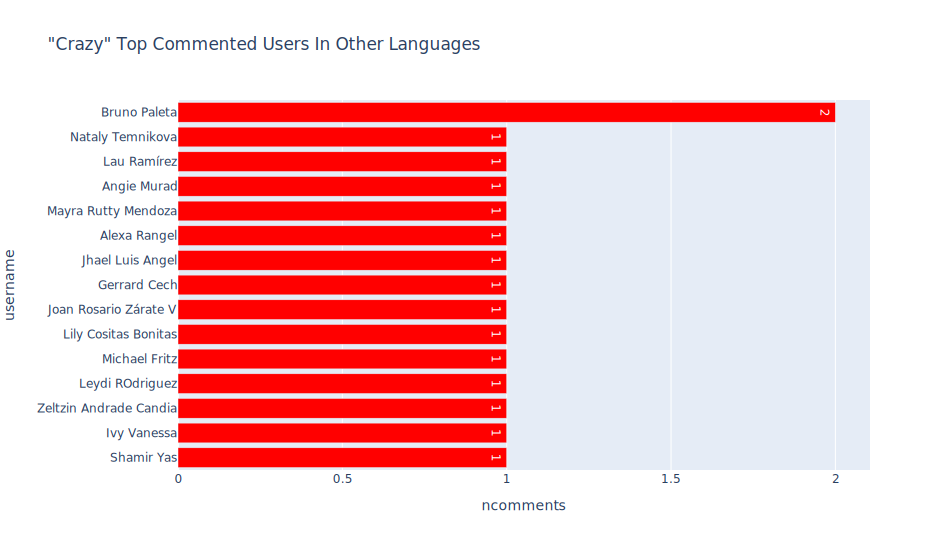

In [251]:
crazy_others_users = df_crazy_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(crazy_others_users.head(15), '"Crazy" Top Commented Users In Other Languages', threshold=0, c=0)

In [252]:
df = df_crazy_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,"solo vine por que no pienso seguir tus campañas, estas loca amistad",Spanish,"I only came because I do not intend to follow your campaigns, you are crazy friendship",Nataly Temnikova
1,"ni loca te sigo, tóxica maniática",Galician,"I don't follow you crazy, toxic maniac",Vilma Aquino
2,"no te da vergüenza estar acá, mentirosa. abusadora, eres una psicópata. estás demasiado loca, ojalá jonny te destruya la carrera así como lo intentaste con el",Spanish,"you're not ashamed to be here, abusive liar, you're a psychopath you're too crazy, I hope jonny destroys your career just like you tried with him",Cristina Porras Herrera
3,fucking crazy,un,fucking crazy,Bruno Paleta
4,maldita loca,Basque,damn crazy,Virginia Fuentes Coiana
5,la loca 😱,Latin,the crazy woman,Dayana Guillen Miranda
6,loca!\r\njusticia para jonny depp,Indonesian,crazy! justice for jonny depp,Betsy Lorca Moreno
7,"nunca fuiste del interés de nadie,maldita loca.",Spanish,"you were never in anyone's interest, damn crazy",Alex Appleby
8,loca de mierda,Spanish,fucking crazy,LA Dallera Dallera
9,loca de mierdaaa,Dutch,fucking crazy,Ivan Alexander Montalvo Quispe


<br>

<a id='Disgusting'></a>
>>## Text Contains "Disgusting" --> 107
> <ul>
 <li><a href="#fuck">F*ck</a></li>
 <li><a href="#Liar">Liar</a></li>
 <li><a href="#Abuser">Abuser</a></li>
 <li><a href="#bitch">B*tch</a></li>
 <li><a href="#Psycho">Psycho</a></li>
 <li><a href="#Crazy">Crazy</a></li>
 <li><a href="#Disgusting"><b>Disgusting</b></a></li>
 <li><a href="#Stupid">Stupid</a></li>
 <li><a href="#Gold_Digger">Gold Digger</a></li>
 <li><a href="#Bruises">Bruises</a></li>
 </ul>

In [253]:
df_disgusting1 = df_comments[df_comments.translated.str.contains('disgusting')]
df_disgusting2 = df_comments[df_comments.comment.str.contains('disgusting')]
df_disgusting = df_disgusting1.append(df_disgusting2)
df_disgusting.drop_duplicates(inplace=True)

In [254]:
print(f'{df_disgusting.shape[0]} contributions, made by {df_disgusting.username.nunique()} Users, In {df_disgusting.language.nunique()} Languages')
df_disgusting.head(2)

107 contributions, made by 105 Users, In 6 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
38,Megan Gallo,it’s really sad that you’ve hijacked the platf...,post0_comment,NaN,NaN,NaN,NaN,True,it’s really sad that you’ve hijacked the platf...,English,it’s really sad that you’ve hijacked the platf...
114,Rafael C. Ballesteros,#justiceforjohnnydepp\r\nit is disgusting that...,post0_comment,NaN,NaN,NaN,NaN,True,#justiceforjohnnydepp it is disgusting that wa...,English,#justiceforjohnnydepp it is disgusting that wa...


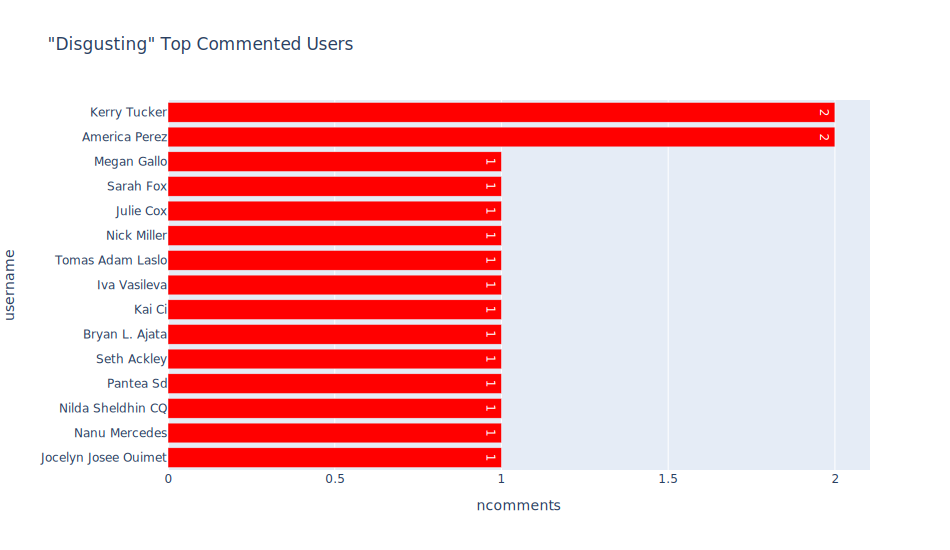

In [255]:
disgusting_users = df_disgusting.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(disgusting_users.head(15), '"Disgusting" Top Commented Users', threshold=0, c=0)

In [256]:
df_disgusting.comment.value_counts().head()

disgusting                                                                                                                                                                                                                                                                                         2
it’s really sad that you’ve hijacked the platform of domestic abuse from real victims for your self serving purposes. what makes it even more disgusting is that you’re actually an abuser. no shame.                                                                                              1
you're disgusting.                                                                                                                                                                                                                                                                                 1
está foto está tipo... como cuando te masturbas y brincas porque tienes un vídeo en xvideos... si ella tiene un vídeo sex

In [257]:
df = df_disgusting[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,it’s really sad that you’ve hijacked the platform of domestic abuse from real victims for your self serving purposes. what makes it even more disgusting is that you’re actually an abuser. no shame.,English,it’s really sad that you’ve hijacked the platform of domestic abuse from real victims for your self serving purposes what makes it even more disgusting is that you’re actually an abuser no shame,Megan Gallo
1,"#justiceforjohnnydepp\r\nit is disgusting that warner bros fired johnny depp for being a victim of abuse. i am a huge harry potter and wb fan but will not support a company that thinks punishing victims of abuse is ok.\r\nwhat if he was a woman and it was a husband doing the abuse, would they have fired the person then?",English,"#justiceforjohnnydepp it is disgusting that warner bros fired johnny depp for being a victim of abuse i am a huge harry potter and wb fan but will not support a company that thinks punishing victims of abuse is ok what if he was a woman and it was a husband doing the abuse, would they have fired the person then?",Rafael C. Ballesteros
2,you make a mockery of real abuse victims and i think that might be the most disgusting thing of all. poor johny.,English,you make a mockery of real abuse victims and i think that might be the most disgusting thing of all poor johny,Anna Katherine Fuertsch
3,from those of us who have actually experienced domestic violence how disgusting can you be to lie about it. you take the cake lady. we are absolutely disgusted in ur lies. i wish you no harm but i do hope you are punished for ur lies and all u have taken from mr. depp and those of us who have been abused.\r\nshame on you.,English,from those of us who have actually experienced domestic violence how disgusting can you be to lie about it you take the cake lady we are absolutely disgusted in ur lies i wish you no harm but i do hope you are punished for ur lies and all u have taken from mr depp and those of us who have been abused shame on you,Kelly Davis
4,@real —amberheard... lmao real pfffft.. your disgusting and disrespectful coming from a woman who has been through domestic abuse.. not only myself but my children too !! you are a shitty human,English,@real —amberheard lmao real pfffft your disgusting and disrespectful coming from a woman who has been through domestic abuse not only myself but my children too !! you are a shitty human,Tracy Kam
5,no hay palabras que mejor te describan que doble cara....\r\njusgaste a ser voz de las victimas y eras una de los y la muchas que maltrataban...\r\nascooooo de persona,Spanish,there are no words that best describe you that double face you judged to be the voice of the victims and you were one of the many who mistreated disgusting people,Maria Jaime Perez
6,soo disgusting with no shame about it! 👎👎👎,English,soo disgusting with no shame about it!,Blake Wilson
7,how disgusting to follow a damn who does everything possible so that her ex-husband doesn't have a job,English,how disgusting to follow a damn who does everything possible so that her exhusband doesn't have a job,Grecia Palomares
8,who did you give your ass to to be right? how disgusting can you get?,English,who did you give your ass to to be right? how disgusting can you get?,Cecilia Carrisho
9,que asco tu vida y de paso quieres que la de jonny depp sea así!,Spanish,how disgusting your life is and by the way you want jonny depp's life to be like that!,Susan Rz


# "Disgusting" Comments In Languages Other Than English

In [258]:
df_disgusting_others = df_disgusting[df_disgusting.language != 'English']
print(f'{df_disgusting_others.shape[0]} contributions, made by {df_disgusting_others.username.nunique()} Users, In {df_disgusting_others.language.nunique()} Languages')
df_disgusting_others.head(2)


34 contributions, made by 34 Users, In 5 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
354,Maria Jaime Perez,no hay palabras que mejor te describan que dob...,post0_comment,NaN,NaN,NaN,NaN,True,no hay palabras que mejor te describan que dob...,Spanish,there are no words that best describe you that...
681,Susan Rz,que asco tu vida y de paso quieres que la de j...,post0_comment,NaN,NaN,NaN,NaN,True,que asco tu vida y de paso quieres que la de j...,Spanish,how disgusting your life is and by the way you...


In [259]:
df_disgusting.language.value_counts()

English        73
Spanish        23
Interlingue     6
German          3
Bislama         1
Uzbek           1
Name: language, dtype: int64

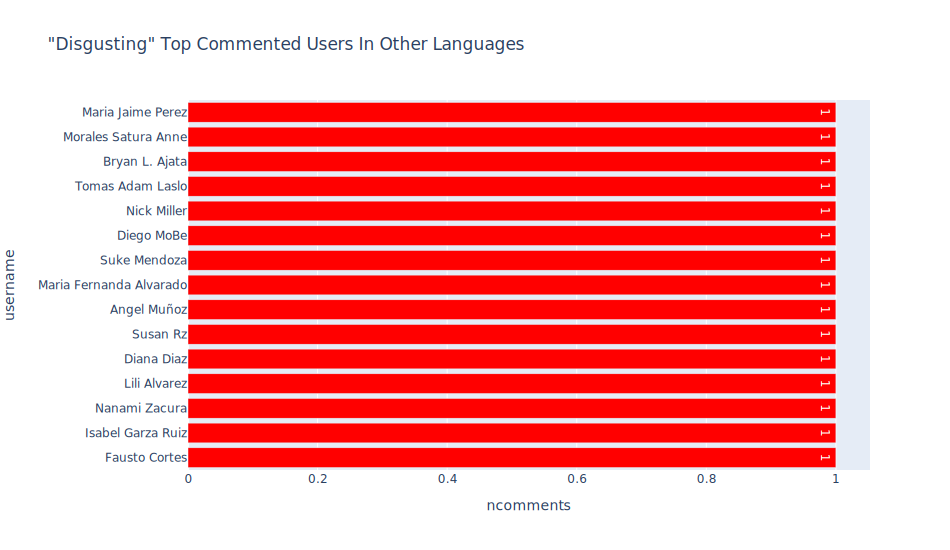

In [260]:
disgusting_others_users = df_disgusting_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(disgusting_others_users.head(15), '"Disgusting" Top Commented Users In Other Languages', threshold=0, c=0)

In [261]:
df = df_disgusting_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,no hay palabras que mejor te describan que doble cara....\r\njusgaste a ser voz de las victimas y eras una de los y la muchas que maltrataban...\r\nascooooo de persona,Spanish,there are no words that best describe you that double face you judged to be the voice of the victims and you were one of the many who mistreated disgusting people,Maria Jaime Perez
1,que asco tu vida y de paso quieres que la de jonny depp sea así!,Spanish,how disgusting your life is and by the way you want jonny depp's life to be like that!,Susan Rz
2,disgusting abuser. rot.,Bislama,disgusting abuser rot,Mia Contreras
3,disgusting psycho!!,Interlingue,disgusting psycho!!,Karito Inchausti
4,eres una farssa asquerosa,Spanish,you are a disgusting farssa,Heri Jimenez
5,das asco. felicidades. asquerosa.,Spanish,you're disgusting congratulations disgusting,Pablo Quintana
6,ay das asco 🤮,German,oh you're disgusting,Maria Perez
7,"eres la peor blasfemia , ni la basura da tanto asco como tú y tus actitudes , eres cruel .",Spanish,"you are the worst blasphemy, not even garbage is as disgusting as you and your attitudes, you are cruel",Irene Kirino
8,eres un asco como representante de las mujeres feministas! 🖕,Spanish,You are disgusting as a representative of feminist women!,Nash Toledo Gonzalez
9,disgusting !!!!!!!,Interlingue,disgusting !!!!!!!,Aspen Grace


<br>

<a id='Stupid'></a>
>>## Text Contains "Stupid" --> 30
> <ul>
 <li><a href="#fuck">F*ck</a></li>
 <li><a href="#Liar">Liar</a></li>
 <li><a href="#Abuser">Abuser</a></li>
 <li><a href="#bitch">B*tch</a></li>
 <li><a href="#Psycho">Psycho</a></li>
 <li><a href="#Crazy">Crazy</a></li>
 <li><a href="#Disgusting">Disgusting</a></li>
 <li><a href="#Stupid"><b>Stupid</b></a></li>
 <li><a href="#Gold_Digger">Gold Digger</a></li>
 <li><a href="#Bruises">Bruises</a></li>
 </ul>

In [262]:
df_stupid1 = df_comments[df_comments.translated.str.contains('stupid')]
df_stupid2 = df_comments[df_comments.comment.str.contains('stupid')]
df_stupid = df_stupid1.append(df_stupid2)
df_stupid.drop_duplicates(inplace=True)

In [263]:
print(f'{df_stupid.shape[0]} contributions, made by {df_stupid.username.nunique()} Users, In {df_stupid.language.nunique()} Languages')
df_stupid.head(2)

30 contributions, made by 28 Users, In 4 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
46,John Jeffries,stupid bitch fuck u and your twitter,post0_comment,NaN,NaN,NaN,NaN,True,stupid bitch fuck u and your twitter,English,stupid bitch fuck u and your twitter
342,Kc Anderson,es en serio q hay gente tan estupida para segu...,post0_comment,NaN,NaN,NaN,NaN,True,es en serio q hay gente tan estupida para segu...,Spanish,it's serious that there are people so stupid t...


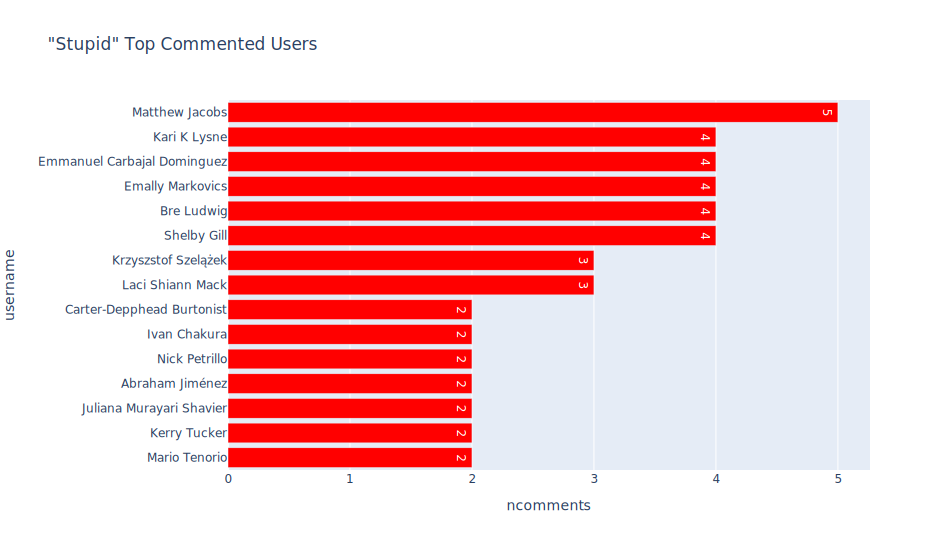

In [264]:
fck_users = df_fck.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(fck_users.head(15), '"Stupid" Top Commented Users', threshold=0, c=0)

In [265]:
df_stupid.comment.value_counts().head()

stupid, nobody believes you, you abuse because you are a woman, but sooner or later the damn truth is discovered amber, you are a liar\r\n\r\n🤬🤬🤬🤬    3
stupid bitch fuck u and your twitter                                                                                                                  1
stupid bitch. for those of us who were a survivors of rape or abuse you are nothing but a dam shame of a female                                       1
eres una estúpida amber heard                                                                                                                         1
hahahaha ha you stupid bitch got what you deserve. hope you go to jail.                                                                               1
Name: comment, dtype: int64

In [266]:
df = df_stupid[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,stupid bitch fuck u and your twitter,English,stupid bitch fuck u and your twitter,John Jeffries
1,es en serio q hay gente tan estupida para seguir a esta mujer no sabia quien era hasta q la vi en aquaman y cualquiera puede interpretar ese papel pero johnny depp es unico,Spanish,it's serious that there are people so stupid to follow this woman I didn't know who she was until I saw her in aquaman and anyone can play that role but johnny depp is unique,Kc Anderson
2,#justiceforjohnnydepp borderlines and their fals allegations is a well known fact. only stupid people believe you,English,#justiceforjohnnydepp borderlines and their fals allegations is a well known fact only stupid people believe you,Haily Abram
3,"nadie te apoya, todos estamos a tu contra y apoyando a jonnhy quien nunca haría esas estupideces tuyas :)",Spanish,"nobody supports you, we are all against you and supporting jonnhy who would never do those stupid things of yours:",Danétt Morales
4,"disculpe soy boliviana y apoyo a johnny depp, como usted dijo que alguien pagaba nuestro apoyo a ese ángel, por favor tiene la dirección del punto de pago en la paz bolivia?? y si no sabe, deje de inventar estupideces, mentir0sa",Spanish,"Excuse me, I am Bolivian and I support Johnny Depp, as you said that someone paid our support to that angel, please do you have the address of the payment point in La Paz, Bolivia? and if you don't know, stop inventing stupid things, liar",Sandra Luna
5,"tu crees que existirías si johnny no te hubiese echo su esposa ?...no seas tan tonta , sin el no eres nadie .no tienes vergüenza, el dinero se acaba. y no creas que tendrás una buena vida , sacando dinero a lo fácil. #justiceforjohnnydeep",Spanish,"do you think you would exist if johnny had not made you his wife? don't be so stupid, without him you are nobody you have no shame, the money runs out and don't think you will have a good life, getting money the easy way #justiceforjohnnydeep",Karinita Davila
6,"stupid, nobody believes you, you abuse because you are a woman, but sooner or later the damn truth is discovered amber, you are a liar\r\n\r\n🤬🤬🤬🤬",English,"stupid, nobody believes you, you abuse because you are a woman, but sooner or later the damn truth is discovered amber, you are a liar",Pattsy Resendez
7,jaja no\r\nestúpida,Slovak,haha not stupid,Dei Cruz Oveja Negra
8,nobody wants to follow you anywhere. stupid ass,English,nobody wants to follow you anywhere stupid ass,Chris Grace
9,stupid bitch,English,stupid bitch,Telespalla Mash


# "Stupid" Comments In Languages Other Than English

In [267]:
df_stupid_others = df_stupid[df_stupid.language != 'English']
print(f'{df_stupid_others.shape[0]} contributions, made by {df_stupid_others.username.nunique()} Users, In {df_stupid_others.language.nunique()} Languages')
df_stupid_others.head(2)


8 contributions, made by 8 Users, In 3 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
342,Kc Anderson,es en serio q hay gente tan estupida para segu...,post0_comment,NaN,NaN,NaN,NaN,True,es en serio q hay gente tan estupida para segu...,Spanish,it's serious that there are people so stupid t...
558,Danétt Morales,"nadie te apoya, todos estamos a tu contra y ap...",post0_comment,NaN,NaN,NaN,NaN,True,"nadie te apoya, todos estamos a tu contra y ap...",Spanish,"nobody supports you, we are all against you an..."


In [268]:
df_stupid.language.value_counts()

English    22
Spanish     6
Slovak      1
Wolof       1
Name: language, dtype: int64

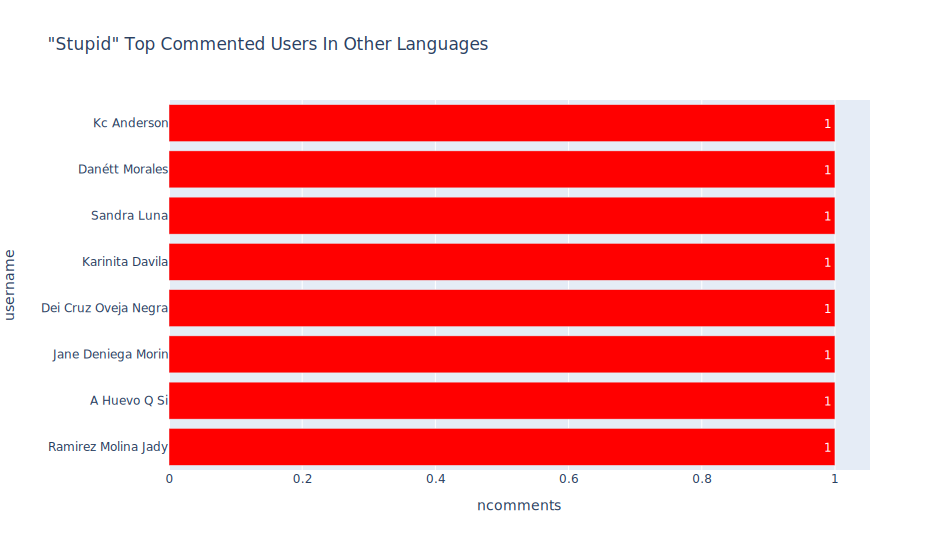

In [269]:
stupid_others_users = df_stupid_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(stupid_others_users.head(15), '"Stupid" Top Commented Users In Other Languages', threshold=0, c=0)

In [270]:
df = df_stupid_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,es en serio q hay gente tan estupida para seguir a esta mujer no sabia quien era hasta q la vi en aquaman y cualquiera puede interpretar ese papel pero johnny depp es unico,Spanish,it's serious that there are people so stupid to follow this woman I didn't know who she was until I saw her in aquaman and anyone can play that role but johnny depp is unique,Kc Anderson
1,"nadie te apoya, todos estamos a tu contra y apoyando a jonnhy quien nunca haría esas estupideces tuyas :)",Spanish,"nobody supports you, we are all against you and supporting jonnhy who would never do those stupid things of yours:",Danétt Morales
2,"disculpe soy boliviana y apoyo a johnny depp, como usted dijo que alguien pagaba nuestro apoyo a ese ángel, por favor tiene la dirección del punto de pago en la paz bolivia?? y si no sabe, deje de inventar estupideces, mentir0sa",Spanish,"Excuse me, I am Bolivian and I support Johnny Depp, as you said that someone paid our support to that angel, please do you have the address of the payment point in La Paz, Bolivia? and if you don't know, stop inventing stupid things, liar",Sandra Luna
3,"tu crees que existirías si johnny no te hubiese echo su esposa ?...no seas tan tonta , sin el no eres nadie .no tienes vergüenza, el dinero se acaba. y no creas que tendrás una buena vida , sacando dinero a lo fácil. #justiceforjohnnydeep",Spanish,"do you think you would exist if johnny had not made you his wife? don't be so stupid, without him you are nobody you have no shame, the money runs out and don't think you will have a good life, getting money the easy way #justiceforjohnnydeep",Karinita Davila
4,jaja no\r\nestúpida,Slovak,haha not stupid,Dei Cruz Oveja Negra
5,bobo amp ka,Wolof,stupid amp you,Jane Deniega Morin
6,eres una horrible persona por ti hay muchas personas q ya no cree en las mujeres te odio estúpida,Spanish,you are a horrible person for you there are many people who no longer believe in women I hate you stupid,A Huevo Q Si
7,eres una estúpida amber heard,Spanish,you are stupid amber heard,Ramirez Molina Jady


<br>

<a id='Gold_Digger'></a>
>>## Text Contains "Gold Digger" --> 19
> <ul>
 <li><a href="#fuck">F*ck</a></li>
 <li><a href="#Liar">Liar</a></li>
 <li><a href="#Abuser">Abuser</a></li>
 <li><a href="#bitch">B*tch</a></li>
 <li><a href="#Psycho">Psycho</a></li>
 <li><a href="#Crazy">Crazy</a></li>
 <li><a href="#Disgusting">Disgusting</a></li>
 <li><a href="#Stupid">Stupid</a></li>
 <li><a href="#Gold_Digger"><b>Gold Digger</b></a></li>
 <li><a href="#Bruises">Bruises</a></li>
 </ul>

In [271]:
df_digger1 = df_comments[df_comments.translated.str.contains('digger')]
df_digger2 = df_comments[df_comments.comment.str.contains('digger')]
df_digger = df_digger1.append(df_digger2)
df_digger.drop_duplicates(inplace=True)

In [272]:
print(f'{df_digger.shape[0]} contributions, made by {df_digger.username.nunique()} Users, In {df_digger.language.nunique()} Languages')
df_digger.head(2)

19 contributions, made by 18 Users, In 3 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
479,Kwame Asare,"hi amber, i'm not famous, a millionaire or bil...",post0_comment,NaN,NaN,NaN,NaN,True,"hi amber, i'm not famous, a millionaire or bil...",English,"hi amber, i'm not famous, a millionaire or bil..."
727,Jean Yves Francois Jacquin,bonjour gold digger,post0_comment,NaN,NaN,NaN,NaN,True,bonjour gold digger,French,hello gold digger


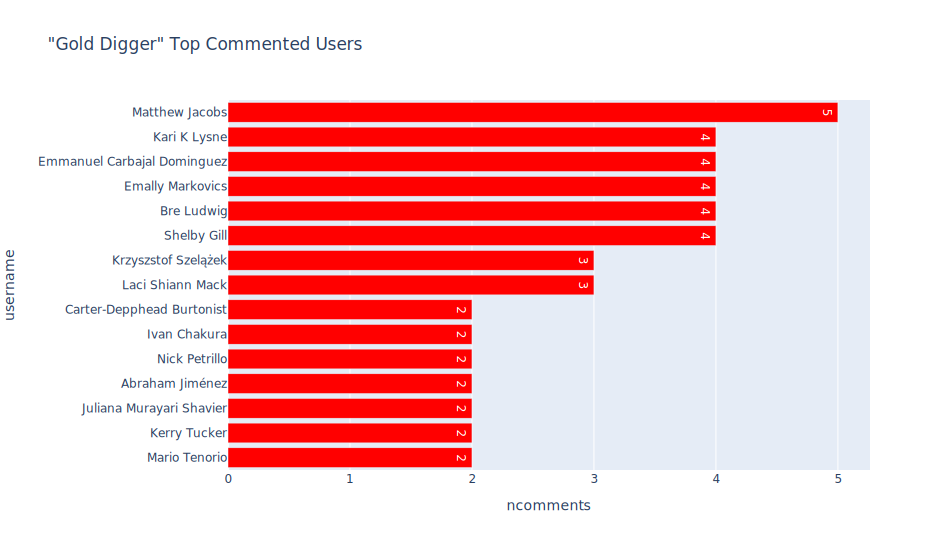

In [273]:
fck_users = df_fck.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(fck_users.head(15), '"Gold Digger" Top Commented Users', threshold=0, c=0)

In [274]:
df_digger.comment.value_counts().head()

hi amber, i'm not famous, a millionaire or billionaire. would you be interested in having a long-term relationship with me? prove these people wrong that you're no gold digger. :-)    1
2 years you sucked captain jack to try to earn money, you gold digger fucking snake                                                                                                     1
amber turd... poster child for pathological liars, abusers and golddiggers ... i'm not a russian bot.. stop making shit up .                                                            1
toxic gold digger                                                                                                                                                                       1
gold digger                                                                                                                                                                             1
Name: comment, dtype: int64

In [275]:
df = df_digger[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,"hi amber, i'm not famous, a millionaire or billionaire. would you be interested in having a long-term relationship with me? prove these people wrong that you're no gold digger. :-)",English,"hi amber, i'm not famous, a millionaire or billionaire would you be interested in having a longterm relationship with me? prove these people wrong that you're no gold digger :",Kwame Asare
1,bonjour gold digger,French,hello gold digger,Jean Yves Francois Jacquin
2,i hope someday the karma will take good care of this gold digger,English,i hope someday the karma will take good care of this gold digger,Pat Sixx
3,"liar,gold digger women...horrible human being..removed her aquaman 2",English,"liar,gold digger womenhorrible human beingremoved her aquaman 2",Towhidul Islam Ovee
4,"you sicken me, you've not only put an innocent man through hell with your abuse, you dragged his name through the mud and accused him of that abuse, damaging his reputation and in doing so you massively hurt an entire movement that is against domestic violence, you selfish gold digger",English,"you sicken me, you've not only put an innocent man through hell with your abuse, you dragged his name through the mud and accused him of that abuse, damaging his reputation and in doing so you massively hurt an entire movement that is against domestic violence, you selfish gold digger",William Thomas
5,hello gold digger stripper cunt 🖕,English,hello gold digger stripper cunt,Mexico Con Amlo
6,you have done abused women no favours. you're revolting and nauseating. a cheap golddigger who will stop at nothing to get some attention. you're a disgrace to women.,English,you have done abused women no favours you're revolting and nauseating a cheap golddigger who will stop at nothing to get some attention you're a disgrace to women,Juanita Wilder
7,this fucking gold digger i hope your career goes down back to hell #justiceforjohnnydepp,English,this fucking gold digger i hope your career goes down back to hell #justiceforjohnnydepp,Dillan Macasiano
8,why would anyone want to follow you stupid little gold digger crazy just stop saying shit and lies about johnny and crawl back under the stone you came from,English,why would anyone want to follow you stupid little gold digger crazy just stop saying shit and lies about johnny and crawl back under the stone you came from,Sally Anne Connell
9,boycott amber heard. she is a liar and a good digger.,English,boycott amber heard she is a liar and a good digger,Joanne Straka


# "Gold Digger" Comments In Languages Other Than English

In [276]:
df_digger_others = df_digger[df_digger.language != 'English']
print(f'{df_digger_others.shape[0]} contributions, made by {df_digger_others.username.nunique()} Users, In {df_digger_others.language.nunique()} Languages')
df_digger_others.head(2)


4 contributions, made by 4 Users, In 2 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
727,Jean Yves Francois Jacquin,bonjour gold digger,post0_comment,NaN,NaN,NaN,NaN,True,bonjour gold digger,French,hello gold digger
3534,Maryflor Perater,gold digger!!,post3_comment,False,False,True,False,True,gold digger!!,Wolof,gold digger!!


In [277]:
df_digger.language.value_counts()

English    15
Wolof       3
French      1
Name: language, dtype: int64

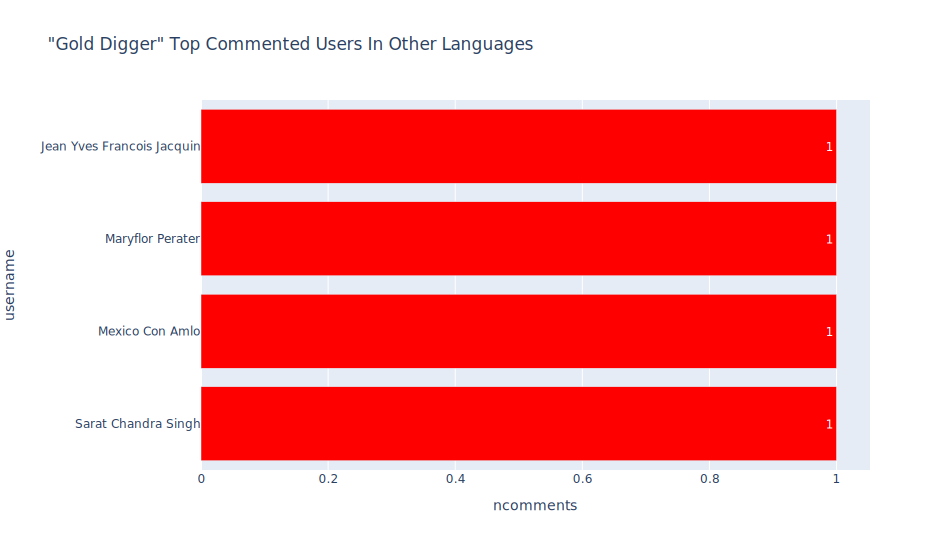

In [278]:
digger_others_users = df_digger_others.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(digger_others_users.head(15), '"Gold Digger" Top Commented Users In Other Languages', threshold=0, c=0)

In [279]:
df = df_digger_others[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,bonjour gold digger,French,hello gold digger,Jean Yves Francois Jacquin
1,gold digger!!,Wolof,gold digger!!,Maryflor Perater
2,gold digger,Wolof,gold digger,Mexico Con Amlo
3,toxic gold digger,Wolof,toxic gold digger,Sarat Chandra Singh


<br>

<a id='Bruises'></a>
>>## Text Contains "Bruises" --> 8
> <ul>
 <li><a href="#fuck">F*ck</a></li>
 <li><a href="#Liar">Liar</a></li>
 <li><a href="#Abuser">Abuser</a></li>
 <li><a href="#bitch">B*tch</a></li>
 <li><a href="#Psycho">Psycho</a></li>
 <li><a href="#Crazy">Crazy</a></li>
 <li><a href="#Disgusting">Disgusting</a></li>
 <li><a href="#Stupid">Stupid</a></li>
 <li><a href="#Gold_Digger">Gold Digger</a></li>
 <li><a href="#Bruises"><b>Bruises</b></a></li>
 </ul>

In [280]:
df_bruises1 = df_comments[df_comments.translated.str.contains('bruises')]
df_bruises2 = df_comments[df_comments.comment.str.contains('bruises')]
df_bruises = df_bruises1.append(df_bruises2)
df_bruises.drop_duplicates(inplace=True)

In [281]:
print(f'{df_bruises.shape[0]} contributions, made by {df_bruises.username.nunique()} Users, In {df_bruises.language.nunique()} Languages')
df_bruises.head(2)

8 contributions, made by 7 Users, In 1 Languages


,username,comment,type,defense_AH,support_AH,offense_AH,defense_against_AH,contains_alpha,clean_text,language,translated
107,Sam Clingan,every body should knows this amber heard is a ...,post0_comment,NaN,NaN,NaN,NaN,True,every body should knows this amber heard is a ...,English,every body should knows this amber heard is a ...
368,Joanne Crawford,"as much as i want to hate you, i can’t. i pity...",post0_comment,NaN,NaN,NaN,NaN,True,"as much as i want to hate you, i can’t i pity ...",English,"as much as i want to hate you, i can’t i pity ..."


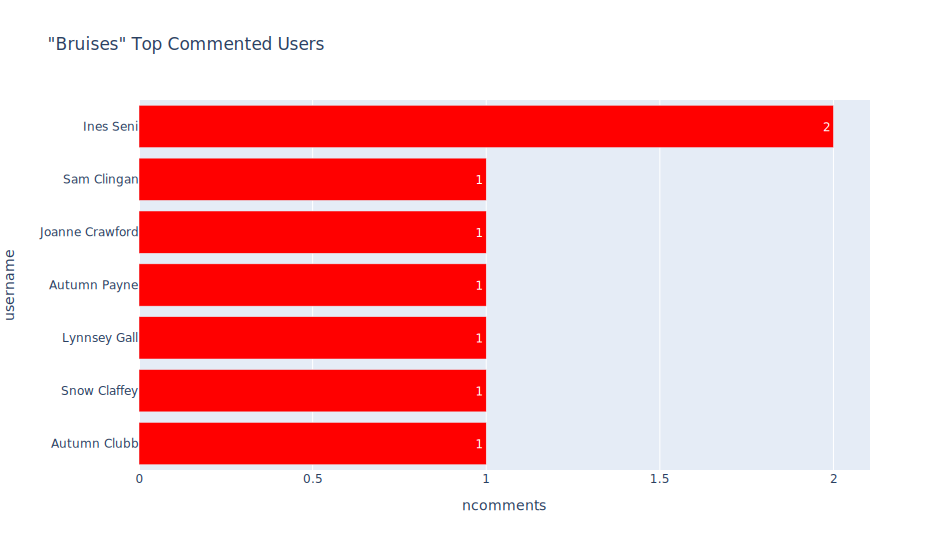

In [282]:
bruises_users = df_bruises.username.value_counts().to_frame().reset_index().rename(columns={'index':'username',
                                                                                  'username':'ncomments'})
helpers.barh(bruises_users.head(15), '"Bruises" Top Commented Users', threshold=0, c=0)

In [283]:
df_bruises.comment.value_counts().head()

the murdocks own the sun and serve on elon musk's tesla board of directors. ah's lawyer's are paid for by elon musk. elon musk was having an affair with ah while she was married to jd. anything with the sun is going to be super biased. seems like she was responsible for those bruises, to prove to elon that she's in an abusive relationship. their texts seems to go in that direction.    2
every body should knows this amber heard is a fucking lier because she lies about things about johnny depp. i'm pretty sure she inflected those bruises on her face. she also shit in johnny depp bed. she ruined johnny depp acting career. her acting career should end not him.                                                                                                                  1
as much as i want to hate you, i can’t. i pity you. it’s so sad that you had to use make up to stage bruises and black eyes. you cut off his finger, you took a literal shit i’m his bed. you are even heard on audio saying

In [284]:
df = df_bruises[['comment', 'language','translated', 'username']].head(60)
with pd.option_context('display.max_colwidth', None):
  display(df.reset_index(drop=True))

,comment,language,translated,username
0,every body should knows this amber heard is a fucking lier because she lies about things about johnny depp. i'm pretty sure she inflected those bruises on her face. she also shit in johnny depp bed. she ruined johnny depp acting career. her acting career should end not him.,English,every body should knows this amber heard is a fucking lier because she lies about things about johnny depp i'm pretty sure she inflected those bruises on her face she also shit in johnny depp bed she ruined johnny depp acting career her acting career should end not him,Sam Clingan
1,"as much as i want to hate you, i can’t. i pity you. it’s so sad that you had to use make up to stage bruises and black eyes. you cut off his finger, you took a literal shit i’m his bed. you are even heard on audio saying,” tell them who is beating you,…see more",English,"as much as i want to hate you, i can’t i pity you it’s so sad that you had to use make up to stage bruises and black eyes you cut off his finger, you took a literal shit i’m his bed you are even heard on audio saying,” tell them who is beating you,see more",Joanne Crawford
2,just remember her exs other then johnny have been seen with bruises on their faces scratch marks as well,English,just remember her exs other then johnny have been seen with bruises on their faces scratch marks as well,Autumn Payne
3,"the murdocks own the sun and serve on elon musk's tesla board of directors. ah's lawyer's are paid for by elon musk. elon musk was having an affair with ah while she was married to jd. anything with the sun is going to be super biased. seems like she was responsible for those bruises, to prove to elon that she's in an abusive relationship. their texts seems to go in that direction.",English,"the murdocks own the sun and serve on elon musk's tesla board of directors ah's lawyer's are paid for by elon musk elon musk was having an affair with ah while she was married to jd anything with the sun is going to be super biased seems like she was responsible for those bruises, to prove to elon that she's in an abusive relationship their texts seems to go in that direction",Ines Seni
4,ya if some grown man threw a phone at me and hit my eye and cheek to the point it left bruises i'd be running at him try beating his worthless butt as well! that's called self defense perfectly legal its not abuse at all lmao. im a victim of abuse and …see more,English,ya if some grown man threw a phone at me and hit my eye and cheek to the point it left bruises i'd be running at him try beating his worthless butt as well! that's called self defense perfectly legal its not abuse at all lmao im a victim of abuse and see more,Lynnsey Gall
5,"the murdocks own the sun and serve on elon musk's tesla board of directors. ah's lawyer's are paid for by elon musk. elon musk was having an affair with ah while she was married to jd. anything with the sun is going to be super biased. seems like she was responsible for those bruises, to prove to elon that she's in an abusive relationship. their texts seems to go in that direction.",English,"the murdocks own the sun and serve on elon musk's tesla board of directors ah's lawyer's are paid for by elon musk elon musk was having an affair with ah while she was married to jd anything with the sun is going to be super biased seems like she was responsible for those bruises, to prove to elon that she's in an abusive relationship their texts seems to go in that direction",Ines Seni
6,"horrible human being, not only did she abuse johnny depp but also abused elon musk. find it really strange that she's claimed that johnny depp hit her when both men have been shown to have bruises and such while being with her. really suspicious, #justiceforjohnnydepp #boycottamberheard",English,"horrible human being, not only did she abuse johnny depp but also abused elon musk find it really strange that she's claimed that johnny depp hit her when both men have been shown to have bru

In [285]:
df_bruises.language.value_counts()

English    8
Name: language, dtype: int64

<br>

<br>

<a id='primarly'></a>
> ## Primarly Text Investigations
> <ul>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#hate_speech">Hate-Speech Comments</a></li>
 <li><a href="#primarly"><b>Primarly Text Investigations</b></a></li>
 </ul>

## NOTE: "These areas are extracted from the text to help in extracting the keywords to be used in the analysis"

In [286]:
df_amber = df_comments[df_comments.comment.str.contains('amber')]

In [287]:
# # KYS is an internet acronym standing for “kill yourself
# threat_text = {' death', ' death ', 'burn', 'burninhell', 'burn in hell', 'kys', ' go kys', ' raped', 'get raped', 
#                'go die', 'diecunt', 'go to hell', 'gotohell', 'beaten', 'beaten up', 'deserves it', 'kill amber',
#                'kill her', 'deathtoamber', 'death to amber', 'to death amber', 'she’s trying to kill him',
#                'kill yourself', ' deserves', 'ambich'}

In [288]:
# threat_text = {' go die', 'die cunt', 'kill heard', 'kill her', 'kill amber', 'kys fuck you amber', 'deathto', 
#                'death to fascists', 'death to a turd', 'death to mera', 'death to all narcissistic', ' hell',
#                'death to anybody not supporting johnny', 'death to femnazis', 'kiss of death', 'burn', 
#                'deserve', 'death amber', 'go kill yourselves', 'kill all the people who disliked'}

In [289]:
# all_threat = death_kill | burn_hell | crime_jail

In [290]:
# len(all_threat)

# Death, Die, Kill & Murder

In [291]:
death_kill = {'death', 'muerte', 'die', '死ね', 'morire', 'morir', 'muere', 'muerete', 'kill', 'matar', 
              'murder', 'dead', 'muerta', 'kys'}

## Death | Morte (Italian) | Tod (German) | Muerte (Spanish) | смерть (Russian)

- #deathamberheard
- all we want to see u death
- death amber heard
- hope you die a horrible death
- i’m pretty sure you played a role in cal worthington’s mysterious death!
- jsjdjss muerte a esta pvt4 <br>
<font color='red'>(Spanish) jsjdjss death to this pvt4<font>

In [292]:
# df_comments[df_comments.comment.str.contains('death')].comment.value_counts().head(60)

- out of me too! now !!!! shaggy, slimy and cowardly !!! do you know that johnny's mom suspected everything ?? but in 2016 she started the mess three days after the death of her mother !!! just to say: "you were right but you will never see that you were

In [293]:
df_comments[df_comments.comment.str.contains('смерть')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [294]:
df_comments[df_comments.comment.str.contains('morte')].comment.value_counts().head(60)

fuori dal me too! now!!!! vergonosa, viscida e vigliacca!!! sapete che la mamma di johnny sospettava tutto?? ma lei nel 2016 ha cominciato il casino tre giorni dopo la morte della mamma!!! proprio a dire: "avevi ragione ma non vedrai mai che avevi ragi…see more    1
Name: comment, dtype: int64

- tarde o temprano llegará la hora de pagar todo el mal que uno hace..!!
(Spanish) sooner or later the time will come to pay for all the evil that one does

In [295]:
df_comments[df_comments.comment.str.contains(' tod ')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

- jsjdjss death to this pvt4

In [296]:
df_comments[df_comments.comment.str.contains('muerte')].comment.value_counts().head(60)

jsjdjss muerte a esta pvt4    1
Name: comment, dtype: int64

In [297]:
# df_amber[df_amber.comment.str.contains('death')].comment.value_counts().head(60)

In [298]:
df_comments[df_comments.comment.str.contains('deathto')].comment.value_counts().head(60)

#deathtoamberheard    3
Name: comment, dtype: int64

In [299]:
df_comments[df_comments.comment.str.contains('death to')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

## Die | Morire (Italian) | Sterben (German)  | Morir/Muere/Muerete (Spanish) |
## умри (Russian) | මැරෙනවා (Sinhala) | 死ね (Japanese)

- die
- go die
- bitch die
- fuck u, die pls
- pls die thnx
- i hope you die, you piece of shit
- you can fuck off and die.
- hope you die a horrible death
- u should die
- pos, just die or dissapear already!
- stay where die there ...
- worst photo and i hope your career dies
- why would anyone want to see your instagram? unless they were trying to find a way to inflict serious pain on you! die you whore
<br>
<br>
- devi morire troia <br>
<font color='red'>(Italian) you must die bitch</font>
- amber puttana schifosa, you should die 🐖🐖🐖 <br>
<font color='red'>(Italian)(Translation -> lousy whore amber, you should die)</font>
- te tendria cerca te romperia los ovarios de una sola patada,inmundicia,ojala te pudras antes de morir! <br>
<font color='red'>(Spanish) I would have you close I would break your ovaries with a single kick, filth, I hope you rot before you die!</font>
<br>
<br>
- nur ein radio ist besser. dies lässt sich abstellen. <br>
<font color='red'>(German)(Translation -> only a radio is better. this can be turned off.) </font>
- a nadie le interesa 😡😡😡 <br>
<font color='red'>(Spanish)(Translation -> nobody cares)</font>
- nadie te quiere <br>
<font color='red'>(Spanish)(Translation -> nobody loves You)</font>
- arunava cmnts gulo por sudhu....amber k dhhuye dieche... <br>
<font color='red'>(Bangla)(Translation -> After Arunav's comments, just ... Amber K washed away)</font>
<br> 
<br> 
- aquí desde perú nadie te quiere volver a ver, te queremos ver destruida así como destruirse a nuestro gran capitán <br>
<font color='red'>(Spanish)(Translation -> here from peru no one wants to see you again, we want to see you destroyed as well as destroy our great captain)</font>
- nadie quiere ver a una perra sacándose fotos cuando envejescas tus tetas estarán por piso y tú culo se estará pudriendo de la mierda de mentiras que salen de tu boca 💩💩perraaaaaaa2💩 <br>
<font color='red'>(Spanish)(Translation -> nobody wants to see a bitch taking pictures of herself when you get old your boobs will be on the floor and your ass will be rotting from the shit of lies that come out of your mouth 💩💩 bitchaaaaaa2💩)</font> 
- huevos, hdsptm\r\nno suelo odiar a nadie, pero a amber heard si 😡 <br>
<font color='red'>(Spanish)(Translation -> eggs, hdsptm\r\nI don't usually hate anyone, but amber heard I do) </font>

In [300]:
# df_comments[df_comments.comment.str.contains('die')].comment.value_counts().head(60)

- 只想说 你妈死了，你纯粹是个妓女。<br>
(Chinese) Just wanted to say your mom died and you're a pure prostitute.

In [301]:
df_comments[df_comments.comment.str.contains('死')].comment.value_counts().head(60)

只想说 你妈死了，你纯粹是个妓女。            1
くたばれ この野郎。地獄で死ね！！！！🤬🤬🤬🤬🤬🖕    1
Name: comment, dtype: int64

In [302]:
df_comments[df_comments.comment.str.contains('死ね')].comment.value_counts().head(60)

くたばれ この野郎。地獄で死ね！！！！🤬🤬🤬🤬🤬🖕    1
Name: comment, dtype: int64

In [303]:
df_comments[df_comments.comment.str.contains('මැරෙනවා')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [304]:
df_comments[df_comments.comment.str.contains('умри')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

- (Italian) you must die bitch

In [305]:
df_comments[df_comments.comment.str.contains('morire')].comment.value_counts().head(60)

devi morire troia    1
Name: comment, dtype: int64

In [306]:
df_comments[df_comments.comment.str.contains('sterben')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

- (Spanish) I would have you close I would break your ovaries with a single kick, filth, I hope you rot before you die!

In [307]:
df_comments[df_comments.comment.str.contains('morir')].comment.value_counts().head(60)

te tendria cerca te romperia los ovarios de una sola patada,inmundicia,ojala te pudras antes de morir!    1
devi morire troia                                                                                         1
Name: comment, dtype: int64

- maldita muere te en el infierno <br>
(Spanish) damn you die in hell
- muerete <br>
(Spanish) die
- una maldita mentirosa muere <br>
(Spanish) a fucking liar dies

In [308]:
df_comments[df_comments.comment.str.contains('muere')].comment.value_counts().head(60)

maldita muere te en el infierno    1
muerete                            1
una maldita mentirosa muere        1
Name: comment, dtype: int64

In [309]:
# df_amber[df_amber.comment.str.contains('die')].comment.value_counts().head(60)

In [310]:
df_amber[df_amber.comment.str.contains('she dies')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [311]:
df_amber[df_amber.comment.str.contains('and to die')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [312]:
df_amber[df_amber.comment.str.contains('amber can die')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [313]:
df_amber[df_amber.comment.str.contains('die amber')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [314]:
# df_amber[df_amber.comment.str.contains('die')].comment.value_counts().head(60)

# Dead | morta/morto (Italian) | tot (German)  | muerta/muerto (Spanish) |
## мертвых (Russian) | මිය ගියා (Sinhala) | 死 (Japanese)

In [315]:
df_comments[df_comments.comment.str.contains('dead')].comment.value_counts().head(60)

everyone hates you amber why you were so cruel to jonny depp it is not his fault that your brain is full of dead fleas and fluff                                                      1
you belong in jail for abuse. as of right now your career is dead.                                                                                                                    1
i got kicked off twitter because you kept getting offended by my posts. guess who's making another and another 😜 funny you feel "bullied". just do everyone a favor and drop dead.    1
you may be live on twitter, but your career is dead. 😹                                                                                                                                1
amber heard is dead.                                                                                                                                                                  1
fuck you #deadamberheard                                                        

In [316]:
df_comments[df_comments.comment.str.contains('මිය ගියා')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [317]:
df_comments[df_comments.comment.str.contains('мертвых')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

- (Spanish) with the face of a dead fly, she turned out to be tremendously crazy.

In [318]:
df_comments[df_comments.comment.str.contains('muerta')].comment.value_counts().head(60)

con cara de mosca muerta resulto ser tremenda loca.    1
Name: comment, dtype: int64

In [319]:
df_comments[df_comments.comment.str.contains(' tot ')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [320]:
df_comments[df_comments.comment.str.contains('morta')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

# Kill | Uccisione (Italian) | Töten (German) | Matar (Spanish)
# убийство (Russian) | මරනවා (Sinhala) | 殺す (Japanese)

- tú eres la razón por la cual un hombre puede ayudar a matar una mujer sin nunca haber matado a ninguna persona <br>
<font color='red'>(Spanish) you are the reason a man can help kill a woman without ever having killed anyone</font>

In [321]:
# df_comments[df_comments.comment.str.contains('kill')].comment.value_counts().head(60)

In [322]:
df_comments[df_comments.comment.str.contains('殺す')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [323]:
df_comments[df_comments.comment.str.contains('මරනවා')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [324]:
df_comments[df_comments.comment.str.contains('убийство')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [325]:
df_comments[df_comments.comment.str.contains('uccisione')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [326]:
df_comments[df_comments.comment.str.contains('töten')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

- (Spanish) you are the reason a man can help kill a woman without ever having killed anyone

In [327]:
df_comments[df_comments.comment.str.contains('matar')].comment.value_counts().head(60)

tú eres la razón por la cual un hombre puede ayudar a matar una mujer sin nunca haber matado a ninguna persona    1
Name: comment, dtype: int64

In [328]:
# df_amber[df_amber.comment.str.contains('kill')].comment.value_counts().head(60)

In [329]:
df_comments[df_comments.comment.str.contains('killher')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [330]:
df_comments[df_comments.comment.str.contains('kill her')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [331]:
df_comments[df_comments.comment.str.contains('kill amber')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [332]:
# df_comments[df_comments.comment.str.contains('serial killer')].comment.value_counts().head(60)

# KYS

In [333]:
df_comments[df_comments.comment.str.contains('kys')].comment.value_counts().head(60)

kys               3
yeah fck u kys    1
Name: comment, dtype: int64

# Murder | Omicidio (Italian) | Mord (German) | Asesinato (Spanish)

In [334]:
df_comments[df_comments.comment.str.contains('murder')].comment.value_counts().head(60)

well well looks like amber and her free loading mates were planning a murder\r\n\r\nhttps://youtu.be/ajn1pj48wka    1
amber. you belong in jail for your reputation murder.                                                               1
Name: comment, dtype: int64

In [335]:
df_comments[df_comments.comment.str.contains('omicidio')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

- (Spanish) What a shame that you are an aggressive and goalscoring woman, are you ruining Depp's life that you have no remorse? Apparently you don't know him, #retract #deppesinocente

In [336]:
df_comments[df_comments.comment.str.contains('mord')].comment.value_counts().head(60)

que vergüenza que seas una mujer agresiva y goleadora, le estás arruinando la vida a depp que no tienes remordimiento? por lo visto no lo conoces, #retractate #deppesinocente    1
Name: comment, dtype: int64

In [337]:
df_comments[df_comments.comment.str.contains('asesinato')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [338]:
# df_amber[df_amber.comment.str.contains('murder')].comment.value_counts().head(60)

In [339]:
# df_amber[df_amber.comment.str.contains('will murder')].comment.value_counts().head(60)

<br>

# Burn & Hell

In [340]:
burn_hell = {'hell', 'inferno', 'infierno', 'ад', 'burn'}

## Burn | Bruciare/Bruciar (Italian) | Brennen (German) | Quemadura (Spanish) |
## Гореть (Russian)

In [341]:
# df_comments[df_comments.comment.str.contains('burn')].comment.value_counts().head(60)

In [342]:
# df_comments[df_comments.comment.str.contains('burn')].comment.value_counts()[60:].head(60)

In [343]:
# df_amber[df_amber.comment.str.contains('burn')].comment.value_counts().head(60)

In [344]:
df_comments[df_comments.comment.str.contains('Гореть')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [345]:
df_comments[df_comments.comment.str.contains('quemadura')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [346]:
df_comments[df_comments.comment.str.contains('brennen')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [347]:
df_comments[df_comments.comment.str.contains('bruciar')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [348]:
df_comments[df_comments.comment.str.contains('burn in hell')].comment.value_counts().head(60)

i hope u burn in hell for hijacking platform of domestic abuse for real victims!😡 there are many out there who need help but definitely not u!    1
fuck you for what you did to johnny. burn in hell                                                                                                 1
burn in hell                                                                                                                                      1
you will burn in hell!!!                                                                                                                          1
hope you burn in hell you dirty bitch                                                                                                             1
burn in hell witch!                                                                                                                               1
burn in hell you fucking cow. hope karma eats your ass alive.                                                   

## Hell | Inferno (Italian) | Hölle (German) | Infierno (Spanish) | ад (Russian)

In [349]:
# df_comments[df_comments.comment.str.contains('hell')].comment.value_counts().head(60)

In [350]:
# df_amber[df_amber.comment.str.contains('hell')].comment.value_counts().head(60)

- (Italian)(scamber turd she doesn't know who jonny is .. no one knows because it was never revealed. but the lady made the biggest mistake of her life! first he will go to prison and then to hell. \ r \ njonny and sacred !! dear Sirs!! this is the revelation !! she wanted)

- гори в аду ембер блядддь <br>
(Russian) burn in hell ember damn

In [351]:
df_comments[df_comments.comment.str.contains('ад')].comment.value_counts().head(60)

гори в аду ембер блядддь    1
Name: comment, dtype: int64

In [352]:
df_comments[df_comments.comment.str.contains('hölle')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

- scamber turd she doesn't know who jonny is .. no one knows because it was never revealed. but the lady made the biggest mistake of her life! first he will go to prison and then to hell. \ r \ njonny and sacred !! dear Sirs!! this is the revelation !! he wanted… see more

In [353]:
df_comments[df_comments.comment.str.contains('inferno')].comment.value_counts().head(60)

scamber turd lei non sa chi è jonny .. nessuno lo sà perché non è mai stato rivelato. ma la signora ha fatto il più grave errore della sua vita! prima andrà in prigione e poi all’inferno.\r\njonny e sacro!! cari signori!! questa è la rivelazione!! voleva…see more    1
Name: comment, dtype: int64

- tu y la panini deben de irse agarraditas dela mano al infierno son tal para cual hjsdp <br>
(Spanish) you and the panini must go hand in hand to hell they are such for which hjsdp
- por mujeres como tú muchos hombres pasan infiernos, ojalá te quedaras tú sin trabajo <br>
(Spanish) for women like you many men go through hell, I wish you would stay without a job
- te vas a sufrir en el infierno <br>
(Spanish) you will suffer in hell
- ojalá te quemes en el infierno <br>
(Spanish) I hope you burn in hell
- maldita muere te en el infierno <br>
(Spanish) damn you die in hell

In [354]:
df_comments[df_comments.comment.str.contains('infierno')].comment.value_counts().head(60)

tu y la panini deben de irse agarraditas dela mano al infierno son tal para cual hjsdp                                                     1
por mujeres como tú muchos hombres pasan infiernos, ojalá te quedaras tú sin trabajo                                                       1
te vas a sufrir en el infierno                                                                                                             1
ojalá te quemes en el infierno...                                                                                                          1
maldita muere te en el infierno                                                                                                            1
keeping faith karma comes around.\r\nni volviendo a nacer llegarás a ser tan grande como el... y ese será tu infierno, fuck you bitch!!    1
es una perra maldita, mentirosa, mojon de baño publico. apestas, te vas a ir al infierno maldita hija de puta.                             1
deja de hacer

In [355]:
df_comments[df_comments.comment.str.contains('inhell')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [356]:
# df_comments[df_comments.comment.str.contains('in hell')].comment.value_counts().head(60)

In [357]:
df_comments[df_comments.comment.str.contains('tohell')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [358]:
# df_comments[df_comments.comment.str.contains('to hell')].comment.value_counts().head(60)

In [359]:
df_comments[df_comments.comment.str.contains('ofhell')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [360]:
df_comments[df_comments.comment.str.contains('of hell')].comment.value_counts().head(60)

i hope you burn in the deepest pits of hell, you ungrateful cunt.    1
Name: comment, dtype: int64

In [361]:
df_comments[df_comments.comment.str.contains('fromhell')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [362]:
# df_comments[df_comments.comment.str.contains('from hell')].comment.value_counts().head(60)

In [363]:
df_comments[df_comments.comment.str.contains('demon from hell')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [364]:
df_comments[df_comments.comment.str.contains('deserves hell')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

# Punish, Crime, Jail & Prison

In [365]:
crime_jail = {'pay', 'pagar', 'punish', 'crime', 'criminal', 'jail', 'prison', 'prigione', 'prisión',
              'deserve', 'karma'}

##  Pay | pagare (Italian) | bezahlen (German) | Pagar (Spanish)
# Плати (Russian) | ගෙවනවා (Sinhala) | 払います (Japanese)

- tarde o temprano llegará la hora de pagar todo el mal que uno hace..!! <br>
sooner or later the time will come to pay for all the evil that one does..!!
- vas a pagar tarde o temprano el daño que estás causando. ni siquiera nunca te he conocido cómo actriz se de vos por el daño que estás causando al gran actor depp. bruja <br>
sooner or later you are going to pay for the damage you are causing. I have never even met you as an actress because of the damage you are causing the great actor Depp. witch
- calla cojuda eres una mentirosa de lo peor q existe pero recuerda tarde o temprano lo vas a pagar acuerdate <br>
shut up you are a liar of the worst that exists but remember sooner or later you are going to pay remember
- todo lo malo que le has hecho a jhonny deep la vas a pagar #justiceforjohnny <br>
you're going to pay for everything bad you've done to jhonny deep #justiceforjohnny
- vieja maldita abusiva algún día vas a pagar lo que le haces a johnny depp. <br>
abusive old fuck someday you're going to pay for what you do to johnny depp.

In [366]:
# df_comments[df_comments.comment.str.contains('pay')].comment.value_counts().head(60)

In [367]:
df_comments[df_comments.comment.str.contains('bezahlen')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [368]:
df_comments[df_comments.comment.str.contains('bezahlen')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [369]:
df_comments[df_comments.comment.str.contains('pagar')].comment.value_counts().head(60)

tarde o temprano llegará la hora de pagar todo el mal que uno hace..!!                                                                                                                                                                                                  1
vas a pagar tarde o temprano el daño que estás causando. ni siquiera nunca te he conocido cómo actriz se de vos por el daño que estás causando al gran actor depp. bruja                                                                                                1
calla cojuda eres una mentirosa de lo peor q existe pero recuerda tarde o temprano lo vas a pagar acuerdate                                                                                                                                                             1
todo lo malo que le has hecho a jhonny deep la vas a pagar #justiceforjohnny                                                                                                                              

In [370]:
df_comments[df_comments.comment.str.contains('Плати')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [371]:
df_comments[df_comments.comment.str.contains('ගෙවනවා')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [372]:
df_comments[df_comments.comment.str.contains('払います')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [373]:
df_comments[df_comments.comment.str.contains('crime')].comment.value_counts().head(60)

who would want to follow an evil person who abused johnny depp and plays the sympathy card. you should be held accountable for your crimes you sad person                                                                                                                                                                                                                                                                         1
nasty human.. making false allegations is a crime and you need to be held accountable. another attention seeker jumping on the #metoo bandwagon. leave johnny alone and move on with your life :p                                                                                                                                                                                                                                 1
amber must be a democrat. this makes her immune from any crimes she may have committed, so she gets a free pass. most hate groups are banned from fb.           

In [374]:
df_comments[df_comments.comment.str.contains('criminal')].comment.value_counts().head(60)

disgusting abusing human being!! a lier and a criminal! and a lousy actress    1
Name: comment, dtype: int64

In [375]:
df_amber[df_amber.comment.str.contains('iscriminal')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [376]:
df_amber[df_amber.comment.str.contains('is criminal')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [377]:
df_amber[df_amber.comment.str.contains('pay for her crime')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [378]:
df_amber[df_amber.comment.str.contains('commits crimes')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [379]:
df_amber[df_amber.comment.str.contains('her crime')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

# Punish | Punire (Italian) | Bestrafen (German) | Castigar (Spanish)
# Наказывать (Russian) | දඬුවම් කරන්න (Sinhala) | 罰す (Japanese)

In [380]:
df_comments[df_comments.comment.str.contains('punish')].comment.value_counts().head(60)

don't use children too because god will punish you very hard this time! after what you did to jonny! you don't know who jonny is! jonny is blessed by god from birth and you are a devil!                                                                                                                                                                                                                                            3
#justiceforjohnnydepp\r\nit is disgusting that warner bros fired johnny depp for being a victim of abuse. i am a huge harry potter and wb fan but will not support a company that thinks punishing victims of abuse is ok.\r\nwhat if he was a woman and it was a husband doing the abuse, would they have fired the person then?                                                                                                    1
from those of us who have actually experienced domestic violence how disgusting can you be to lie about it. you take the cake lady. we are absolutely disg

In [381]:
df_comments[df_comments.comment.str.contains('punire')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [382]:
df_comments[df_comments.comment.str.contains('bestrafen')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [383]:
df_comments[df_comments.comment.str.contains('castigar')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [384]:
df_comments[df_comments.comment.str.contains('hаказывать')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [385]:
df_comments[df_comments.comment.str.contains('දඬුවම් කරන්න')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [386]:
df_comments[df_comments.comment.str.contains('罰す')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [387]:
df_amber[df_amber.comment.str.contains('punish')].comment.value_counts().head(60)

amber and johnny were are toxic for each other and it is best they split/ divorced. johnny seems to have enablers around especially with his drugs and alcohol and he was honest about amber being in his head. they both abused each other and they need to accept that. we don't k ow the day to day stuff it they were a comp,tee mismatch and this is their punishment for johnny leaving his children and long-term partner.    1
Name: comment, dtype: int64

In [388]:
df_amber[df_amber.comment.str.contains('should be punished')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [389]:
df_amber[df_amber.comment.str.contains('needs to be punished')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [390]:
df_amber[df_amber.comment.str.contains('deserves punish')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [391]:
df_amber[df_amber.comment.str.contains('punish amber')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

# Karma | Karma (Italian) | Karma (German) | karma (Spanish)
# карма (Russian) | කර්මය (Sinhala) | カルマ (Japanese)

In [392]:
# df_comments[df_comments.comment.str.contains('karma')].comment.value_counts().head(60)

In [393]:
# df_comments[df_comments.comment.str.contains('karma')].comment.value_counts()[60:].head(60)

In [394]:
df_comments[df_comments.comment.str.contains('карма')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [395]:
df_comments[df_comments.comment.str.contains('කර්මය')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [396]:
df_comments[df_comments.comment.str.contains('カルマ')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

<br>

# Prison | Prigione (Italian) | Gefängnis (German) | prisión (Spanish)
# тюрьма (Russian) | බන්ධනාගාර (Sinhala) | 刑務所 (Japanese)

In [397]:
# df_comments[df_comments.comment.str.contains('prison')].comment.value_counts().head(60)

In [398]:
df_comments[df_comments.comment.str.contains('prigione')].comment.value_counts().head(60)

scamber turd lei non sa chi è jonny .. nessuno lo sà perché non è mai stato rivelato. ma la signora ha fatto il più grave errore della sua vita! prima andrà in prigione e poi all’inferno.\r\njonny e sacro!! cari signori!! questa è la rivelazione!! voleva…see more    1
Name: comment, dtype: int64

In [399]:
df_comments[df_comments.comment.str.contains('gefängnis')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [400]:
df_comments[df_comments.comment.str.contains('prisión')].comment.value_counts().head(60)

justicia qué esta vieja se vaya a prisión 😠😠😠    1
Name: comment, dtype: int64

In [401]:
df_comments[df_comments.comment.str.contains('тюрьма')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [402]:
df_comments[df_comments.comment.str.contains('බන්ධනාගාර')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [403]:
df_comments[df_comments.comment.str.contains('刑務所')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [404]:
df_comments[df_comments.comment.str.contains('in prison')].comment.value_counts().head(60)

bye girl i wonder how long til we can get dc to give you up since its obvious that u r the abuser. if the rumor about you buying the uk judge to give you the results that you waited. u r definitely going to get fire n in prison😂                                                                                                                                                                        1
i hope you lose your entire career for acting like a victim, cause that's exactly what you'll be in prison                                                                                                                                                                                                                                                                                                  1
you should be in prison! for trying to ruin a mans life over money! you make every women look bad.                                                                                                          

In [405]:
df_comments[df_comments.comment.str.contains('to prison')].comment.value_counts().head(60)

maybe when you go to prison i'll consider it. lier                                                                                                                                                                                                                                                                                                                                                          1
amber heard - you utter scumbag whore how dare you insult johnny depp!!! i hope you go to prison!                                                                                                                                                                                                                                                                                                           1
who do you think you are? wanting people's twitter account cause they hate you. of course they hate. look what your trying to do to johnny. your a narraciss and a habitual liar. not worth a shit for nothi

In [406]:
df_comments[df_comments.comment.str.contains('deserves prison')].comment.value_counts().head(60)

i've read every comment on amber and i know you hate her ( i don't hate her but i don't like her) but she deserves a touch of redemption. she deserves prison ( of course) but i believe there is a ( very) small chance of rehabilitation like every person in the world.                                    1
she's an abuser that simple she abused johnny depp and then slandered him with no proof she deserves to lose her career and she deserves prison time period he showed proof and she has committed acts of domestic violence before with her ex girlfriend and elon musk she is an inhuman piece of garbage    1
Name: comment, dtype: int64

In [407]:
df_comments[df_comments.comment.str.contains('deserves a prison')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [408]:
df_comments[df_comments.comment.str.contains('imprisoned for')].comment.value_counts().head(60)

you need to be imprisoned for what you've done. you used a movement that we started to bring awareness to abuse against women as a tool for your sick agenda. you have done more damage than you will likely ever accept responsibility for.    1
Name: comment, dtype: int64

# Jail | Prigione (Italian) | Gefängnis (German) | celda (Spanish)
# тюрьма (Russian) | බන්ධනාගාර (Sinhala) | 刑務所 (Japanese)

In [409]:
# df_comments[df_comments.comment.str.contains('jail')].comment.value_counts().head(60)

In [410]:
# df_comments[df_comments.comment.str.contains('jail')].comment.value_counts()[60:].head(60)

In [411]:
df_comments[df_comments.comment.str.contains('celda')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [412]:
# df_amber[df_amber.comment.str.contains('jail')].comment.value_counts().head(60)

In [413]:
# df_comments[df_comments.comment.str.contains('in jail')].comment.value_counts().head(60)

In [414]:
# df_comments[df_comments.comment.str.contains('to jail')].comment.value_counts().head(60)

In [415]:
df_comments[df_comments.comment.str.contains('deserves jail')].comment.value_counts().head(60)

boycott amber heard. deserves jail time and then some    1
Name: comment, dtype: int64

In [416]:
df_amber[df_amber.comment.str.contains('jailfor')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [417]:
df_amber[df_amber.comment.str.contains('jail for')].comment.value_counts().head(60)

amber your going to jail for the horrible person u are. stop lying                                      1
amber. you belong in jail for your reputation murder.                                                   1
#justiceforjohnny amber is a garbage human who deserves to rot in jail for what she is doing to him.    1
Name: comment, dtype: int64

# Deserve | meritare (Italian) | würdig sein (German) | merecer (Spanish)
# заслуживать (Russian) | සුදුසුයි (Sinhala) | 値する (Japanese)

In [418]:
# df_comments[df_comments.comment.str.contains('deserve')].comment.value_counts().head(60)

In [419]:
# df_comments[df_comments.comment.str.contains('deserve')].comment.value_counts()[60:].head(60)

In [420]:
# df_comments[df_comments.comment.str.contains('deserve')].comment.value_counts()[120:].head(60)

In [421]:
df_comments[df_comments.comment.str.contains('meritare')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [422]:
df_comments[df_comments.comment.str.contains('würdig sein')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [423]:
df_comments[df_comments.comment.str.contains('merecer')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [424]:
df_comments[df_comments.comment.str.contains('заслуживать')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [425]:
df_comments[df_comments.comment.str.contains('සුදුසුයි')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [426]:
df_comments[df_comments.comment.str.contains('値する')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

<br>

In [427]:
df_comments[df_comments.comment.str.contains('trial')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [428]:
df_amber[df_amber.comment.str.contains('trial')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [429]:
df_comments[df_comments.comment.str.contains('heard kidnap')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [430]:
df_comments[df_comments.comment.str.contains('heardkidnap')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [431]:
df_comments[df_comments.comment.str.contains('kidnapamber')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [432]:
df_comments[df_comments.comment.str.contains('kidnap amber')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [433]:
df_amber[df_amber.comment.str.contains('kidnap')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [434]:
df_comments[df_comments.comment.str.contains('kidnap')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

# Hate-Speech

# Liar

In [435]:
# df_comments[df_comments.comment.str.contains('liar')].comment.value_counts().head(60)

# Abuser

In [436]:
# df_comments[df_comments.comment.str.contains('abuser')].comment.value_counts().head(60)

# Bruises

In [437]:
# df_comments[df_comments.comment.str.contains('bruises')].comment.value_counts().head(60)

# Gold Digger

In [438]:
# df_comments[df_comments.comment.str.contains('digger')].comment.value_counts().head(60)

# psycho

In [439]:
# df_comments[df_comments.comment.str.contains('psycho')].comment.value_counts().head(60)

# B*tch

In [440]:
# df_comments[df_comments.comment.str.contains('bitch')].comment.value_counts().head(60)

In [441]:
df_comments[df_comments.comment.str.contains('ambich')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [442]:
df_comments[df_comments.comment.str.contains('bullies')].comment.value_counts().head(60)

my word what a lot off keyboard bullies 🤯    1
Name: comment, dtype: int64

# Crazy

In [443]:
# df_comments[df_comments.comment.str.contains('crazy')].comment.value_counts().head(60)

# Disgusting

In [444]:
# df_comments[df_comments.comment.str.contains('disgusting')].comment.value_counts().head(60)

# Stupid

In [445]:
# df_comments[df_comments.comment.str.contains('stupid')].comment.value_counts().head(60)

<br>

In [446]:
df_comments[df_comments.comment.str.contains('beaten up')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [447]:
df_comments[df_comments.comment.str.contains('beaten')].comment.value_counts().head(60)

what a stick-faced woman you are, how can you treat a man like that who has never beaten or mistreated you, after so many luxuries you pay him like this, you are a bad person    1
Name: comment, dtype: int64

In [448]:
df_comments[df_comments.comment.str.contains('get raped')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [449]:
df_amber[df_amber.comment.str.contains(' raped')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

In [450]:
df_comments[df_comments.comment.str.contains('scums')].comment.value_counts().head(60)

Series([], Name: comment, dtype: int64)

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK

<br>